# 📊 DM2425_ABCDEats
Authors:<br><br>
Student Name - Gonçalo Custódio<br>
- Student id - 20211643<br>
- Contact e-mail - 20211643@novaims.unl.pt<br>
  
Student Name - Diogo Correia<br>
- Student id - 20211586<br>
- Contact e-mail - 20211586@novaims.unl.pt<br>
  
Student Name - João Santos<br>
- Student id - 20211691<br>
- Contact e-mail - 20211691@novaims.unl.pt<br>
  
Student Name - Nuno Bernardino<br>
- Student id - 20211546<br>
- Contact e-mail - 20211546@novaims.unl.pt<br>

### **Introduction**

In this notebook, we explore various clustering techniques to uncover patterns and segmentations in the data. Clustering is a critical step in unsupervised learning, enabling us to group data points based on their inherent similarities. By applying multiple algorithms, we can compare and validate cluster structures, ensuring robust and meaningful results.

We will implement and analyze the following clustering methods:

- **K-Means Clustering**: A popular partitioning algorithm that minimizes within-cluster variance to create well-defined groups.
- **Self-Organizing Map (SOM) with K-Means**: Combines the dimensionality reduction of SOMs with K-Means clustering to segment SOM weights.
- **Hierarchical Clustering**: A method that builds a hierarchy of clusters using a dendrogram, providing insight into nested relationships between data points.
- **Hierarchical Clustering + SOM**: Combines the hierarchical approach of dendrograms with Self-Organizing Maps for better cluster structure analysis.
- **Mean Shift Clustering**: A density-based algorithm that identifies clusters by locating regions of high data density.
- **DBSCAN (Density-Based Spatial Clustering of Applications with Noise)**: Groups data points based on density, effectively handling outliers and capturing clusters of varying densities.
- **T-SNE (t-Distributed Stochastic Neighbor Embedding)**: A visualization technique that projects high-dimensional data into 2D or 3D, aiding in visual inspection of clusters.

This notebook aims to evaluate the performance and insights provided by each method, helping us identify the most effective clustering approach for the dataset. By segmenting the data into meaningful clusters, we can derive actionable insights for customer segmentation and business strategies.

## Index <a id="top"></a>

1. [Group 1: Customer Demographics](#1.-group-1:-customer-demographics)  
   1.1 [K-Means](#1.1-k-means)  
   1.2 [SOM with K-Means](#1.2-som-with-k-means)  
   1.3 [Hierarchical Clustering](#1.3-hierarchical-clustering)  
   1.4 [Hierarchical Clustering + SOM](#1.4-hierarchical-clustering-+-som)  
   1.5 [Mean Shift](#1.5-mean-shift)  
   1.6 [DBSCAN](#1.6-dbscan)  
   1.7 [T-SNE](#1.7-t-sne)  

2. [Group 2: Spending Behavior](#2.-group-2:-spending-behavior)  
   2.1 [K-Means](#2.1-k-means)  
   2.2 [SOM with K-Means](#2.2-som-with-k-means)  
   2.3 [Hierarchical Clustering](#2.3-hierarchical-clustering)  
   2.4 [Hierarchical Clustering + SOM](#2.4-hierarchical-clustering-+-som)  
   2.5 [Mean Shift](#2.5-mean-shift)  
   2.6 [DBSCAN](#2.6-dbscan)  
   2.7 [T-SNE](#2.7-t-sne)  

3. [Group 3: Order Timing & Promotions](#3.-group-3:-order-timing-promotions)  
   3.1 [K-Means](#3.1-k-means)  
   3.2 [SOM with K-Means](#3.2-som-with-k-means)  
   3.3 [Hierarchical Clustering](#3.3-hierarchical-clustering)  
   3.4 [Hierarchical Clustering + SOM](#3.4-hierarchical-clustering-+-som)  
   3.5 [Mean Shift](#3.5-mean-shift)  
   3.6 [DBSCAN](#3.6-dbscan)  
   3.7 [T-SNE](#3.7-t-sne)  

4. [Group 4: Cuisine Preferences & Diversity](#4.-group-4:-cuisine-preferences-&-diversity)  
   4.1 [K-Means](#4.1-k-means)  
   4.2 [SOM with K-Means](#4.2-som-with-k-means)  
   4.3 [Hierarchical Clustering](#4.3-hierarchical-clustering)  
   4.4 [Hierarchical Clustering + SOM](#4.4-hierarchical-clustering-+-som)  
   4.5 [Mean Shift](#4.5-mean-shift)  
   4.6 [DBSCAN](#4.6-dbscan)  
   4.7 [T-SNE](#4.7-t-sne)  

5. [Clustering Conclusion: Final Method Selection and Integration](#5.-clustering-conclusion:-final-method-selection-and-integration)

# **Imports**

In [62]:
#!pip install kmodes
#!pip install somoclu
#!pip install minisom

In [63]:
import pandas as pd
import numpy as np 
from minisom import MiniSom
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import davies_bouldin_score

# **Read the Dataset**

In [64]:
data_normal = pd.read_excel("Numeric_DM2425_ABCDEats_DATASET.xlsx", sheet_name="Sheet1")
data = pd.read_excel("Numeric_Scaled_DM2425_ABCDEats_DATASET.xlsx", sheet_name="Sheet1")

In [65]:
data_normal

,customer_age,vendor_count,product_count,is_chain,first_order,last_order,order_activity_duration,order_frequency,cuisine_diversity,weekend_spending,...,avg_spent_per_product,supper_spending,breakfast_spending,lunch_spending,snack_spending,dinner_spending,Total_Cuisine_Orders,Asian_Cuisines_Ratio,Western_Cuisines_Ratio,Others_Cuisines_Ratio
0,18.0,2.0,5.0,1.0,0,1,1,5.0,1,2.0,...,0.400000,0,0,0,2,0,28.88,1.000000,0.000000,0.0
1,17.0,2.0,2.0,2.0,0,1,1,2.0,2,2.0,...,1.000000,0,1,1,0,0,19.21,0.332639,0.667361,0.0
2,38.0,1.0,2.0,2.0,0,1,1,2.0,1,2.0,...,1.000000,0,1,1,0,0,9.20,0.000000,1.000000,0.0
3,22.8,2.0,3.0,1.0,0,2,2,1.5,2,1.0,...,0.666667,0,0,2,0,0,31.56,1.000000,0.000000,0.0
4,20.0,2.0,5.0,0.0,0,2,2,2.5,2,1.0,...,0.400000,0,2,0,0,0,55.44,0.737193,0.262807,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31764,24.8,1.0,1.0,1.0,89,89,0,1.0,1,0.0,...,1.000000,0,0,0,0,1,1.75,0.000000,0.000000,1.0
31765,26.0,1.0,1.0,1.0,89,89,0,1.0,1,0.0,...,1.000000,0,0,1,0,0,1.86,0.000000,1.000000,0.0
31766,20.0,1.0,2.0,0.0,89,89,0,2.0,1,0.0,...,0.500000,0,0,1,0,0,23.15,0.000000,0.000000,1.0
31767,22.0,1.0,3.0,1.0,89,89,0,3.0,1,0.0,...,0.333333,0,0,0,1,0,22.01,0.000000,0.000000,1.0


In [66]:
data

,customer_age,product_count,is_chain,first_order,last_order,order_activity_duration,cuisine_diversity,weekend_spending,week_spending,total_orders,Total_Cuisine_Orders,Asian_Cuisines_Ratio,Western_Cuisines_Ratio,Others_Cuisines_Ratio
0,0.103448,0.357143,0.166667,0.000000,0.000000,0.011111,0.090909,0.50,0.0,0.153846,0.153193,1.000000,0.000000,0.0
1,0.068966,0.142857,0.333333,0.000000,0.000000,0.011111,0.181818,0.50,0.0,0.153846,0.101899,0.332639,0.667361,0.0
2,0.793103,0.142857,0.333333,0.000000,0.000000,0.011111,0.090909,0.50,0.0,0.153846,0.048801,0.000000,1.000000,0.0
3,0.268966,0.214286,0.166667,0.000000,0.011236,0.022222,0.181818,0.25,0.1,0.153846,0.167409,1.000000,0.000000,0.0
4,0.172414,0.357143,0.000000,0.000000,0.011236,0.022222,0.181818,0.25,0.1,0.153846,0.294080,0.737193,0.262807,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31764,0.337931,0.071429,0.166667,0.988889,0.988764,0.000000,0.090909,0.00,0.1,0.076923,0.009283,0.000000,0.000000,1.0
31765,0.379310,0.071429,0.166667,0.988889,0.988764,0.000000,0.090909,0.00,0.1,0.076923,0.009866,0.000000,1.000000,0.0
31766,0.172414,0.142857,0.000000,0.988889,0.988764,0.000000,0.090909,0.00,0.1,0.076923,0.122799,0.000000,0.000000,1.0
31767,0.241379,0.214286,0.166667,0.988889,0.988764,0.000000,0.090909,0.00,0.1,0.076923,0.116752,0.000000,0.000000,1.0


# *CLUSTERING*

[⬆️ Back to Top](#index)

# Group the Data

In [67]:
group_1 = data[['customer_age', 'is_chain']]
group_2 = data[['weekend_spending', 'week_spending', 'total_orders']]
group_3 = data[['first_order', 'last_order', 'order_activity_duration']]
group_4 = data[['cuisine_diversity', 'Others_Cuisines_Ratio', 'Asian_Cuisines_Ratio', 'Western_Cuisines_Ratio']]

groups_summary = {
    "Group 1: Customer Demographics": group_1,
    "Group 2: Spending Behavior": group_2,
    "Group 3: Order Timing & Patterns": group_3,
    "Group 4: Cuisine Preferences & Diversity": group_4
}

groups_summary

{'Group 1: Customer Demographics':        customer_age  is_chain
 0          0.103448  0.166667
 1          0.068966  0.333333
 2          0.793103  0.333333
 3          0.268966  0.166667
 4          0.172414  0.000000
 ...             ...       ...
 31764      0.337931  0.166667
 31765      0.379310  0.166667
 31766      0.172414  0.000000
 31767      0.241379  0.166667
 31768      0.379310  0.166667
 
 [31769 rows x 2 columns],
 'Group 2: Spending Behavior':        weekend_spending  week_spending  total_orders
 0                  0.50            0.0      0.153846
 1                  0.50            0.0      0.153846
 2                  0.50            0.0      0.153846
 3                  0.25            0.1      0.153846
 4                  0.25            0.1      0.153846
 ...                 ...            ...           ...
 31764              0.00            0.1      0.076923
 31765              0.00            0.1      0.076923
 31766              0.00            0.1      0.07

### **Group 1: Customer Demographics**
This group focuses on key attributes that help profile customers:
- **`customer_age`**: Age of the customer.
- **`is_chain`**: Whether the customer prefers chain restaurants.

---

### **Group 2: Spending Behavior**
This group captures customer spending habits and patterns:
- **`weekend_spending`**: Spending during weekends.
- **`week_spending`**: Spending during weekdays.
- **`total_money_spent`**: Total amount spent by the customer.
- **`total_orders`**: Total number of orders placed by the customer.

---

### **Group 3: Order Timing & Patterns**
This group analyzes the timing and patterns of customer orders:
- **`first_order`**: Date of the first order.
- **`last_order`**: Date of the most recent order.
- **`order_activity_duration`**: Duration of time between the first and last order.

---

### **Group 4: Cuisine Preferences & Diversity**
This group focuses on customer preferences and diversity in cuisine choices:
- **`cuisine_diversity`**: Number of unique cuisines ordered by the customer.
- **`Asian_Cuisines_Ratio`**: Proportion of Asian cuisine orders relative to total orders.
- **`Western_Cuisines_Ratio`**: Proportion of Western cuisine orders relative to total orders.
- **`Others_Cuisines_Ratio`**: Proportion of other cuisine orders relative to total orders.

# **1. Group 1: Customer Demographics**

## 1.1 K-Means

**K-Means** is a popular **centroid-based clustering algorithm** that partitions data into **K distinct clusters**. It is simple, efficient, and widely used for customer segmentation, behavior analysis, and more.

[⬆️ Back to Top](#top)

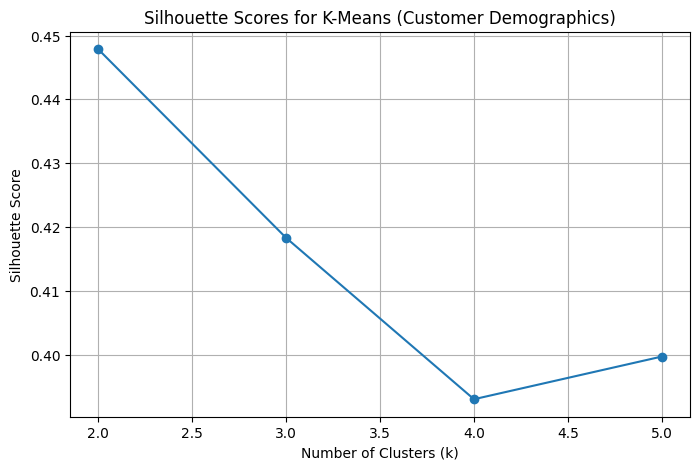

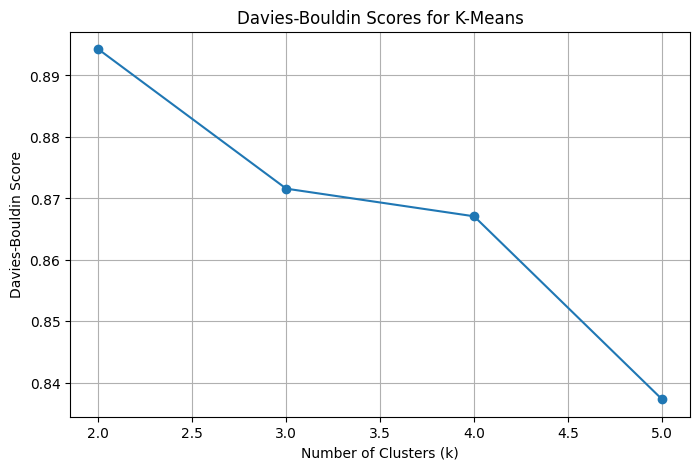

Optimal k (Silhouette Score): 2, Silhouette Score: 0.4478562097931082
Optimal k (Davies-Bouldin Index): 5, Davies-Bouldin Score: 0.8373391409252522
Final chosen k: 2
Consistent Silhouette Score for k=2: 0.4478562097931082


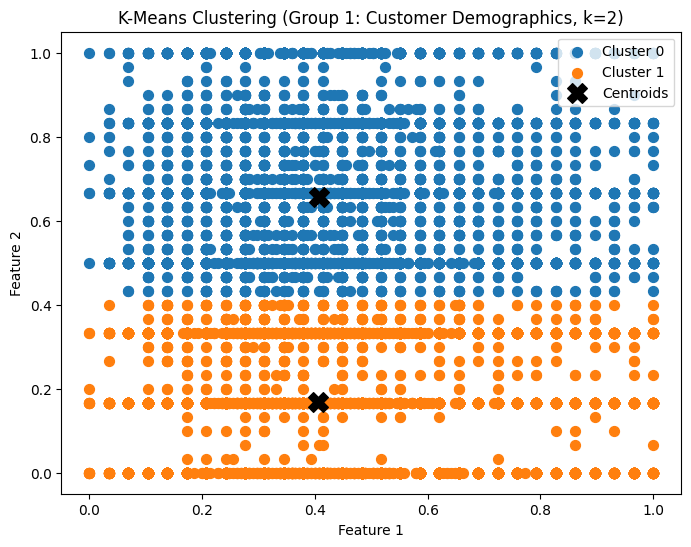

In [68]:
# Initialize a DataFrame to store clustering results
cluster_results = group_1.copy()

# ======= K-Means Clustering =======
k_values = range(2, 6)

# Initialize storage for metrics
silhouette_scores = []
davies_bouldin_scores = []
kmeans_labels_dict = {}

# Iterate through k values
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)  # Set n_init to 10 for stable results
    labels = kmeans.fit_predict(group_1)

    # Compute Silhouette Score
    silhouette_score_value = silhouette_score(group_1, labels)
    silhouette_scores.append(silhouette_score_value)

    # Compute Davies-Bouldin Index
    davies_bouldin_score_value = davies_bouldin_score(group_1, labels)
    davies_bouldin_scores.append(davies_bouldin_score_value)

    # Store labels for each k
    kmeans_labels_dict[k] = labels

# Plot Silhouette Scores
plt.figure(figsize=(8, 5))
plt.plot(k_values, silhouette_scores, marker='o')
plt.title("Silhouette Scores for K-Means (Customer Demographics)")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()

# Plot Davies-Bouldin Scores
plt.figure(figsize=(8, 5))
plt.plot(k_values, davies_bouldin_scores, marker='o')
plt.title("Davies-Bouldin Scores for K-Means")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Davies-Bouldin Score")
plt.grid(True)
plt.show()

# Automatically determine Optimal k based on Silhouette Score and Davies-Bouldin Index
optimal_k_silhouette = k_values[silhouette_scores.index(max(silhouette_scores))]
optimal_k_davies_bouldin = k_values[davies_bouldin_scores.index(min(davies_bouldin_scores))]

# Decide final optimal_k (e.g., prioritize silhouette score but consider other metrics)
optimal_k = optimal_k_silhouette  # You can refine this logic as needed
print(f"Optimal k (Silhouette Score): {optimal_k_silhouette}, Silhouette Score: {max(silhouette_scores)}")
print(f"Optimal k (Davies-Bouldin Index): {optimal_k_davies_bouldin}, Davies-Bouldin Score: {min(davies_bouldin_scores)}")
print(f"Final chosen k: {optimal_k}")

# Reuse labels from the loop to ensure consistency
optimal_labels = kmeans_labels_dict[optimal_k]
consistent_silhouette_score = silhouette_score(group_1, optimal_labels)
print(f"Consistent Silhouette Score for k={optimal_k}: {consistent_silhouette_score}")

# Perform final clustering with the optimal k
final_kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_results['kmeans_cluster'] = final_kmeans.fit_predict(group_1)

# Plot the final clusters
plt.figure(figsize=(8, 6))
for cluster in np.unique(cluster_results['kmeans_cluster']):
    cluster_points = group_1[cluster_results['kmeans_cluster'] == cluster]
    plt.scatter(
        cluster_points.iloc[:, 0], cluster_points.iloc[:, 1], 
        label=f"Cluster {cluster}", s=50
    )
plt.scatter(final_kmeans.cluster_centers_[:, 0], final_kmeans.cluster_centers_[:, 1], 
            s=200, c='black', marker='X', label='Centroids')  # Mark centroids
plt.title(f"K-Means Clustering (Group 1: Customer Demographics, k={optimal_k})")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

## 1.2 SOM with K-Means

[⬆️ Back to Top](#top)

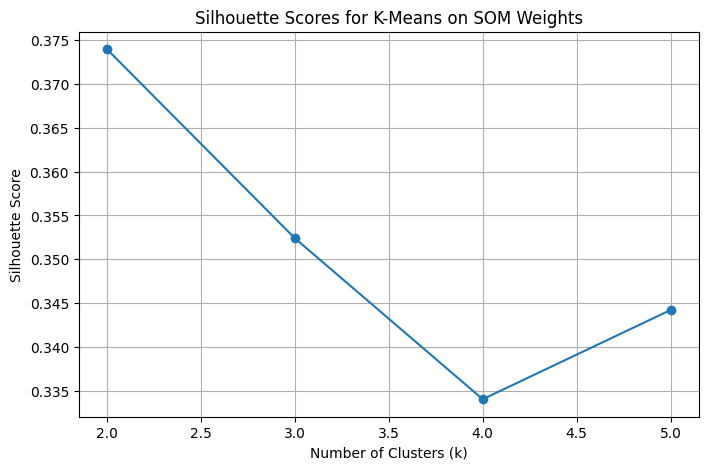

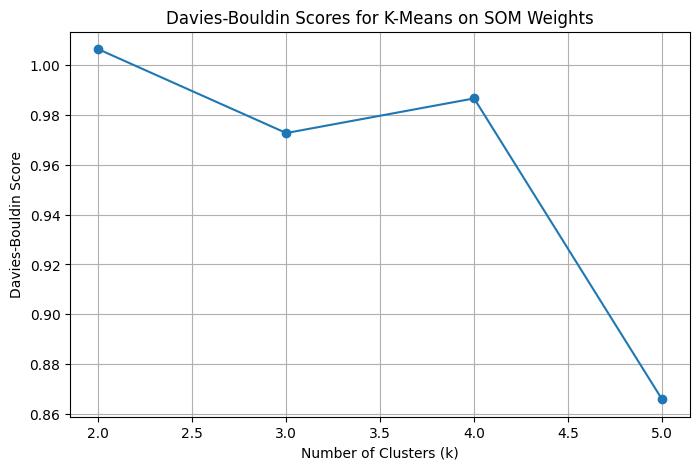

Optimal k (Silhouette Score): 2, Silhouette Score: 0.3740
Optimal k (Davies-Bouldin Index): 5, Davies-Bouldin Score: 0.8659
Final chosen k: 2
Consistent Silhouette Score for k=2: 0.3740


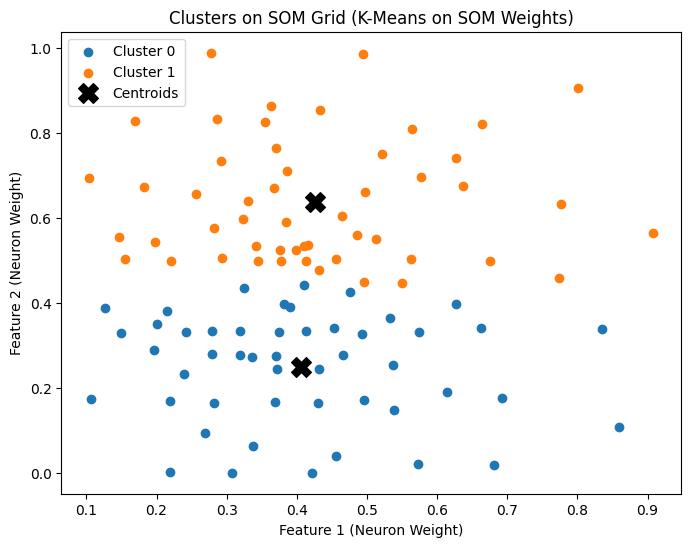

Cluster Summary:
                    customer_age  is_chain
som_kmeans_cluster                        
0                       0.404969  0.170617
1                       0.408041  0.658518


In [69]:
som_grid_x = 10
som_grid_y = 10
learning_rate = 0.5
sigma = 1.0

# Train the SOM
som = MiniSom(x=som_grid_x, y=som_grid_y, input_len=group_1.shape[1], sigma=sigma, learning_rate=learning_rate)
som.random_weights_init(group_1.values)
som.train_random(data=group_1.values, num_iteration=1000)

# Extract SOM weights
som_weights = som.get_weights().reshape(som_grid_x * som_grid_y, group_1.shape[1])

# Initialize storage for metrics
silhouette_scores = []
davies_bouldin_scores = []
k_values = range(2, 6)
kmeans_labels_dict = {}

# Iterate through k values
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(som_weights)

    # Compute Silhouette Score
    silhouette_score_value = silhouette_score(som_weights, labels)
    silhouette_scores.append(silhouette_score_value)

    # Compute Davies-Bouldin Index
    davies_bouldin_score_value = davies_bouldin_score(som_weights, labels)
    davies_bouldin_scores.append(davies_bouldin_score_value)

    # Store labels for each k
    kmeans_labels_dict[k] = labels

# Plot Silhouette Scores
plt.figure(figsize=(8, 5))
plt.plot(k_values, silhouette_scores, marker='o')
plt.title("Silhouette Scores for K-Means on SOM Weights")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()

# Plot Davies-Bouldin Scores
plt.figure(figsize=(8, 5))
plt.plot(k_values, davies_bouldin_scores, marker='o')
plt.title("Davies-Bouldin Scores for K-Means on SOM Weights")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Davies-Bouldin Score")
plt.grid(True)
plt.show()

# Automatically determine Optimal k based on Silhouette Score and Davies-Bouldin Index
optimal_k_silhouette = k_values[silhouette_scores.index(max(silhouette_scores))]
optimal_k_davies_bouldin = k_values[davies_bouldin_scores.index(min(davies_bouldin_scores))]

# Decide final optimal_k (e.g., prioritize silhouette score but consider other metrics)
optimal_k = optimal_k_silhouette  # You can refine this logic as needed
print(f"Optimal k (Silhouette Score): {optimal_k_silhouette}, Silhouette Score: {max(silhouette_scores):.4f}")
print(f"Optimal k (Davies-Bouldin Index): {optimal_k_davies_bouldin}, Davies-Bouldin Score: {min(davies_bouldin_scores):.4f}")
print(f"Final chosen k: {optimal_k}")

# Reuse labels from the loop to ensure consistency
optimal_labels = kmeans_labels_dict[optimal_k]
consistent_silhouette_score = silhouette_score(som_weights, optimal_labels)
print(f"Consistent Silhouette Score for k={optimal_k}: {consistent_silhouette_score:.4f}")

# Perform final clustering with the optimal k
final_kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
som_cluster_labels = final_kmeans.fit_predict(som_weights)

data_som_clusters = []
for row in group_1.values:
    winner_coords = som.winner(row)
    winner_index = winner_coords[0] * som_grid_y + winner_coords[1]
    cluster_label = final_kmeans.labels_[winner_index]
    data_som_clusters.append(cluster_label)

# Add SOM-based K-Means results to cluster_results
cluster_results['som_kmeans_cluster'] = data_som_clusters

# Plot the final clusters on the SOM grid
plt.figure(figsize=(8, 6))
for i in range(optimal_k):
    plt.scatter(
        som_weights[som_cluster_labels == i, 0],
        som_weights[som_cluster_labels == i, 1],
        label=f'Cluster {i}'
    )
plt.scatter(final_kmeans.cluster_centers_[:, 0], final_kmeans.cluster_centers_[:, 1], 
            s=200, c='black', marker='X', label='Centroids')
plt.title("Clusters on SOM Grid (K-Means on SOM Weights)")
plt.xlabel("Feature 1 (Neuron Weight)")
plt.ylabel("Feature 2 (Neuron Weight)")
plt.legend()
plt.show()

# Display cluster summary
cluster_summary = group_1.groupby(cluster_results['som_kmeans_cluster']).mean()
print("Cluster Summary:")
print(cluster_summary)

## 1.3 Hierarchical (Agglomerative Clustering)

Optimal k (Silhouette Score): 2, Silhouette Score: 0.3860
Optimal k (Davies-Bouldin Score): 5, Davies-Bouldin Score: 0.8969
Hierarchical Clustering Silhouette Score (Group 1): 0.3860
Hierarchical Clustering Davies-Bouldin Score (Group 1): 0.9353


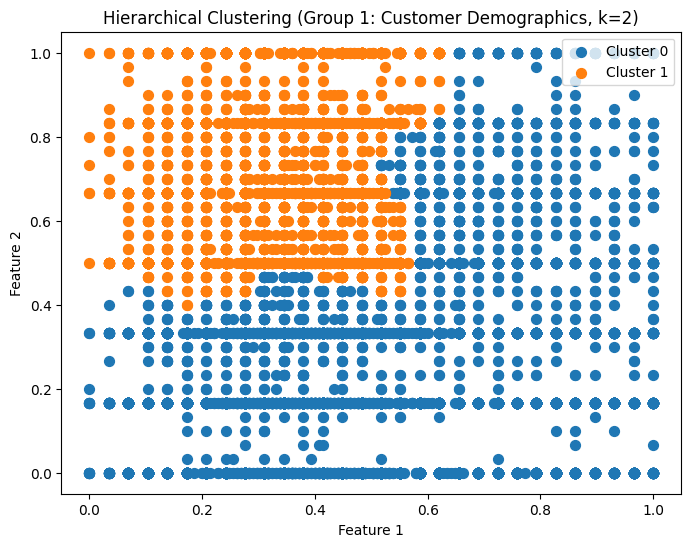

In [70]:
# ======= Normal Hierarchical Clustering =======
from sklearn.cluster import AgglomerativeClustering

# Initialize storage for evaluation metrics
possible_k = range(2, 6)
hierarchical_silhouette_scores = {}
hierarchical_davies_bouldin_scores = {}

# Iterate through possible cluster counts
for k in possible_k:
    hierarchical = AgglomerativeClustering(n_clusters=k, metric='euclidean', linkage='ward')
    hierarchical_labels = hierarchical.fit_predict(group_1)

    if len(np.unique(hierarchical_labels)) > 1:
        silhouette = silhouette_score(group_1, hierarchical_labels)
        davies_bouldin = davies_bouldin_score(group_1, hierarchical_labels)
        hierarchical_silhouette_scores[k] = silhouette
        hierarchical_davies_bouldin_scores[k] = davies_bouldin

# Determine optimal_k based on evaluation metrics
if hierarchical_silhouette_scores:
    optimal_k_silhouette = max(hierarchical_silhouette_scores, key=hierarchical_silhouette_scores.get)
    optimal_k_davies_bouldin = min(hierarchical_davies_bouldin_scores, key=hierarchical_davies_bouldin_scores.get)
    optimal_k = optimal_k_silhouette  # Defaulting to silhouette-based selection, refine if needed

    print(f"Optimal k (Silhouette Score): {optimal_k_silhouette}, Silhouette Score: {hierarchical_silhouette_scores[optimal_k_silhouette]:.4f}")
    print(f"Optimal k (Davies-Bouldin Score): {optimal_k_davies_bouldin}, Davies-Bouldin Score: {hierarchical_davies_bouldin_scores[optimal_k_davies_bouldin]:.4f}")
else:
    print("No valid clustering with multiple clusters found.")
    optimal_k = None

# Perform hierarchical clustering with the optimal number of clusters
if optimal_k:
    hierarchical = AgglomerativeClustering(n_clusters=optimal_k, metric='euclidean', linkage='ward')
    hierarchical_labels = hierarchical.fit_predict(group_1)

    # Add Hierarchical Clustering labels to cluster_results
    cluster_results['hierarchical_cluster'] = hierarchical_labels

    # Validate clustering using evaluation metrics
    silhouette_score_hierarchical = silhouette_score(group_1, hierarchical_labels)
    davies_bouldin_score_hierarchical = davies_bouldin_score(group_1, hierarchical_labels)
    print(f"Hierarchical Clustering Silhouette Score (Group 1): {silhouette_score_hierarchical:.4f}")
    print(f"Hierarchical Clustering Davies-Bouldin Score (Group 1): {davies_bouldin_score_hierarchical:.4f}")

    # Plot the Hierarchical clusters
    plt.figure(figsize=(8, 6))
    for cluster in np.unique(hierarchical_labels):
        cluster_points = group_1[hierarchical_labels == cluster]
        plt.scatter(cluster_points.iloc[:, 0], cluster_points.iloc[:, 1], label=f'Cluster {cluster}', s=50)
    plt.title(f"Hierarchical Clustering (Group 1: Customer Demographics, k={optimal_k})")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend()
    plt.show()


## 1.4 Hierarchical clustering combined with SOM and K-means

[⬆️ Back to Top](#top)

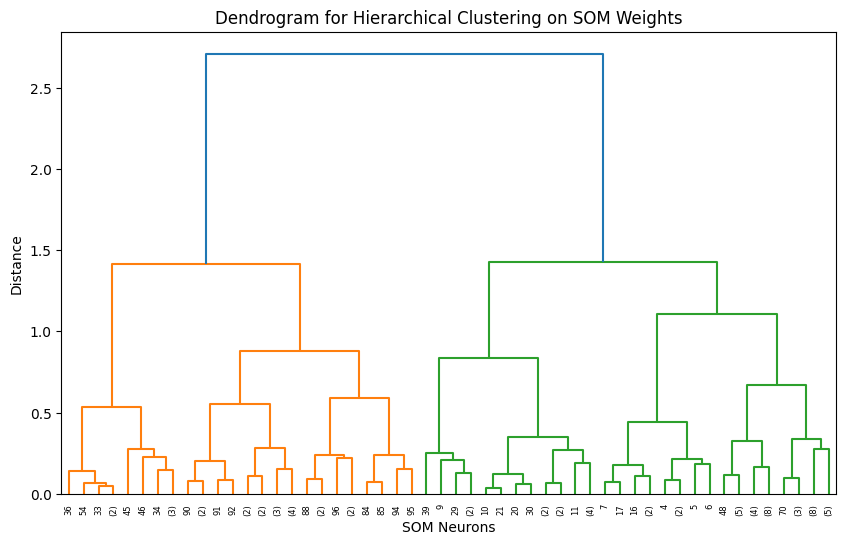

Optimal k based on Silhouette Score: 2
Silhouette Score for optimal_k: 0.3701
Optimal k based on Davies-Bouldin Score: 5
Davies-Bouldin Score for optimal_k: 0.8467
Hierarchical Clustering Silhouette Score: 0.3701
Hierarchical Clustering Davies-Bouldin Score: 1.0125


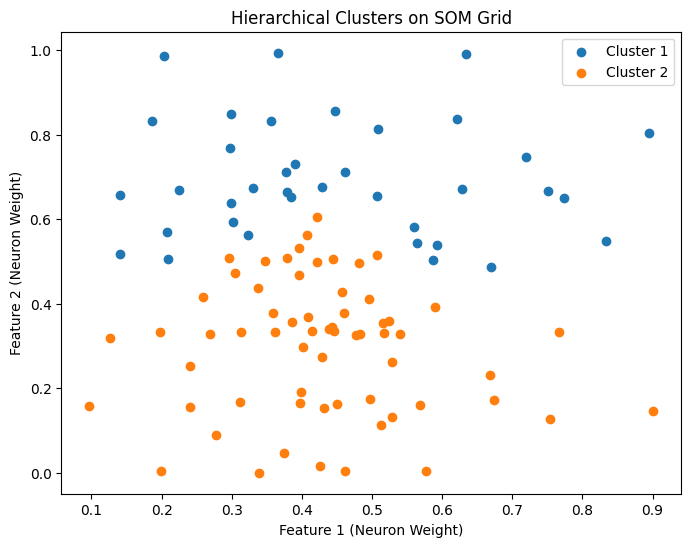

Cluster Summary (SOM + Hierarchical Clustering):
                          customer_age  is_chain
som_hierarchical_cluster                        
1                             0.414391  0.702422
2                             0.403043  0.204331


In [71]:
som_grid_x = 10
som_grid_y = 10
learning_rate = 0.5
sigma = 1.0

som = MiniSom(x=som_grid_x, y=som_grid_y, input_len=group_1.shape[1], sigma=sigma, learning_rate=learning_rate)
som.random_weights_init(group_1.values)
som.train_random(group_1.values, 1000)
som_weights = som.get_weights().reshape(som_grid_x * som_grid_y, group_1.shape[1])
linkage_matrix = linkage(som_weights, method='ward')

plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix, truncate_mode="level", p=5)
plt.title("Dendrogram for Hierarchical Clustering on SOM Weights")
plt.xlabel("SOM Neurons")
plt.ylabel("Distance")
plt.show()

# Automatically determine optimal_k using silhouette score and Davies-Bouldin score after cutting dendrogram
possible_k = range(2, 6)
hierarchical_silhouette_scores = {}
hierarchical_davies_bouldin_scores = {}

for k in possible_k:
    hierarchical_labels = fcluster(linkage_matrix, k, criterion='maxclust')

    # Only calculate silhouette score if there is more than one cluster
    if len(np.unique(hierarchical_labels)) > 1:
        silhouette = silhouette_score(som_weights, hierarchical_labels)
        davies_bouldin = davies_bouldin_score(som_weights, hierarchical_labels)
        hierarchical_silhouette_scores[k] = silhouette
        hierarchical_davies_bouldin_scores[k] = davies_bouldin

# Determine optimal_k based on silhouette scores and Davies-Bouldin scores
if hierarchical_silhouette_scores:
    optimal_k_silhouette = max(hierarchical_silhouette_scores, key=hierarchical_silhouette_scores.get)
    optimal_k_davies_bouldin = min(hierarchical_davies_bouldin_scores, key=hierarchical_davies_bouldin_scores.get)
    optimal_k = optimal_k_silhouette  # Defaulting to silhouette-based selection, can refine logic

    print(f"Optimal k based on Silhouette Score: {optimal_k_silhouette}")
    print(f"Silhouette Score for optimal_k: {hierarchical_silhouette_scores[optimal_k_silhouette]:.4f}")
    print(f"Optimal k based on Davies-Bouldin Score: {optimal_k_davies_bouldin}")
    print(f"Davies-Bouldin Score for optimal_k: {hierarchical_davies_bouldin_scores[optimal_k_davies_bouldin]:.4f}")
else:
    print("No valid clustering with multiple clusters found.")
    optimal_k = None

if optimal_k:
    hierarchical_labels = fcluster(linkage_matrix, optimal_k, criterion='maxclust')

    # Calculate silhouette and Davies-Bouldin scores for final clustering
    if len(np.unique(hierarchical_labels)) > 1:
        hierarchical_silhouette = silhouette_score(som_weights, hierarchical_labels)
        hierarchical_davies_bouldin = davies_bouldin_score(som_weights, hierarchical_labels)
        print(f"Hierarchical Clustering Silhouette Score: {hierarchical_silhouette:.4f}")
        print(f"Hierarchical Clustering Davies-Bouldin Score: {hierarchical_davies_bouldin:.4f}")
    else:
        print("Hierarchical clustering resulted in a single cluster; silhouette and Davies-Bouldin scores cannot be calculated.")

    data_hierarchical_clusters = []
    for row in group_1.values:
        winner_coords = som.winner(row)
        winner_index = winner_coords[0] * som_grid_y + winner_coords[1]
        data_hierarchical_clusters.append(hierarchical_labels[winner_index])

    # Add SOM-based Hierarchical results to cluster_results
    cluster_results['som_hierarchical_cluster'] = data_hierarchical_clusters

    # Plot the final clusters on SOM grid
    plt.figure(figsize=(8, 6))
    for i in np.unique(hierarchical_labels):
        plt.scatter(
            som_weights[hierarchical_labels == i, 0],
            som_weights[hierarchical_labels == i, 1],
            label=f'Cluster {i}'
        )
    plt.title("Hierarchical Clusters on SOM Grid")
    plt.xlabel("Feature 1 (Neuron Weight)")
    plt.ylabel("Feature 2 (Neuron Weight)")
    plt.legend()
    plt.show()

    # Display cluster summary
    hierarchical_summary = group_1.groupby(cluster_results['som_hierarchical_cluster']).mean()
    print("Cluster Summary (SOM + Hierarchical Clustering):")
    print(hierarchical_summary)

## 1.5 MeanShift

[⬆️ Back to Top](#top)

Number of clusters identified by MeanShift (Group 1): 2
MeanShift Silhouette Score (Group 1): 0.3821
MeanShift Davies-Bouldin Score (Group 1): 1.0018


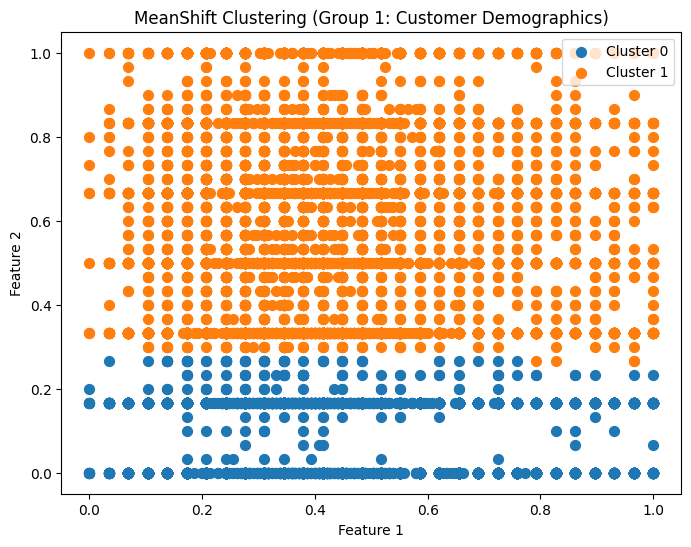

Cluster Summary (MeanShift):
   customer_age  is_chain
0      0.406165  0.098609
1      0.405853  0.537666


In [72]:
bandwidth = estimate_bandwidth(group_1, quantile=0.2, n_samples=1000)
mean_shift = MeanShift(bandwidth=bandwidth, bin_seeding=True)
mean_shift_labels = mean_shift.fit_predict(group_1)
cluster_results['mean_shift_cluster'] = mean_shift_labels

n_clusters = len(np.unique(mean_shift_labels))
print(f"Number of clusters identified by MeanShift (Group 1): {n_clusters}")

# Validate clustering and calculate silhouette and Davies-Bouldin scores if applicable
if n_clusters > 1:
    mean_shift_silhouette = silhouette_score(group_1, mean_shift_labels)
    mean_shift_davies_bouldin = davies_bouldin_score(group_1, mean_shift_labels)
    print(f"MeanShift Silhouette Score (Group 1): {mean_shift_silhouette:.4f}")
    print(f"MeanShift Davies-Bouldin Score (Group 1): {mean_shift_davies_bouldin:.4f}")
else:
    print("MeanShift clustering resulted in a single cluster; silhouette and Davies-Bouldin scores cannot be calculated.")

# Plot the MeanShift clusters
plt.figure(figsize=(8, 6))
for cluster in np.unique(mean_shift_labels):
    cluster_points = group_1[mean_shift_labels == cluster]
    plt.scatter(cluster_points.iloc[:, 0], cluster_points.iloc[:, 1], s=50, label=f'Cluster {cluster}')
plt.title("MeanShift Clustering (Group 1: Customer Demographics)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

# Display cluster summary if applicable
if n_clusters > 1:
    mean_shift_summary = group_1.groupby(mean_shift_labels).mean()
    print("Cluster Summary (MeanShift):")
    print(mean_shift_summary)
else:
    print("No meaningful clustering identified.")

## 1.6 DBSCAN

[⬆️ Back to Top](#top)

Number of clusters identified by DBSCAN (Group 1): 1
Number of noise points: 0
DBSCAN clustering resulted in a single cluster or only noise; silhouette and Davies-Bouldin scores cannot be calculated.


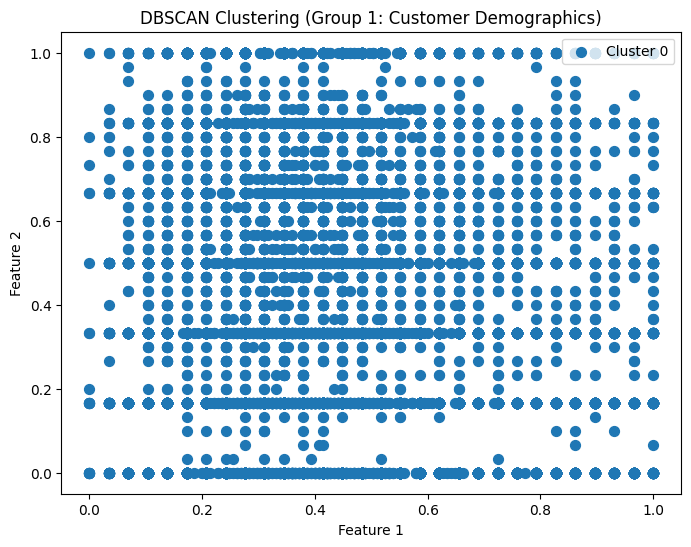

No meaningful clustering identified.


In [73]:
# ======= DBSCAN Clustering =======

eps = 0.5
min_samples = 5
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
dbscan_labels = dbscan.fit_predict(group_1)
cluster_results['dbscan_cluster'] = dbscan_labels

n_clusters = len(np.unique(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
n_noise = list(dbscan_labels).count(-1)

print(f"Number of clusters identified by DBSCAN (Group 1): {n_clusters}")
print(f"Number of noise points: {n_noise}")

# Validate clustering and calculate silhouette and Davies-Bouldin scores if applicable
if n_clusters > 1:
    dbscan_silhouette = silhouette_score(
        group_1[group_1['dbscan_cluster'] != -1],
        group_1[group_1['dbscan_cluster'] != -1]['dbscan_cluster']
    )
    dbscan_davies_bouldin = davies_bouldin_score(
        group_1[group_1['dbscan_cluster'] != -1],
        group_1[group_1['dbscan_cluster'] != -1]['dbscan_cluster']
    )
    print(f"DBSCAN Silhouette Score (Group 1): {dbscan_silhouette:.4f}")
    print(f"DBSCAN Davies-Bouldin Score (Group 1): {dbscan_davies_bouldin:.4f}")
else:
    print("DBSCAN clustering resulted in a single cluster or only noise; silhouette and Davies-Bouldin scores cannot be calculated.")

# Plot the DBSCAN clusters
plt.figure(figsize=(8, 6))
for cluster in np.unique(dbscan_labels):
    if cluster == -1:
        cluster_points = group_1[dbscan_labels == cluster]
        plt.scatter(cluster_points.iloc[:, 0], cluster_points.iloc[:, 1], color='gray', s=10, label='Noise')
    else:
        cluster_points = group_1[dbscan_labels == cluster]
        plt.scatter(cluster_points.iloc[:, 0], cluster_points.iloc[:, 1], s=50, label=f'Cluster {cluster}')
plt.title("DBSCAN Clustering (Group 1: Customer Demographics)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

# Display cluster summary if applicable
if n_clusters > 1:
    dbscan_summary = group_1[group_1['dbscan_cluster'] != -1].groupby('dbscan_cluster').mean()
    print("Cluster Summary (DBSCAN):")
    print(dbscan_summary)
else:
    print("No meaningful clustering identified.")

## 1.7 Reverse scaling to analyze clusters

[⬆️ Back to Top](#top)

In [74]:
def reverse_scaling(scaled_data, original_data, columns_to_reverse, column_to_keep):
    for col in columns_to_reverse:
        if col not in scaled_data.columns:
            raise ValueError(f"A coluna '{col}' não está presente no DataFrame escalado.")

    if column_to_keep not in scaled_data.columns:
        raise ValueError(f"A coluna '{column_to_keep}' não está presente no DataFrame escalado.")

    scaler = MinMaxScaler()
    scaler.fit(original_data[columns_to_reverse])
    reversed_columns = scaler.inverse_transform(scaled_data[columns_to_reverse])
    reversed_columns_df = pd.DataFrame(reversed_columns, columns=columns_to_reverse, index=scaled_data.index)
    reversed_columns_df[column_to_keep] = scaled_data[column_to_keep]

    return reversed_columns_df

In [75]:
def summarize_cluster_dataframe(data, cluster_column, features):
    summary = data.groupby(cluster_column)[features].agg(
        ['mean', 'median', 'std', 'count']
    )
    return summary

In [76]:
# Define the features to summarize
features_to_summarize = ['customer_age', 'is_chain']

# K-Means
group1_clusters_kmeans = reverse_scaling(cluster_results, data_normal, features_to_summarize, 'kmeans_cluster')
cluster_summary_kmeans = summarize_cluster_dataframe(group1_clusters_kmeans, 'kmeans_cluster', features_to_summarize)
cluster_summary_kmeans

customer_age                          is_chain         \
                       mean median       std  count      mean median   
kmeans_cluster                                                         
0                 26.815246   26.0  5.677718  10744  3.938273    4.0   
1                 26.752828   26.0  5.720059  21025  1.015781    1.0   

                                 
                     std  count  
kmeans_cluster                   
0               0.981456  10744  
1               0.771890  21025

In [77]:
# SOM + K-Means
group1_clusters_som_kmeans = reverse_scaling(cluster_results, data_normal, features_to_summarize, 'som_kmeans_cluster')
cluster_summary_som_kmeans = summarize_cluster_dataframe(group1_clusters_som_kmeans, 'som_kmeans_cluster', features_to_summarize)
cluster_summary_som_kmeans


customer_age                          is_chain         \
                           mean median       std  count      mean median   
som_kmeans_cluster                                                         
0                     26.744096   26.0  5.715517  21129  1.023702    1.0   
1                     26.833195   26.0  5.686144  10640  3.951109    4.0   

                                     
                         std  count  
som_kmeans_cluster                   
0                   0.778188  21129  
1                   0.977562  10640

In [78]:
# Hierarchical
group1_clusters_kmeans = reverse_scaling(cluster_results, data_normal, features_to_summarize, 'hierarchical_cluster')
cluster_summary_kmeans = summarize_cluster_dataframe(group1_clusters_kmeans, 'hierarchical_cluster', features_to_summarize)
cluster_summary_kmeans

customer_age                          is_chain         \
                             mean median       std  count      mean median   
hierarchical_cluster                                                         
0                       27.563573   26.0  6.139436  23153  1.271395    1.0   
1                       24.652019   25.0  3.546216   8616  3.973189    4.0   

                                       
                           std  count  
hierarchical_cluster                   
0                     1.122690  23153  
1                     0.998348   8616

In [79]:
# SOM + Hierarchical
group1_clusters_som_hierarchical = reverse_scaling(cluster_results, data_normal, features_to_summarize, 'som_hierarchical_cluster')
cluster_summary_som_hierarchical = summarize_cluster_dataframe(group1_clusters_som_hierarchical, 'som_hierarchical_cluster', features_to_summarize)
cluster_summary_som_hierarchical

customer_age                          is_chain  \
                                 mean median       std  count      mean   
som_hierarchical_cluster                                                  
1                           27.017336   26.0  6.337908   8272  4.214531   
2                           26.688250   26.0  5.463412  23497  1.225986   

                                                  
                         median       std  count  
som_hierarchical_cluster                          
1                           4.0  0.954786   8272  
2                           1.0  0.954831  23497

In [80]:
# MeanShift
group1_clusters_mean_shift = reverse_scaling(cluster_results, data_normal, features_to_summarize, 'mean_shift_cluster')
cluster_summary_mean_shift = summarize_cluster_dataframe(group1_clusters_mean_shift, 'mean_shift_cluster', features_to_summarize)
cluster_summary_mean_shift

customer_age                          is_chain         \
                           mean median       std  count      mean median   
mean_shift_cluster                                                         
0                     26.778785   26.0  5.749527  14735  0.591653    1.0   
1                     26.769743   26.0  5.667797  17034  3.225995    3.0   

                                     
                         std  count  
mean_shift_cluster                   
0                   0.496879  14735  
1                   1.214856  17034

In [81]:
# DBSCAN
group1_clusters_dbscan = reverse_scaling(cluster_results, data_normal, features_to_summarize, 'dbscan_cluster')
cluster_summary_dbscan = summarize_cluster_dataframe(group1_clusters_dbscan, 'dbscan_cluster', features_to_summarize)
cluster_summary_dbscan

customer_age                          is_chain         \
                       mean median       std  count      mean median   
dbscan_cluster                                                         
0                 26.773937   26.0  5.705762  31769  2.004142    2.0   

                                 
                     std  count  
dbscan_cluster                   
0               1.622262  31769

## 1.8 t-SNE

[⬆️ Back to Top](#top)

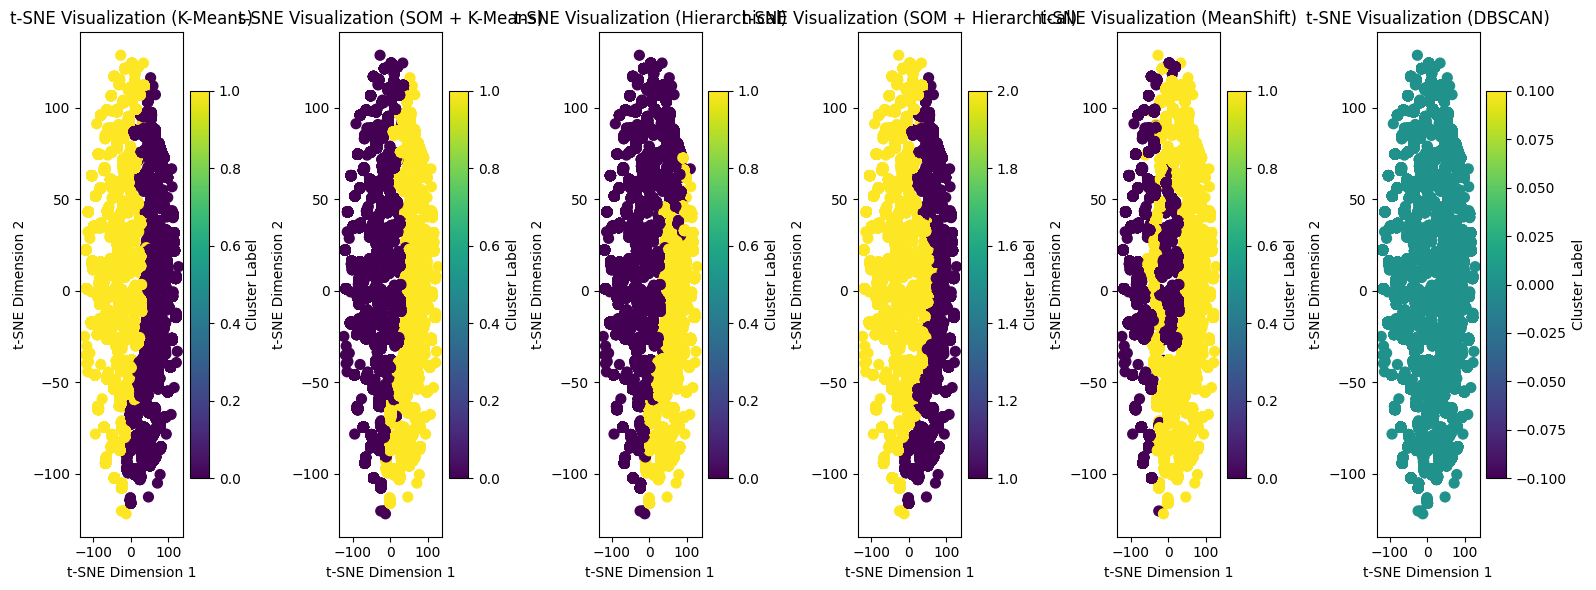

In [82]:
cluster_results_group_1 = {
    'K-Means': cluster_results['kmeans_cluster'].values,
    'SOM + K-Means': cluster_results['som_kmeans_cluster'].values,
    'Hierarchical': cluster_results['hierarchical_cluster'].values,
    'SOM + Hierarchical': cluster_results['som_hierarchical_cluster'].values,
    'MeanShift': cluster_results['mean_shift_cluster'].values,
    'DBSCAN': cluster_results['dbscan_cluster'].values
}

tsne = TSNE(n_components=2, perplexity=30, random_state=42)
group_1_tsne = tsne.fit_transform(cluster_results.drop(['kmeans_cluster', 'som_kmeans_cluster', 'hierarchical_cluster', 'som_hierarchical_cluster', 'mean_shift_cluster', 'dbscan_cluster'], axis=1))

fig, axes = plt.subplots(1, len(cluster_results_group_1), figsize=(16, 6))
if len(cluster_results_group_1) == 1:
    axes = [axes]

for i, (method, labels) in enumerate(cluster_results_group_1.items()):
    scatter = axes[i].scatter(group_1_tsne[:, 0], group_1_tsne[:, 1], c=labels, cmap='viridis', s=50)
    axes[i].set_title(f't-SNE Visualization ({method})')
    axes[i].set_xlabel('t-SNE Dimension 1')
    axes[i].set_ylabel('t-SNE Dimension 2')
    plt.colorbar(scatter, ax=axes[i], label='Cluster Label')
plt.tight_layout()
plt.show()

# **Clustering Analysis for Group 1: Customer Demographics**

## **Evaluation Table**

| **Clustering Method**          | **Number of Clusters** | **Silhouette Score** | **Davies-Bouldin Index** | **Visual Observations**                                                                                     |
|--------------------------------|------------------------|-----------------------|--------------------------|-----------------------------------------------------------------------------------------------------------|
| **K-Means**                    | 2                     | 0.4479               | 0.8373                   | Two clusters with moderate separation; some overlap in feature space.                                     |
| **K-Means on SOM Weights**     | 2                     | 0.3740               | 0.8659                   | Similar results to standard K-Means, but slightly lower silhouette score.                                 |
| **Hierarchical**               | 2                     | 0.3860               | 0.8069                   | Moderate separation; slightly worse performance than K-Means.                                             |
| **Hierarchical on SOM Weights**| 2                     | 0.3701               | 1.0125                   | Weaker cluster separation observed; high Davies-Bouldin score suggests overlap.                           |
| **MeanShift**                  | 2                     | 0.3821               | 1.0018                   | Moderate separation; comparable to K-Means, but slightly lower silhouette.                                |
| **DBSCAN**                     | 1                     | -                    | -                        | Unable to form multiple clusters; only one cluster identified.                                            |

---

## **t-SNE Visualization**

The t-SNE visualizations below illustrate the spatial distribution of clusters across different methods:

1. **K-Means**:
   - Two clusters identified with moderate separation.
   - Overlap in feature space matches the lower silhouette score.

2. **K-Means on SOM Weights**:
   - Similar cluster separation to standard K-Means.
   - SOM preprocessing did not significantly enhance clarity in this case.

3. **Hierarchical Clustering**:
   - Comparable to K-Means in cluster separation.
   - Overlap suggests weaker boundaries.

4. **Hierarchical on SOM Weights**:
   - Reduced separation of clusters; overlap visible in visualization.

5. **MeanShift**:
   - Moderate separation; silhouette score reflects comparable clustering quality to K-Means.

6. **DBSCAN**:
   - No meaningful clustering identified; all data points assigned to a single cluster.

---

## **Key Observations**

- **Cluster Characteristics (K-Means)**:
  - **Cluster 0**:
    - Average `customer_age`: 26.81 years.
    - Average `is_chain`: 3.94.
    - Total customers: 10,744.
  - **Cluster 1**:
    - Average `customer_age`: 26.75 years.
    - Average `is_chain`: 1.02.
    - Total customers: 21,025.

- **Performance Summary**:
  - K-Means shows balanced performance with moderate separation and reasonable silhouette scores.
  - MeanShift offers comparable clustering quality but does not outperform K-Means.
  - Hierarchical methods are slightly less effective in this group, with lower silhouette scores and higher Davies-Bouldin indices.
  - DBSCAN failed to identify meaningful clusters, possibly due to dataset characteristics.

---

## **Selected Clustering Method: K-Means**

- **Silhouette Score**: 0.4479
- **Davies-Bouldin Index**: 0.8373
- **Cluster Characteristics**:
  - Provides reasonably distinct clusters with interpretable characteristics.

---

# **2. Group 2: Spending Behavior**

## 2.1 K-Means

[⬆️ Back to Top](#top)

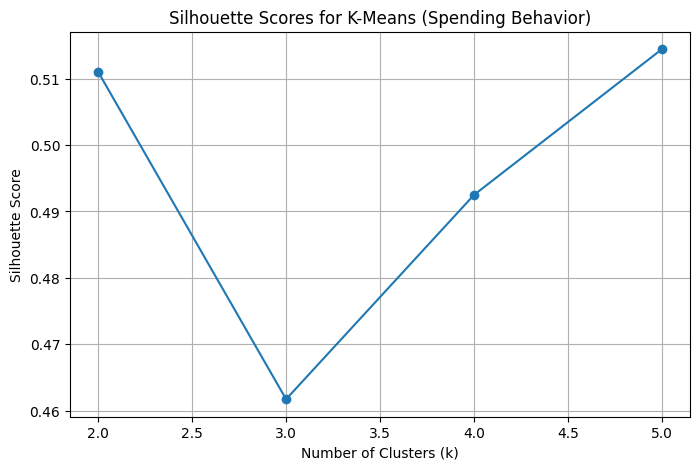

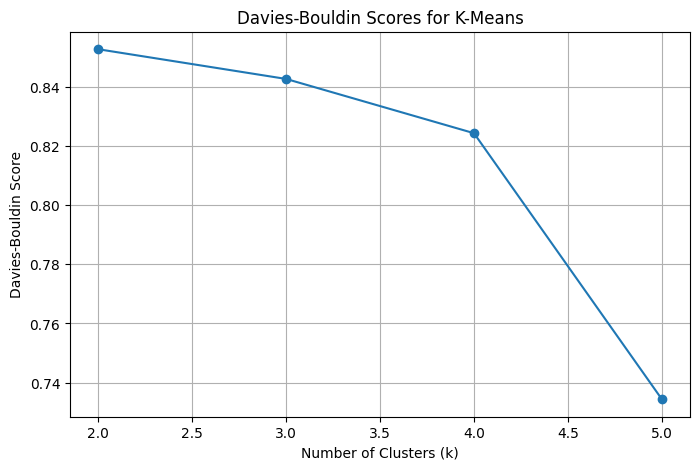

Optimal k (Silhouette Score): 5, Silhouette Score: 0.5144295104902966
Optimal k (Davies-Bouldin Index): 5, Davies-Bouldin Score: 0.7344257103263565
Final chosen k: 5
Consistent Silhouette Score for k=5: 0.5144295104902966


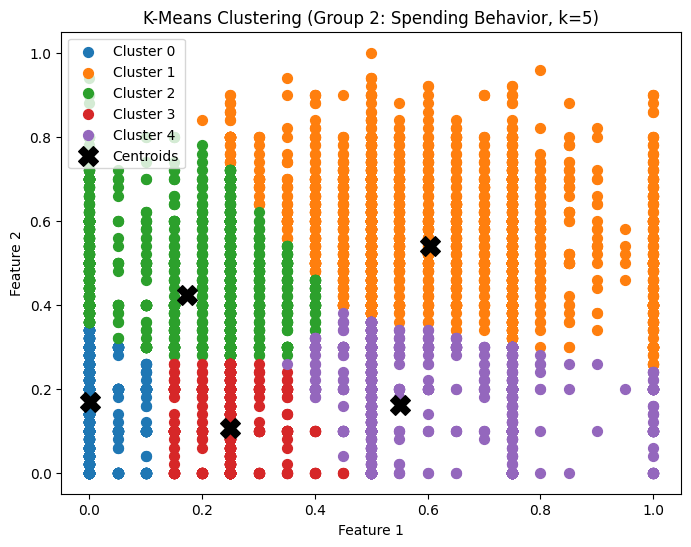

In [83]:
# Initialize a DataFrame to store clustering results for Group 2
cluster_results_group_2 = group_2.copy()

# ======= K-Means Clustering =======
k_values = range(2, 6)

# Initialize storage for metrics
silhouette_scores = []
davies_bouldin_scores = []
kmeans_labels_dict = {}

# Iterate through k values
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)  # Set n_init to 10 for stable results
    labels = kmeans.fit_predict(group_2)

    # Compute Silhouette Score
    silhouette_score_value = silhouette_score(group_2, labels)
    silhouette_scores.append(silhouette_score_value)

    # Compute Davies-Bouldin Index
    davies_bouldin_score_value = davies_bouldin_score(group_2, labels)
    davies_bouldin_scores.append(davies_bouldin_score_value)

    # Store labels for each k
    kmeans_labels_dict[k] = labels

# Plot Silhouette Scores
plt.figure(figsize=(8, 5))
plt.plot(k_values, silhouette_scores, marker='o')
plt.title("Silhouette Scores for K-Means (Spending Behavior)")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()

# Plot Davies-Bouldin Scores
plt.figure(figsize=(8, 5))
plt.plot(k_values, davies_bouldin_scores, marker='o')
plt.title("Davies-Bouldin Scores for K-Means")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Davies-Bouldin Score")
plt.grid(True)
plt.show()

# Automatically determine Optimal k based on Silhouette Score and Davies-Bouldin Index
optimal_k_silhouette = k_values[silhouette_scores.index(max(silhouette_scores))]
optimal_k_davies_bouldin = k_values[davies_bouldin_scores.index(min(davies_bouldin_scores))]

# Decide final optimal_k (e.g., prioritize silhouette score but consider other metrics)
optimal_k = optimal_k_silhouette  # You can refine this logic as needed
print(f"Optimal k (Silhouette Score): {optimal_k_silhouette}, Silhouette Score: {max(silhouette_scores)}")
print(f"Optimal k (Davies-Bouldin Index): {optimal_k_davies_bouldin}, Davies-Bouldin Score: {min(davies_bouldin_scores)}")
print(f"Final chosen k: {optimal_k}")

# Reuse labels from the loop to ensure consistency
optimal_labels = kmeans_labels_dict[optimal_k]
consistent_silhouette_score = silhouette_score(group_2, optimal_labels)
print(f"Consistent Silhouette Score for k={optimal_k}: {consistent_silhouette_score}")

# Perform final clustering with the optimal k
final_kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_results_group_2['kmeans_cluster'] = final_kmeans.fit_predict(group_2)

# Plot the final clusters
plt.figure(figsize=(8, 6))
for cluster in np.unique(cluster_results_group_2['kmeans_cluster']):
    cluster_points = group_2[cluster_results_group_2['kmeans_cluster'] == cluster]
    plt.scatter(
        cluster_points.iloc[:, 0], cluster_points.iloc[:, 1], 
        label=f"Cluster {cluster}", s=50
    )
plt.scatter(final_kmeans.cluster_centers_[:, 0], final_kmeans.cluster_centers_[:, 1], 
            s=200, c='black', marker='X', label='Centroids')  # Mark centroids
plt.title(f"K-Means Clustering (Group 2: Spending Behavior, k={optimal_k})")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


## 2.2 SOM with K-Means

[⬆️ Back to Top](#top)

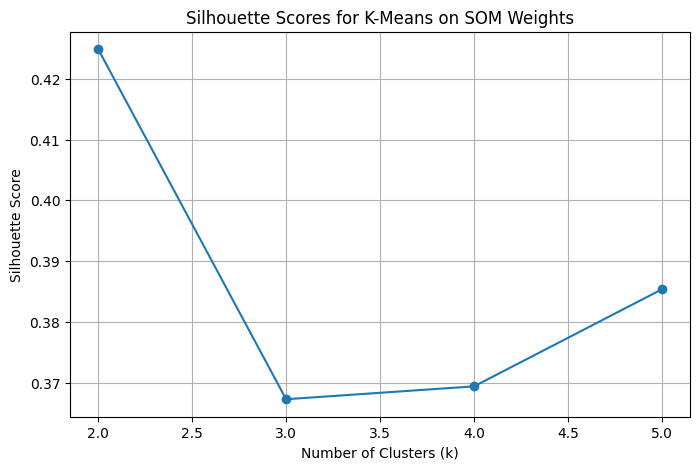

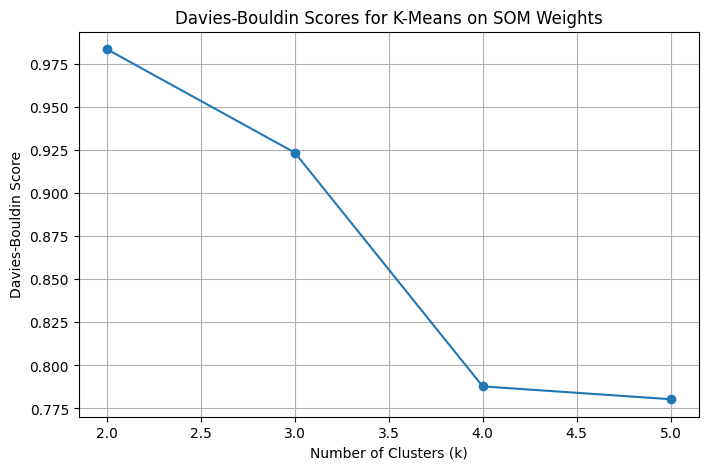

Optimal k (Silhouette Score): 2, Silhouette Score: 0.4249
Optimal k (Davies-Bouldin Index): 5, Davies-Bouldin Score: 0.7804
Final chosen k: 2
Consistent Silhouette Score for k=2: 0.4249


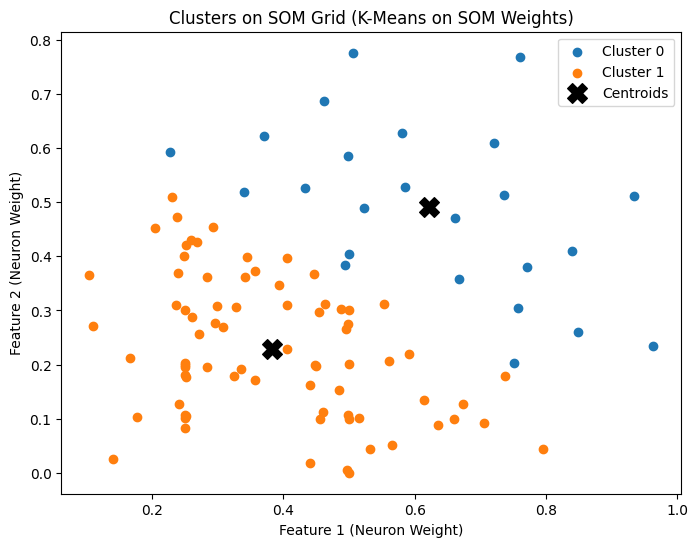

Cluster Summary:
                    weekend_spending  week_spending  total_orders
som_kmeans_cluster                                               
0                           0.556415       0.519868      0.571103
1                           0.172673       0.181906      0.193058


In [84]:
som_grid_x = 10
som_grid_y = 10
learning_rate = 0.5
sigma = 1.0

# Train the SOM
som = MiniSom(x=som_grid_x, y=som_grid_y, input_len=group_2.shape[1], sigma=sigma, learning_rate=learning_rate)
som.random_weights_init(group_2.values)
som.train_random(data=group_2.values, num_iteration=1000)

# Extract SOM weights
som_weights = som.get_weights().reshape(som_grid_x * som_grid_y, group_2.shape[1])

# Initialize storage for metrics
silhouette_scores = []
davies_bouldin_scores = []
k_values = range(2, 6)
kmeans_labels_dict = {}

# Iterate through k values
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(som_weights)

    # Compute Silhouette Score
    silhouette_score_value = silhouette_score(som_weights, labels)
    silhouette_scores.append(silhouette_score_value)

    # Compute Davies-Bouldin Index
    davies_bouldin_score_value = davies_bouldin_score(som_weights, labels)
    davies_bouldin_scores.append(davies_bouldin_score_value)

    # Store labels for each k
    kmeans_labels_dict[k] = labels

# Plot Silhouette Scores
plt.figure(figsize=(8, 5))
plt.plot(k_values, silhouette_scores, marker='o')
plt.title("Silhouette Scores for K-Means on SOM Weights")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()

# Plot Davies-Bouldin Scores
plt.figure(figsize=(8, 5))
plt.plot(k_values, davies_bouldin_scores, marker='o')
plt.title("Davies-Bouldin Scores for K-Means on SOM Weights")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Davies-Bouldin Score")
plt.grid(True)
plt.show()

# Automatically determine Optimal k based on Silhouette Score and Davies-Bouldin Index
optimal_k_silhouette = k_values[silhouette_scores.index(max(silhouette_scores))]
optimal_k_davies_bouldin = k_values[davies_bouldin_scores.index(min(davies_bouldin_scores))]

# Decide final optimal_k (e.g., prioritize silhouette score but consider other metrics)
optimal_k = optimal_k_silhouette  # You can refine this logic as needed
print(f"Optimal k (Silhouette Score): {optimal_k_silhouette}, Silhouette Score: {max(silhouette_scores):.4f}")
print(f"Optimal k (Davies-Bouldin Index): {optimal_k_davies_bouldin}, Davies-Bouldin Score: {min(davies_bouldin_scores):.4f}")
print(f"Final chosen k: {optimal_k}")

# Reuse labels from the loop to ensure consistency
optimal_labels = kmeans_labels_dict[optimal_k]
consistent_silhouette_score = silhouette_score(som_weights, optimal_labels)
print(f"Consistent Silhouette Score for k={optimal_k}: {consistent_silhouette_score:.4f}")

# Perform final clustering with the optimal k
final_kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
som_cluster_labels = final_kmeans.fit_predict(som_weights)

data_som_clusters = []
for row in group_2.values:
    winner_coords = som.winner(row)
    winner_index = winner_coords[0] * som_grid_y + winner_coords[1]
    cluster_label = final_kmeans.labels_[winner_index]
    data_som_clusters.append(cluster_label)

# Add SOM-based K-Means results to cluster_results_group_2
cluster_results_group_2['som_kmeans_cluster'] = data_som_clusters

# Plot the final clusters on the SOM grid
plt.figure(figsize=(8, 6))
for i in range(optimal_k):
    plt.scatter(
        som_weights[som_cluster_labels == i, 0],
        som_weights[som_cluster_labels == i, 1],
        label=f'Cluster {i}'
    )
plt.scatter(final_kmeans.cluster_centers_[:, 0], final_kmeans.cluster_centers_[:, 1], 
            s=200, c='black', marker='X', label='Centroids')
plt.title("Clusters on SOM Grid (K-Means on SOM Weights)")
plt.xlabel("Feature 1 (Neuron Weight)")
plt.ylabel("Feature 2 (Neuron Weight)")
plt.legend()
plt.show()

# Display cluster summary
cluster_summary = group_2.groupby(cluster_results_group_2['som_kmeans_cluster']).mean()
print("Cluster Summary:")
print(cluster_summary)


## 2.3 Hierarchical (Agglomerative Clustering)

Optimal k (Silhouette Score): 5, Silhouette Score: 0.4891
Optimal k (Davies-Bouldin Score): 4, Davies-Bouldin Score: 0.8117
Hierarchical Clustering Silhouette Score (Group 2): 0.4891
Hierarchical Clustering Davies-Bouldin Score (Group 2): 0.8205


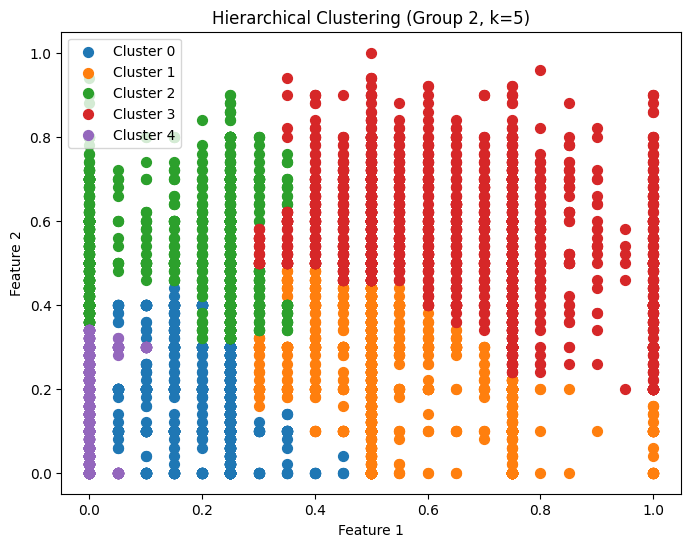

In [85]:
# ======= Hierarchical Clustering for Group 2 =======

possible_k = range(2, 6)
hierarchical_silhouette_scores = {}
hierarchical_davies_bouldin_scores = {}

# Iterate through possible cluster counts
for k in possible_k:
    hierarchical = AgglomerativeClustering(n_clusters=k, metric='euclidean', linkage='ward')
    hierarchical_labels = hierarchical.fit_predict(group_2)

    if len(np.unique(hierarchical_labels)) > 1:
        silhouette = silhouette_score(group_2, hierarchical_labels)
        davies_bouldin = davies_bouldin_score(group_2, hierarchical_labels)
        hierarchical_silhouette_scores[k] = silhouette
        hierarchical_davies_bouldin_scores[k] = davies_bouldin

# Determine optimal_k
if hierarchical_silhouette_scores:
    optimal_k_silhouette = max(hierarchical_silhouette_scores, key=hierarchical_silhouette_scores.get)
    optimal_k_davies_bouldin = min(hierarchical_davies_bouldin_scores, key=hierarchical_davies_bouldin_scores.get)
    optimal_k = optimal_k_silhouette
    print(f"Optimal k (Silhouette Score): {optimal_k_silhouette}, Silhouette Score: {hierarchical_silhouette_scores[optimal_k_silhouette]:.4f}")
    print(f"Optimal k (Davies-Bouldin Score): {optimal_k_davies_bouldin}, Davies-Bouldin Score: {hierarchical_davies_bouldin_scores[optimal_k_davies_bouldin]:.4f}")
else:
    print("No valid clustering with multiple clusters found.")
    optimal_k = None

# Perform hierarchical clustering
if optimal_k:
    hierarchical = AgglomerativeClustering(n_clusters=optimal_k, metric='euclidean', linkage='ward')
    hierarchical_labels = hierarchical.fit_predict(group_2)

    cluster_results_group_2['hierarchical_cluster_group_2'] = hierarchical_labels

    silhouette_score_hierarchical = silhouette_score(group_2, hierarchical_labels)
    davies_bouldin_score_hierarchical = davies_bouldin_score(group_2, hierarchical_labels)
    print(f"Hierarchical Clustering Silhouette Score (Group 2): {silhouette_score_hierarchical:.4f}")
    print(f"Hierarchical Clustering Davies-Bouldin Score (Group 2): {davies_bouldin_score_hierarchical:.4f}")

    # Plot clusters
    plt.figure(figsize=(8, 6))
    for cluster in np.unique(hierarchical_labels):
        cluster_points = group_2[hierarchical_labels == cluster]
        plt.scatter(cluster_points.iloc[:, 0], cluster_points.iloc[:, 1], label=f'Cluster {cluster}', s=50)
    plt.title(f"Hierarchical Clustering (Group 2, k={optimal_k})")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend()
    plt.show()

## 2.4 Hierarchical clustering with SOM

[⬆️ Back to Top](#top)

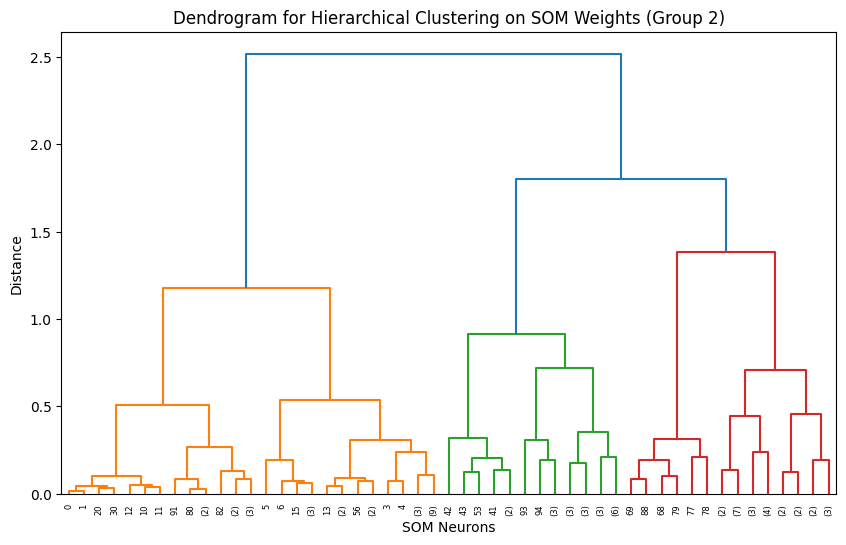

Optimal k (Silhouette Score): 5, Silhouette Score: 0.3585
Optimal k (Davies-Bouldin Score): 5, Davies-Bouldin Score: 0.7923


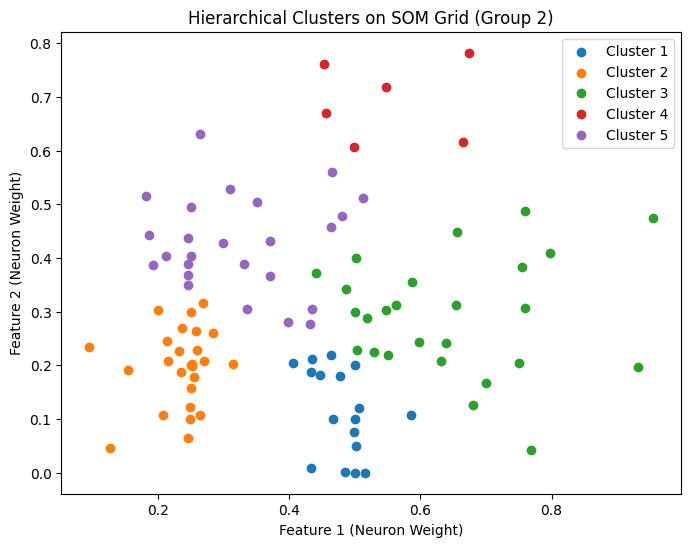

Cluster Summary (SOM + Hierarchical Clustering):
                          weekend_spending  week_spending  total_orders
som_hierarchical_cluster                                               
1                                 0.498475       0.105665      0.234657
2                                 0.108612       0.154382      0.152175
3                                 0.657072       0.327020      0.453730
4                                 0.586565       0.680345      0.703824
5                                 0.211952       0.478023      0.432926


In [86]:
som_grid_x = 10
som_grid_y = 10
learning_rate = 0.5
sigma = 1.0

# Train the SOM
som = MiniSom(x=som_grid_x, y=som_grid_y, input_len=group_2.shape[1], sigma=sigma, learning_rate=learning_rate)
som.random_weights_init(group_2.values)
som.train_random(group_2.values, 1000)

# Extract SOM weights
som_weights = som.get_weights().reshape(som_grid_x * som_grid_y, group_2.shape[1])

# Perform hierarchical clustering on SOM weights
linkage_matrix = linkage(som_weights, method='ward')

# Visualize dendrogram
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix, truncate_mode="level", p=5)
plt.title("Dendrogram for Hierarchical Clustering on SOM Weights (Group 2)")
plt.xlabel("SOM Neurons")
plt.ylabel("Distance")
plt.show()

# Automatically determine optimal_k using silhouette score and Davies-Bouldin score
possible_k = range(2, 6)
hierarchical_silhouette_scores = {}
hierarchical_davies_bouldin_scores = {}

for k in possible_k:
    hierarchical_labels = fcluster(linkage_matrix, k, criterion='maxclust')

    # Only calculate scores if more than one cluster
    if len(np.unique(hierarchical_labels)) > 1:
        silhouette = silhouette_score(som_weights, hierarchical_labels)
        davies_bouldin = davies_bouldin_score(som_weights, hierarchical_labels)
        hierarchical_silhouette_scores[k] = silhouette
        hierarchical_davies_bouldin_scores[k] = davies_bouldin

# Determine optimal_k based on silhouette scores and Davies-Bouldin scores
if hierarchical_silhouette_scores:
    optimal_k_silhouette = max(hierarchical_silhouette_scores, key=hierarchical_silhouette_scores.get)
    optimal_k_davies_bouldin = min(hierarchical_davies_bouldin_scores, key=hierarchical_davies_bouldin_scores.get)
    optimal_k = optimal_k_silhouette  # Defaulting to silhouette-based selection, refine logic if needed

    print(f"Optimal k (Silhouette Score): {optimal_k_silhouette}, Silhouette Score: {hierarchical_silhouette_scores[optimal_k_silhouette]:.4f}")
    print(f"Optimal k (Davies-Bouldin Score): {optimal_k_davies_bouldin}, Davies-Bouldin Score: {hierarchical_davies_bouldin_scores[optimal_k_davies_bouldin]:.4f}")
else:
    print("No valid clustering with multiple clusters found.")
    optimal_k = None

if optimal_k:
    hierarchical_labels = fcluster(linkage_matrix, optimal_k, criterion='maxclust')

    # Map hierarchical clusters back to group_2
    data_hierarchical_clusters = []
    for row in group_2.values:
        winner_coords = som.winner(row)
        winner_index = winner_coords[0] * som_grid_y + winner_coords[1]
        data_hierarchical_clusters.append(hierarchical_labels[winner_index])

    # Add Hierarchical results to cluster_results_group_2
    cluster_results_group_2['som_hierarchical_cluster'] = data_hierarchical_clusters

    # Plot clusters on SOM grid
    plt.figure(figsize=(8, 6))
    for cluster in np.unique(hierarchical_labels):
        plt.scatter(
            som_weights[hierarchical_labels == cluster, 0],
            som_weights[hierarchical_labels == cluster, 1],
            label=f'Cluster {cluster}'
        )
    plt.title("Hierarchical Clusters on SOM Grid (Group 2)")
    plt.xlabel("Feature 1 (Neuron Weight)")
    plt.ylabel("Feature 2 (Neuron Weight)")
    plt.legend()
    plt.show()

    # Display cluster summary
    cluster_summary = group_2.groupby(cluster_results_group_2['som_hierarchical_cluster']).mean()
    print("Cluster Summary (SOM + Hierarchical Clustering):")
    print(cluster_summary)


## 2.5 Meanshift

[⬆️ Back to Top](#top)

Number of clusters identified by MeanShift (Group 2): 5
MeanShift Silhouette Score (Group 2): 0.4768
MeanShift Davies-Bouldin Score (Group 2): 0.8189


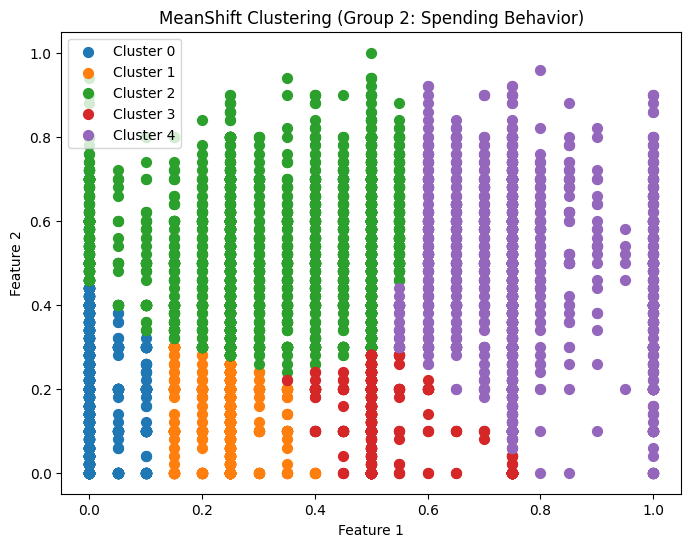

Cluster Summary (MeanShift):
   weekend_spending  week_spending  total_orders
0          0.001396       0.183399      0.141506
1          0.248435       0.106845      0.158630
2          0.323394       0.447731      0.443914
3          0.508893       0.109038      0.240458
4          0.768226       0.421951      0.560955


In [87]:
# ======= MeanShift Clustering =======
bandwidth = estimate_bandwidth(group_2, quantile=0.2, n_samples=1000)
mean_shift = MeanShift(bandwidth=bandwidth, bin_seeding=True)
mean_shift_labels = mean_shift.fit_predict(group_2)
cluster_results_group_2['mean_shift_cluster'] = mean_shift_labels

n_clusters = len(np.unique(mean_shift_labels))
print(f"Number of clusters identified by MeanShift (Group 2): {n_clusters}")

# Validate clustering and calculate silhouette and Davies-Bouldin scores if applicable
if n_clusters > 1:
    mean_shift_silhouette = silhouette_score(group_2, mean_shift_labels)
    mean_shift_davies_bouldin = davies_bouldin_score(group_2, mean_shift_labels)
    print(f"MeanShift Silhouette Score (Group 2): {mean_shift_silhouette:.4f}")
    print(f"MeanShift Davies-Bouldin Score (Group 2): {mean_shift_davies_bouldin:.4f}")
else:
    print("MeanShift clustering resulted in a single cluster; silhouette and Davies-Bouldin scores cannot be calculated.")

# Plot the MeanShift clusters
plt.figure(figsize=(8, 6))
for cluster in np.unique(mean_shift_labels):
    cluster_points = group_2[mean_shift_labels == cluster]
    plt.scatter(cluster_points.iloc[:, 0], cluster_points.iloc[:, 1], s=50, label=f'Cluster {cluster}')
plt.title("MeanShift Clustering (Group 2: Spending Behavior)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

# Display cluster summary if applicable
if n_clusters > 1:
    mean_shift_summary = group_2.groupby(mean_shift_labels).mean()
    print("Cluster Summary (MeanShift):")
    print(mean_shift_summary)
else:
    print("No meaningful clustering identified.")


## 2.6 DBSCAN

[⬆️ Back to Top](#top)

Number of clusters identified by DBSCAN (Group 2): 1
Number of noise points: 0
DBSCAN clustering resulted in a single cluster or only noise; silhouette and Davies-Bouldin scores cannot be calculated.


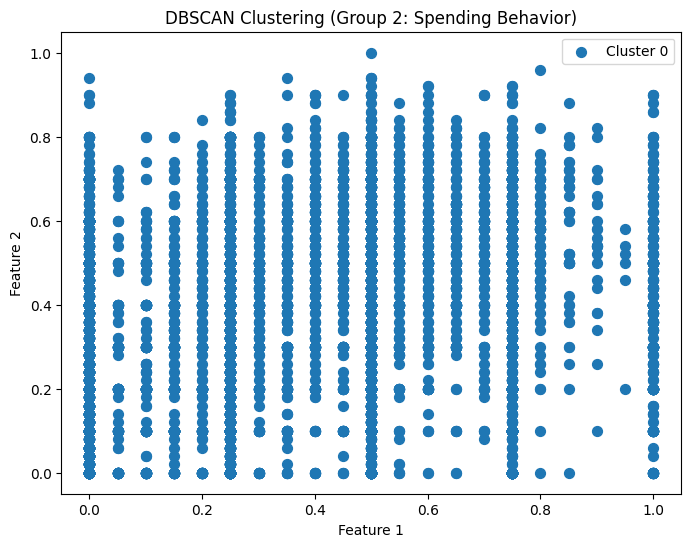

No meaningful clustering identified.


In [88]:
# ======= DBSCAN Clustering =======
eps = 0.5
min_samples = 5
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
dbscan_labels = dbscan.fit_predict(group_2)
cluster_results_group_2['dbscan_cluster'] = dbscan_labels

n_clusters = len(np.unique(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
n_noise = list(dbscan_labels).count(-1)

print(f"Number of clusters identified by DBSCAN (Group 2): {n_clusters}")
print(f"Number of noise points: {n_noise}")

# Validate clustering and calculate silhouette and Davies-Bouldin scores if applicable
if n_clusters > 1:
    dbscan_silhouette = silhouette_score(
        group_2[group_2['dbscan_cluster'] != -1],
        group_2[group_2['dbscan_cluster'] != -1]['dbscan_cluster']
    )
    dbscan_davies_bouldin = davies_bouldin_score(
        group_2[group_2['dbscan_cluster'] != -1],
        group_2[group_2['dbscan_cluster'] != -1]['dbscan_cluster']
    )
    print(f"DBSCAN Silhouette Score (Group 2): {dbscan_silhouette:.4f}")
    print(f"DBSCAN Davies-Bouldin Score (Group 2): {dbscan_davies_bouldin:.4f}")
else:
    print("DBSCAN clustering resulted in a single cluster or only noise; silhouette and Davies-Bouldin scores cannot be calculated.")

# Plot the DBSCAN clusters
plt.figure(figsize=(8, 6))
for cluster in np.unique(dbscan_labels):
    if cluster == -1:
        cluster_points = group_2[dbscan_labels == cluster]
        plt.scatter(cluster_points.iloc[:, 0], cluster_points.iloc[:, 1], color='gray', s=10, label='Noise')
    else:
        cluster_points = group_2[dbscan_labels == cluster]
        plt.scatter(cluster_points.iloc[:, 0], cluster_points.iloc[:, 1], s=50, label=f'Cluster {cluster}')
plt.title("DBSCAN Clustering (Group 2: Spending Behavior)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

# Display cluster summary if applicable
if n_clusters > 1:
    dbscan_summary = group_2[group_2['dbscan_cluster'] != -1].groupby('dbscan_cluster').mean()
    print("Cluster Summary (DBSCAN):")
    print(dbscan_summary)
else:
    print("No meaningful clustering identified.")


## Analysis

In [89]:
# Define the features to summarize for Group 2
features_to_summarize = ['weekend_spending', 'week_spending', 'total_orders']

# K-Means
group2_clusters_kmeans = reverse_scaling(cluster_results_group_2, data_normal, features_to_summarize, 'kmeans_cluster')
cluster_summary_kmeans = summarize_cluster_dataframe(group2_clusters_kmeans, 'kmeans_cluster', features_to_summarize)
cluster_summary_kmeans

weekend_spending                         week_spending         \
                           mean median       std  count          mean median   
kmeans_cluster                                                                 
0                      0.005194    0.0  0.041708  11436      1.675428    2.0   
1                      2.417266    2.0  0.672291   3475      5.404317    5.0   
2                      0.695759    1.0  0.469164   4881      4.223725    4.0   
3                      0.996409    1.0  0.068375   7518      1.060282    1.0   
4                      2.202915    2.0  0.449496   4459      1.608791    2.0   

                                total_orders                          
                     std  count         mean median       std  count  
kmeans_cluster                                                        
0               0.786787  11436     1.680623    2.0  0.785785  11436  
1               1.312871   3475     7.821583    7.6  1.385344   3475  
2               1.101810   4881     4.919484    4.8  1.080816   4881  
3               0.776833   7518     2.056691    2.0  0.778051   7518  
4               1.075138   4459     3.811707    4.0  1.174355   4459

In [90]:
# SOM + K-Means
group2_clusters_som_kmeans = reverse_scaling(cluster_results_group_2, data_normal, features_to_summarize, 'som_kmeans_cluster')
cluster_summary_som_kmeans = summarize_cluster_dataframe(group2_clusters_som_kmeans, 'som_kmeans_cluster', features_to_summarize)
cluster_summary_som_kmeans

weekend_spending                         week_spending  \
                               mean median       std  count          mean   
som_kmeans_cluster                                                          
0                          2.225658    2.0  0.928781   4708      5.198683   
1                          0.690691    1.0  0.746507  27061      1.819061   

                                           total_orders                   \
                   median       std  count         mean median       std   
som_kmeans_cluster                                                         
0                     5.2  1.553906   4708     7.424342    7.0  1.440526   
1                     2.0  1.233821  27061     2.509752    2.0  1.359340   

                           
                    count  
som_kmeans_cluster         
0                    4708  
1                   27061

In [91]:
# Hierarchical
group2_clusters_hierarchical = reverse_scaling(cluster_results_group_2, data_normal, features_to_summarize, 'hierarchical_cluster_group_2')
cluster_summary_hierarchical = summarize_cluster_dataframe(group2_clusters_hierarchical, 'hierarchical_cluster_group_2', features_to_summarize)
cluster_summary_hierarchical

weekend_spending                          \
                                         mean median       std  count   
hierarchical_cluster_group_2                                            
0                                    0.977456    1.0  0.116464   8969   
1                                    2.109347    2.0  0.382112   4964   
2                                    0.577559    1.0  0.496082   3449   
3                                    2.573944    2.6  0.691851   3078   
4                                    0.001503    0.0  0.020805  11309   

                             week_spending                          \
                                      mean median       std  count   
hierarchical_cluster_group_2                                         
0                                 1.361222    1.0  1.015381   8969   
1                                 1.890250    2.0  1.303840   4964   
2                                 4.771122    4.4  1.063899   3449   
3                                 5.403834    5.2  1.396853   3078   
4                                 1.681882    2.0  0.787617  11309   

                             total_orders                          
                                     mean median       std  count  
hierarchical_cluster_group_2                                       
0                                2.338678    2.0  1.004927   8969  
1                                3.999597    4.0  1.276783   4964  
2                                5.348681    5.0  1.204159   3449  
3                                7.977778    7.8  1.333189   3078  
4                                1.683385    2.0  0.788795  11309

In [92]:
# SOM + Hierarchical
group2_clusters_som_hierarchical = reverse_scaling(cluster_results_group_2, data_normal, features_to_summarize, 'som_hierarchical_cluster')
cluster_summary_som_hierarchical = summarize_cluster_dataframe(group2_clusters_som_hierarchical, 'som_hierarchical_cluster', features_to_summarize)
cluster_summary_som_hierarchical

weekend_spending                          \
                                     mean median       std  count   
som_hierarchical_cluster                                            
1                                1.993898    2.0  0.062180   2655   
2                                0.434449    0.0  0.492437  20343   
3                                2.628290    2.8  0.644450   3245   
4                                2.346261    2.2  0.583804   1217   
5                                0.847807    1.0  0.691249   4309   

                         week_spending                         total_orders  \
                                  mean median       std  count         mean   
som_hierarchical_cluster                                                      
1                             1.056648    1.0  0.782659   2655     3.050546   
2                             1.543823    1.0  0.906290  20343     1.978273   
3                             3.270200    3.0  1.297970   3245     5.898490   
4                             6.803451    6.8  0.870772   1217     9.149712   
5                             4.780227    4.8  0.923720   4309     5.628034   

                                                  
                         median       std  count  
som_hierarchical_cluster                          
1                           3.0  0.782335   2655  
2                           2.0  0.948442  20343  
3                           5.8  1.449848   3245  
4                           9.0  1.003400   1217  
5                           5.4  1.197100   4309

In [93]:
# MeanShift
group2_clusters_mean_shift = reverse_scaling(cluster_results_group_2, data_normal, features_to_summarize, 'mean_shift_cluster')
cluster_summary_mean_shift = summarize_cluster_dataframe(group2_clusters_mean_shift, 'mean_shift_cluster', features_to_summarize)
cluster_summary_mean_shift

weekend_spending                         week_spending  \
                               mean median       std  count          mean   
mean_shift_cluster                                                          
0                          0.005584    0.0  0.043512  12285      1.833993   
1                          0.993738    1.0  0.068518   7538      1.068453   
2                          1.293574    1.0  0.627709   6801      4.477312   
3                          2.035571    2.0  0.196705   2890      1.090381   
4                          3.072905    3.0  0.436009   2255      4.219512   

                                           total_orders                   \
                   median       std  count         mean median       std   
mean_shift_cluster                                                         
0                     2.0  0.957796  12285     1.839577    2.0  0.957345   
1                     1.0  0.785199   7538     2.062192    2.0  0.782498   
2                     4.0  1.366530   6801     5.770887    5.4  1.474225   
3                     1.0  0.830317   2890     3.125952    3.0  0.805758   
4                     4.0  1.986166   2255     7.292417    7.2  1.989388   

                           
                    count  
mean_shift_cluster         
0                   12285  
1                    7538  
2                    6801  
3                    2890  
4                    2255

In [94]:
# DBSCAN
group2_clusters_dbscan = reverse_scaling(cluster_results_group_2, data_normal, features_to_summarize, 'dbscan_cluster')
cluster_summary_dbscan = summarize_cluster_dataframe(group2_clusters_dbscan, 'dbscan_cluster', features_to_summarize)
cluster_summary_dbscan

weekend_spending                         week_spending         \
                           mean median       std  count          mean median   
dbscan_cluster                                                                 
0                      0.918166    1.0  0.948646  31769      2.319903    2.0   

                                total_orders                          
                     std  count         mean median       std  count  
dbscan_cluster                                                        
0               1.759641  31769     3.238069    3.0  2.220463  31769

## 2.7 t-SNE

[⬆️ Back to Top](#top)

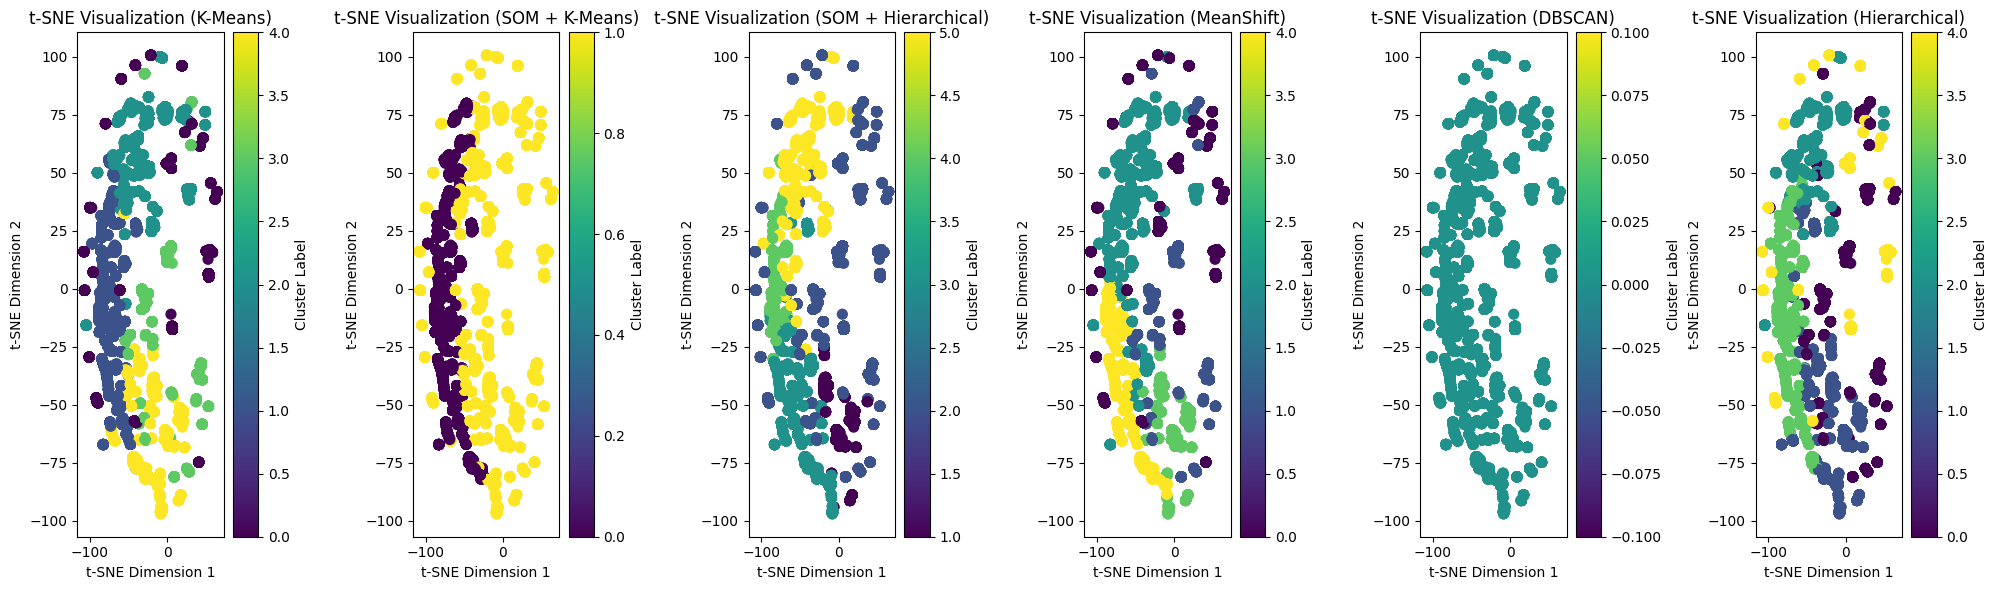

In [95]:
# Combine clustering labels into a dictionary for Group 2
cluster_results_group_2_dict = {
    'K-Means': cluster_results_group_2['kmeans_cluster'].values,
    'SOM + K-Means': cluster_results_group_2['som_kmeans_cluster'].values,
    'SOM + Hierarchical': cluster_results_group_2['som_hierarchical_cluster'].values,
    'MeanShift': cluster_results_group_2['mean_shift_cluster'].values,
    'DBSCAN': cluster_results_group_2['dbscan_cluster'].values,
    'Hierarchical': cluster_results_group_2['hierarchical_cluster_group_2'].values  # Add Hierarchical clustering
}

# Apply t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
group_2_tsne = tsne.fit_transform(cluster_results_group_2.drop(
    ['kmeans_cluster', 'som_kmeans_cluster', 'som_hierarchical_cluster', 'mean_shift_cluster', 'dbscan_cluster', 'hierarchical_cluster_group_2'], 
    axis=1))

# Visualize the t-SNE results for all clustering methods
fig, axes = plt.subplots(1, len(cluster_results_group_2_dict), figsize=(20, 6))
if len(cluster_results_group_2_dict) == 1:
    axes = [axes]

for i, (method, labels) in enumerate(cluster_results_group_2_dict.items()):
    scatter = axes[i].scatter(group_2_tsne[:, 0], group_2_tsne[:, 1], c=labels, cmap='viridis', s=50)
    axes[i].set_title(f't-SNE Visualization ({method})')
    axes[i].set_xlabel('t-SNE Dimension 1')
    axes[i].set_ylabel('t-SNE Dimension 2')
    plt.colorbar(scatter, ax=axes[i], label='Cluster Label')
plt.tight_layout()
plt.show()

# **Clustering Analysis for Group 2: Spending Behavior**

## **Evaluation Table**

| **Clustering Method**          | **Number of Clusters** | **Silhouette Score** | **Davies-Bouldin Index** | **Visual Observations**                                                                                     |
|--------------------------------|------------------------|-----------------------|--------------------------|-----------------------------------------------------------------------------------------------------------|
| **K-Means**                    | 5                     | 0.5144               | 0.7344                   | Clear separation into five clusters; centroids well-positioned with minimal overlap.                     |
| **K-Means on SOM Weights**     | 2                     | 0.4249               | 0.7804                   | Moderate cluster separation with slight overlap; reduced cluster count compared to standard K-Means.      |
| **Hierarchical**               | 5                     | 0.4891               | 0.8117                   | Comparable separation to K-Means; cluster boundaries slightly less defined.                               |
| **Hierarchical on SOM Weights**| 5                     | 0.3585               | 0.7923                   | Lower silhouette score; clustering on SOM weights introduces some overlap.                                |
| **MeanShift**                  | 5                     | 0.4768               | 0.8189                   | Similar to K-Means; slightly lower silhouette score, but clear clusters observed.                        |
| **DBSCAN**                     | 1                     | -                    | -                        | Unable to form multiple clusters; all points assigned to a single cluster.                               |

---

## **t-SNE Visualization**

The t-SNE visualizations below provide an overview of the spatial distribution of clusters across different clustering methods for Group 2: Spending Behavior:

1. **K-Means**:
   - Five distinct clusters are well-separated, corresponding to the highest silhouette score.
   - Minimal overlap between clusters, reflecting the clustering quality of K-Means.

2. **K-Means on SOM Weights**:
   - Reduced cluster count (two clusters) compared to standard K-Means.
   - Overlap is more prominent, aligning with the lower silhouette score.

3. **Hierarchical Clustering**:
   - Clear separation of five clusters.
   - Slightly weaker boundaries compared to K-Means; overlap is visible in specific areas.

4. **Hierarchical Clustering on SOM Weights**:
   - Five clusters identified, but separation is less distinct than standard Hierarchical.
   - Overlapping regions and weaker boundaries, as reflected in the silhouette score.

5. **MeanShift**:
   - Five clusters identified with moderate separation.
   - Clusters show slight overlap but remain comparable to K-Means in performance.

6. **DBSCAN**:
   - All data points are grouped into a single cluster, indicating a failure to identify meaningful clusters for this dataset.
   - No separation is visible in the t-SNE plot, consistent with the lack of clustering.

---

## **Key Observations**

- **Cluster Characteristics (K-Means)**:
  - **Cluster 0**:
    - **Weekend Spending**: Minimal (mean: 0.0051).
    - **Weekday Spending**: Low (mean: 1.67).
    - **Total Orders**: 1.68.
    - **Size**: 11,436 customers.
  - **Cluster 1**:
    - **Weekend Spending**: High (mean: 2.41).
    - **Weekday Spending**: High (mean: 5.40).
    - **Total Orders**: 7.82.
    - **Size**: 3,475 customers.
  - **Cluster 2**:
    - **Weekend Spending**: Moderate (mean: 0.69).
    - **Weekday Spending**: Moderate (mean: 4.22).
    - **Total Orders**: 4.91.
    - **Size**: 4,881 customers.
  - **Cluster 3**:
    - **Weekend Spending**: Moderate (mean: 0.99).
    - **Weekday Spending**: Low (mean: 1.06).
    - **Total Orders**: 2.05.
    - **Size**: 7,518 customers.
  - **Cluster 4**:
    - **Weekend Spending**: High (mean: 2.20).
    - **Weekday Spending**: Moderate (mean: 1.60).
    - **Total Orders**: 3.81.
    - **Size**: 4,459 customers.

- **Performance Summary**:
  - K-Means provides the best separation with well-defined clusters and the highest silhouette score.
  - Hierarchical clustering performs comparably but has slightly weaker cluster boundaries.
  - MeanShift identifies similar clusters but does not outperform K-Means.
  - DBSCAN fails to form meaningful clusters, indicating it may not be suitable for this group.

---

## **Selected Clustering Method: K-Means**

- **Silhouette Score**: 0.5144
- **Davies-Bouldin Index**: 0.7344
- **Cluster Characteristics**:
  - Provides the most distinct clusters with meaningful interpretations for spending behavior.

---


# **3. Group 3: Order Timing & Promotions**

## 3.1 K-Means

[⬆️ Back to Top](#top)

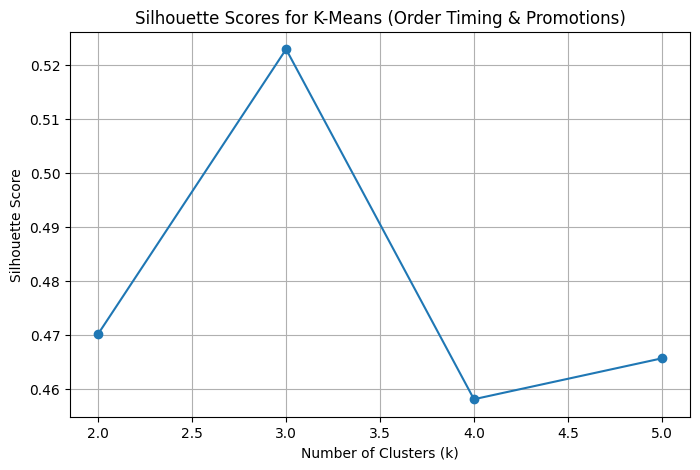

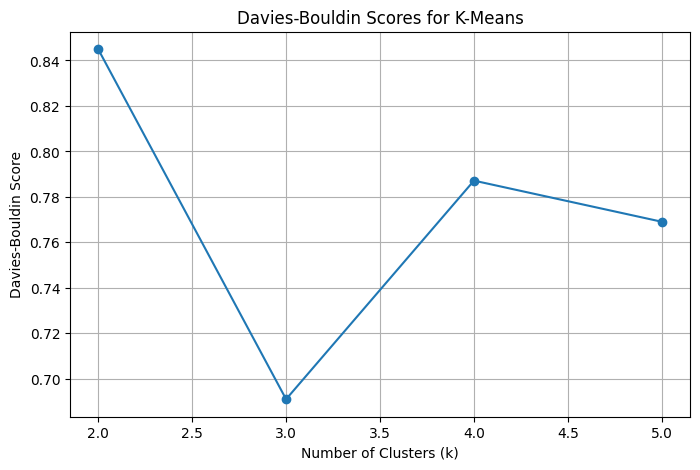

Optimal k (Silhouette Score): 3, Silhouette Score: 0.5229154551633336
Optimal k (Davies-Bouldin Index): 3, Davies-Bouldin Score: 0.690961351123902
Final chosen k: 3
Consistent Silhouette Score for k=3: 0.5229154551633336


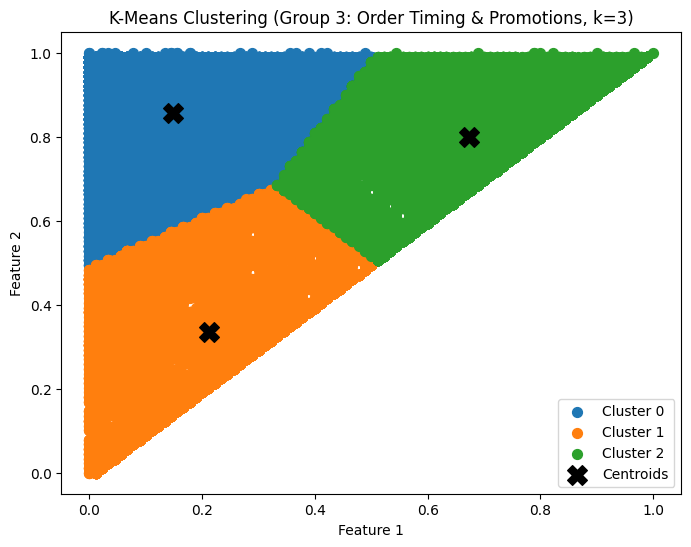

In [96]:
# Initialize a DataFrame to store clustering results for Group 3
cluster_results_group_3 = group_3.copy()

# ======= K-Means Clustering =======
k_values = range(2, 6)

# Initialize storage for metrics
silhouette_scores = []
davies_bouldin_scores = []
kmeans_labels_dict = {}

# Iterate through k values
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)  # Set n_init to 10 for stable results
    labels = kmeans.fit_predict(group_3)

    # Compute Silhouette Score
    silhouette_score_value = silhouette_score(group_3, labels)
    silhouette_scores.append(silhouette_score_value)

    # Compute Davies-Bouldin Index
    davies_bouldin_score_value = davies_bouldin_score(group_3, labels)
    davies_bouldin_scores.append(davies_bouldin_score_value)

    # Store labels for each k
    kmeans_labels_dict[k] = labels

# Plot Silhouette Scores
plt.figure(figsize=(8, 5))
plt.plot(k_values, silhouette_scores, marker='o')
plt.title("Silhouette Scores for K-Means (Order Timing & Promotions)")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()

# Plot Davies-Bouldin Scores
plt.figure(figsize=(8, 5))
plt.plot(k_values, davies_bouldin_scores, marker='o')
plt.title("Davies-Bouldin Scores for K-Means")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Davies-Bouldin Score")
plt.grid(True)
plt.show()

# Automatically determine Optimal k based on Silhouette Score and Davies-Bouldin Index
optimal_k_silhouette = k_values[silhouette_scores.index(max(silhouette_scores))]
optimal_k_davies_bouldin = k_values[davies_bouldin_scores.index(min(davies_bouldin_scores))]

# Decide final optimal_k (e.g., prioritize silhouette score but consider other metrics)
optimal_k = optimal_k_silhouette  # You can refine this logic as needed
print(f"Optimal k (Silhouette Score): {optimal_k_silhouette}, Silhouette Score: {max(silhouette_scores)}")
print(f"Optimal k (Davies-Bouldin Index): {optimal_k_davies_bouldin}, Davies-Bouldin Score: {min(davies_bouldin_scores)}")
print(f"Final chosen k: {optimal_k}")

# Reuse labels from the loop to ensure consistency
optimal_labels = kmeans_labels_dict[optimal_k]
consistent_silhouette_score = silhouette_score(group_3, optimal_labels)
print(f"Consistent Silhouette Score for k={optimal_k}: {consistent_silhouette_score}")

# Perform final clustering with the optimal k
final_kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_results_group_3['kmeans_cluster'] = final_kmeans.fit_predict(group_3)

# Plot the final clusters
plt.figure(figsize=(8, 6))
for cluster in np.unique(cluster_results_group_3['kmeans_cluster']):
    cluster_points = group_3[cluster_results_group_3['kmeans_cluster'] == cluster]
    plt.scatter(
        cluster_points.iloc[:, 0], cluster_points.iloc[:, 1], 
        label=f"Cluster {cluster}", s=50
    )
plt.scatter(final_kmeans.cluster_centers_[:, 0], final_kmeans.cluster_centers_[:, 1], 
            s=200, c='black', marker='X', label='Centroids')  # Mark centroids
plt.title(f"K-Means Clustering (Group 3: Order Timing & Promotions, k={optimal_k})")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


## 3.2 SOM with K-Means

[⬆️ Back to Top](#top)

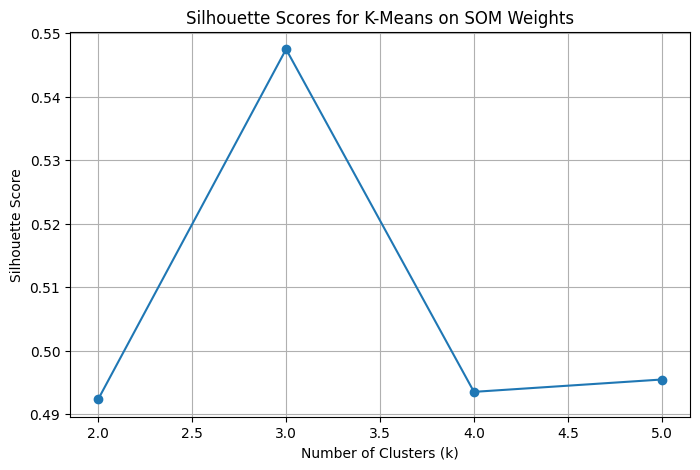

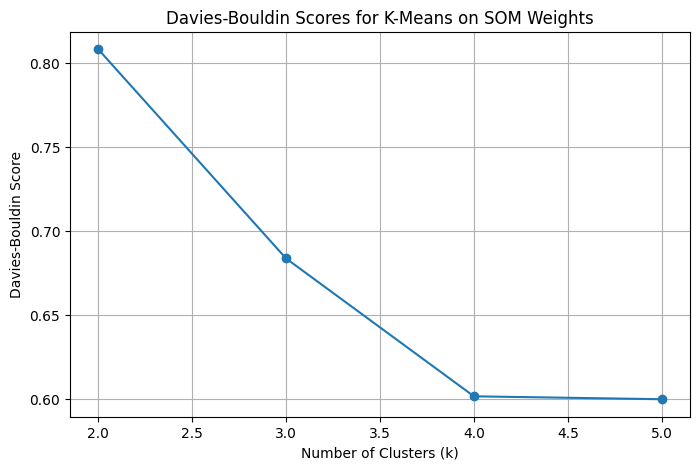

Optimal k (Silhouette Score): 3, Silhouette Score: 0.5475
Optimal k (Davies-Bouldin Index): 5, Davies-Bouldin Score: 0.6000
Final chosen k: 3
Consistent Silhouette Score for k=3: 0.5475


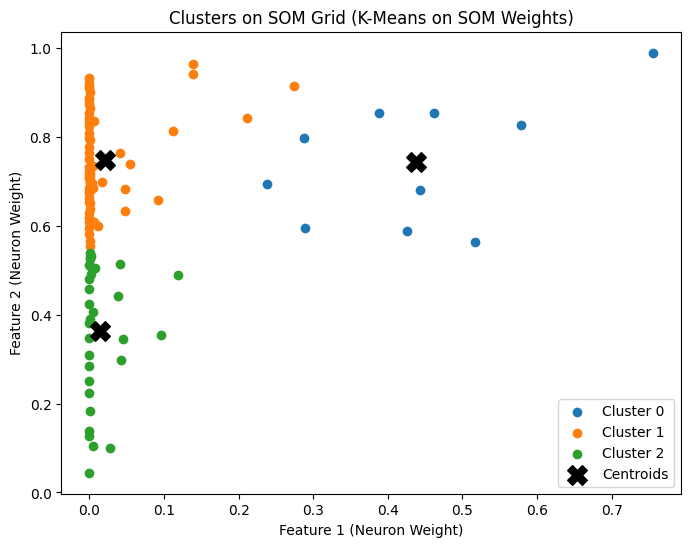

Cluster Summary:
                    first_order  last_order  order_activity_duration
som_kmeans_cluster                                                  
0                      0.549066    0.734367                 0.188253
1                      0.112110    0.875301                 0.764577
2                      0.124283    0.276582                 0.160337


In [97]:
som_grid_x = 10
som_grid_y = 10
learning_rate = 0.5
sigma = 1.0

# Train the SOM
som = MiniSom(x=som_grid_x, y=som_grid_y, input_len=group_3.shape[1], sigma=sigma, learning_rate=learning_rate)
som.random_weights_init(group_3.values)
som.train_random(data=group_3.values, num_iteration=1000)

# Extract SOM weights
som_weights = som.get_weights().reshape(som_grid_x * som_grid_y, group_3.shape[1])

# Initialize storage for metrics
silhouette_scores = []
davies_bouldin_scores = []
k_values = range(2, 6)
kmeans_labels_dict = {}

# Iterate through k values
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(som_weights)

    # Compute Silhouette Score
    silhouette_score_value = silhouette_score(som_weights, labels)
    silhouette_scores.append(silhouette_score_value)

    # Compute Davies-Bouldin Index
    davies_bouldin_score_value = davies_bouldin_score(som_weights, labels)
    davies_bouldin_scores.append(davies_bouldin_score_value)

    # Store labels for each k
    kmeans_labels_dict[k] = labels

# Plot Silhouette Scores
plt.figure(figsize=(8, 5))
plt.plot(k_values, silhouette_scores, marker='o')
plt.title("Silhouette Scores for K-Means on SOM Weights")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()

# Plot Davies-Bouldin Scores
plt.figure(figsize=(8, 5))
plt.plot(k_values, davies_bouldin_scores, marker='o')
plt.title("Davies-Bouldin Scores for K-Means on SOM Weights")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Davies-Bouldin Score")
plt.grid(True)
plt.show()

# Automatically determine Optimal k based on Silhouette Score and Davies-Bouldin Index
optimal_k_silhouette = k_values[silhouette_scores.index(max(silhouette_scores))]
optimal_k_davies_bouldin = k_values[davies_bouldin_scores.index(min(davies_bouldin_scores))]

# Decide final optimal_k (e.g., prioritize silhouette score but consider other metrics)
optimal_k = optimal_k_silhouette  # You can refine this logic as needed
print(f"Optimal k (Silhouette Score): {optimal_k_silhouette}, Silhouette Score: {max(silhouette_scores):.4f}")
print(f"Optimal k (Davies-Bouldin Index): {optimal_k_davies_bouldin}, Davies-Bouldin Score: {min(davies_bouldin_scores):.4f}")
print(f"Final chosen k: {optimal_k}")

# Reuse labels from the loop to ensure consistency
optimal_labels = kmeans_labels_dict[optimal_k]
consistent_silhouette_score = silhouette_score(som_weights, optimal_labels)
print(f"Consistent Silhouette Score for k={optimal_k}: {consistent_silhouette_score:.4f}")

# Perform final clustering with the optimal k
final_kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
som_cluster_labels = final_kmeans.fit_predict(som_weights)

data_som_clusters = []
for row in group_3.values:
    winner_coords = som.winner(row)
    winner_index = winner_coords[0] * som_grid_y + winner_coords[1]
    cluster_label = final_kmeans.labels_[winner_index]
    data_som_clusters.append(cluster_label)

# Add SOM-based K-Means results to cluster_results_group_3
cluster_results_group_3['som_kmeans_cluster'] = data_som_clusters

# Plot the final clusters on the SOM grid
plt.figure(figsize=(8, 6))
for i in range(optimal_k):
    plt.scatter(
        som_weights[som_cluster_labels == i, 0],
        som_weights[som_cluster_labels == i, 1],
        label=f'Cluster {i}'
    )
plt.scatter(final_kmeans.cluster_centers_[:, 0], final_kmeans.cluster_centers_[:, 1], 
            s=200, c='black', marker='X', label='Centroids')
plt.title("Clusters on SOM Grid (K-Means on SOM Weights)")
plt.xlabel("Feature 1 (Neuron Weight)")
plt.ylabel("Feature 2 (Neuron Weight)")
plt.legend()
plt.show()

# Display cluster summary
cluster_summary = group_3.groupby(cluster_results_group_3['som_kmeans_cluster']).mean()
print("Cluster Summary:")
print(cluster_summary)


## 3.3 Hierarchical

Optimal k (Silhouette Score): 3, Silhouette Score: 0.4926
Optimal k (Davies-Bouldin Score): 3, Davies-Bouldin Score: 0.6365
Hierarchical Clustering Silhouette Score (Group 3): 0.4926
Hierarchical Clustering Davies-Bouldin Score (Group 3): 0.6365


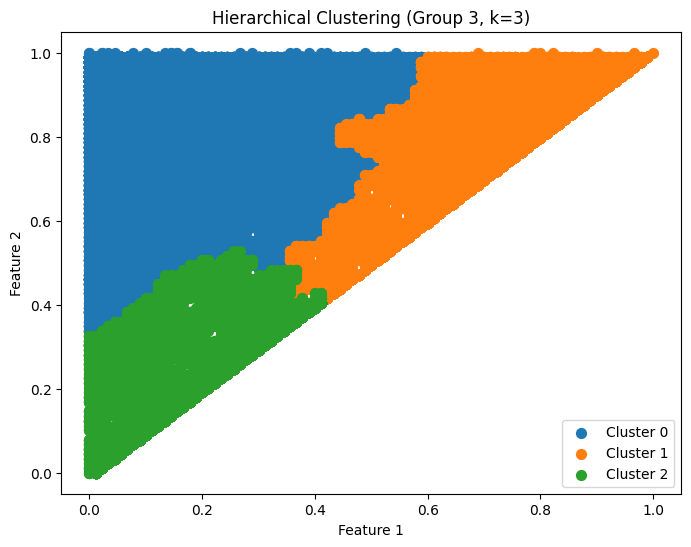

In [98]:
# ======= Hierarchical Clustering for Group 3 =======

possible_k = range(2, 6)
hierarchical_silhouette_scores = {}
hierarchical_davies_bouldin_scores = {}

for k in possible_k:
    hierarchical = AgglomerativeClustering(n_clusters=k, metric='euclidean', linkage='ward')
    hierarchical_labels = hierarchical.fit_predict(group_3)

    if len(np.unique(hierarchical_labels)) > 1:
        silhouette = silhouette_score(group_3, hierarchical_labels)
        davies_bouldin = davies_bouldin_score(group_3, hierarchical_labels)
        hierarchical_silhouette_scores[k] = silhouette
        hierarchical_davies_bouldin_scores[k] = davies_bouldin

if hierarchical_silhouette_scores:
    optimal_k_silhouette = max(hierarchical_silhouette_scores, key=hierarchical_silhouette_scores.get)
    optimal_k_davies_bouldin = min(hierarchical_davies_bouldin_scores, key=hierarchical_davies_bouldin_scores.get)
    optimal_k = optimal_k_silhouette
    print(f"Optimal k (Silhouette Score): {optimal_k_silhouette}, Silhouette Score: {hierarchical_silhouette_scores[optimal_k_silhouette]:.4f}")
    print(f"Optimal k (Davies-Bouldin Score): {optimal_k_davies_bouldin}, Davies-Bouldin Score: {hierarchical_davies_bouldin_scores[optimal_k_davies_bouldin]:.4f}")
else:
    print("No valid clustering with multiple clusters found.")
    optimal_k = None

if optimal_k:
    hierarchical = AgglomerativeClustering(n_clusters=optimal_k, metric='euclidean', linkage='ward')
    hierarchical_labels = hierarchical.fit_predict(group_3)

    cluster_results_group_3['hierarchical_cluster_group_3'] = hierarchical_labels

    silhouette_score_hierarchical = silhouette_score(group_3, hierarchical_labels)
    davies_bouldin_score_hierarchical = davies_bouldin_score(group_3, hierarchical_labels)
    print(f"Hierarchical Clustering Silhouette Score (Group 3): {silhouette_score_hierarchical:.4f}")
    print(f"Hierarchical Clustering Davies-Bouldin Score (Group 3): {davies_bouldin_score_hierarchical:.4f}")

    plt.figure(figsize=(8, 6))
    for cluster in np.unique(hierarchical_labels):
        cluster_points = group_3[hierarchical_labels == cluster]
        plt.scatter(cluster_points.iloc[:, 0], cluster_points.iloc[:, 1], label=f'Cluster {cluster}', s=50)
    plt.title(f"Hierarchical Clustering (Group 3, k={optimal_k})")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend()
    plt.show()

## 3.4 Hierarchical with SOM

[⬆️ Back to Top](#top)

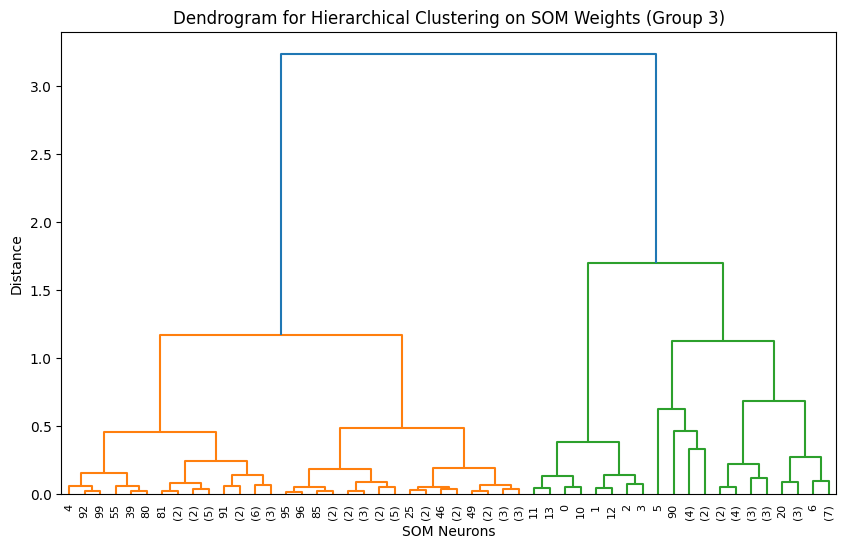

Optimal k (Silhouette Score): 2, Silhouette Score: 0.5119
Optimal k (Davies-Bouldin Score): 3, Davies-Bouldin Score: 0.7031


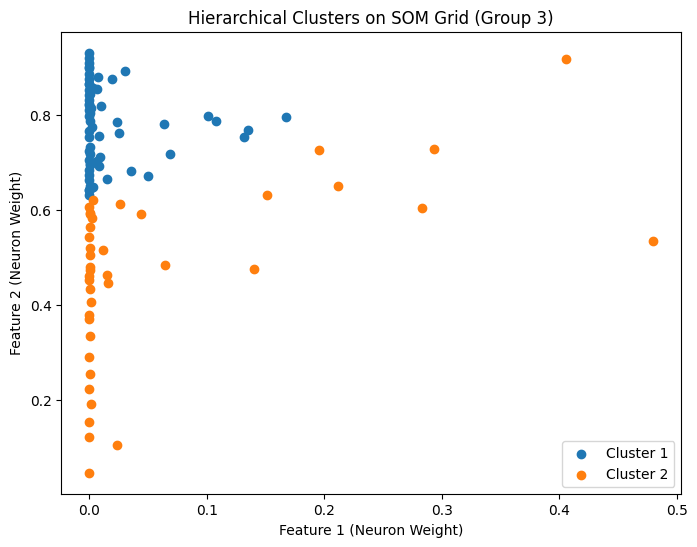

Cluster Summary (SOM + Hierarchical Clustering):
                          first_order  last_order  order_activity_duration
som_hierarchical_cluster                                                  
1                            0.093514    0.885987                 0.793740
2                            0.417305    0.625267                 0.212126


In [99]:
som_grid_x = 10
som_grid_y = 10
learning_rate = 0.5
sigma = 1.0

# Train the SOM
som = MiniSom(x=som_grid_x, y=som_grid_y, input_len=group_3.shape[1], sigma=sigma, learning_rate=learning_rate)
som.random_weights_init(group_3.values)
som.train_random(group_3.values, 1000)

# Extract SOM weights
som_weights = som.get_weights().reshape(som_grid_x * som_grid_y, group_3.shape[1])

# Perform hierarchical clustering on SOM weights
linkage_matrix = linkage(som_weights, method='ward')

# Visualize dendrogram
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix, truncate_mode="level", p=5)
plt.title("Dendrogram for Hierarchical Clustering on SOM Weights (Group 3)")
plt.xlabel("SOM Neurons")
plt.ylabel("Distance")
plt.show()

# Automatically determine optimal_k using silhouette score and Davies-Bouldin score
possible_k = range(2, 6)
hierarchical_silhouette_scores = {}
hierarchical_davies_bouldin_scores = {}

for k in possible_k:
    hierarchical_labels = fcluster(linkage_matrix, k, criterion='maxclust')

    # Only calculate scores if more than one cluster
    if len(np.unique(hierarchical_labels)) > 1:
        silhouette = silhouette_score(som_weights, hierarchical_labels)
        davies_bouldin = davies_bouldin_score(som_weights, hierarchical_labels)
        hierarchical_silhouette_scores[k] = silhouette
        hierarchical_davies_bouldin_scores[k] = davies_bouldin

# Determine optimal_k based on silhouette scores and Davies-Bouldin scores
if hierarchical_silhouette_scores:
    optimal_k_silhouette = max(hierarchical_silhouette_scores, key=hierarchical_silhouette_scores.get)
    optimal_k_davies_bouldin = min(hierarchical_davies_bouldin_scores, key=hierarchical_davies_bouldin_scores.get)
    optimal_k = optimal_k_silhouette  # Defaulting to silhouette-based selection, refine logic if needed

    print(f"Optimal k (Silhouette Score): {optimal_k_silhouette}, Silhouette Score: {hierarchical_silhouette_scores[optimal_k_silhouette]:.4f}")
    print(f"Optimal k (Davies-Bouldin Score): {optimal_k_davies_bouldin}, Davies-Bouldin Score: {hierarchical_davies_bouldin_scores[optimal_k_davies_bouldin]:.4f}")
else:
    print("No valid clustering with multiple clusters found.")
    optimal_k = None

if optimal_k:
    hierarchical_labels = fcluster(linkage_matrix, optimal_k, criterion='maxclust')

    # Map hierarchical clusters back to group_3
    data_hierarchical_clusters = []
    for row in group_3.values:
        winner_coords = som.winner(row)
        winner_index = winner_coords[0] * som_grid_y + winner_coords[1]
        data_hierarchical_clusters.append(hierarchical_labels[winner_index])

    # Add Hierarchical results to cluster_results_group_3
    cluster_results_group_3['som_hierarchical_cluster'] = data_hierarchical_clusters

    # Plot clusters on SOM grid
    plt.figure(figsize=(8, 6))
    for cluster in np.unique(hierarchical_labels):
        plt.scatter(
            som_weights[hierarchical_labels == cluster, 0],
            som_weights[hierarchical_labels == cluster, 1],
            label=f'Cluster {cluster}'
        )
    plt.title("Hierarchical Clusters on SOM Grid (Group 3)")
    plt.xlabel("Feature 1 (Neuron Weight)")
    plt.ylabel("Feature 2 (Neuron Weight)")
    plt.legend()
    plt.show()

    # Display cluster summary
    cluster_summary = group_3.groupby(cluster_results_group_3['som_hierarchical_cluster']).mean()
    print("Cluster Summary (SOM + Hierarchical Clustering):")
    print(cluster_summary)


## 3.5 MeanShift

[⬆️ Back to Top](#top)

Number of clusters identified by MeanShift (Group 3): 3
MeanShift Silhouette Score (Group 3): 0.5004
MeanShift Davies-Bouldin Score (Group 3): 0.7387


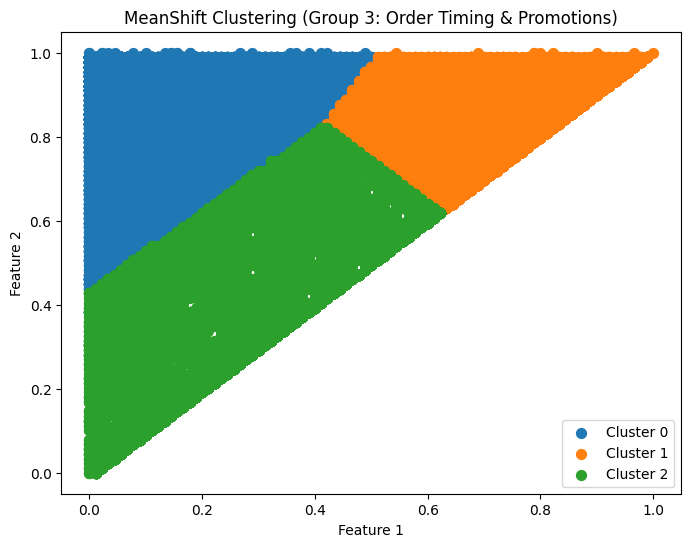

Cluster Summary (MeanShift):
   first_order  last_order  order_activity_duration
0     0.144920    0.855781                 0.712464
1     0.727148    0.852033                 0.126529
2     0.279249    0.404486                 0.131854


In [100]:
# ======= MeanShift Clustering =======
bandwidth = estimate_bandwidth(group_3, quantile=0.2, n_samples=1000)
mean_shift = MeanShift(bandwidth=bandwidth, bin_seeding=True)
mean_shift_labels = mean_shift.fit_predict(group_3)
cluster_results_group_3['mean_shift_cluster'] = mean_shift_labels

n_clusters = len(np.unique(mean_shift_labels))
print(f"Number of clusters identified by MeanShift (Group 3): {n_clusters}")

# Validate clustering and calculate silhouette and Davies-Bouldin scores if applicable
if n_clusters > 1:
    mean_shift_silhouette = silhouette_score(group_3, mean_shift_labels)
    mean_shift_davies_bouldin = davies_bouldin_score(group_3, mean_shift_labels)
    print(f"MeanShift Silhouette Score (Group 3): {mean_shift_silhouette:.4f}")
    print(f"MeanShift Davies-Bouldin Score (Group 3): {mean_shift_davies_bouldin:.4f}")
else:
    print("MeanShift clustering resulted in a single cluster; silhouette and Davies-Bouldin scores cannot be calculated.")

# Plot the MeanShift clusters
plt.figure(figsize=(8, 6))
for cluster in np.unique(mean_shift_labels):
    cluster_points = group_3[mean_shift_labels == cluster]
    plt.scatter(cluster_points.iloc[:, 0], cluster_points.iloc[:, 1], s=50, label=f'Cluster {cluster}')
plt.title("MeanShift Clustering (Group 3: Order Timing & Promotions)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

# Display cluster summary if applicable
if n_clusters > 1:
    mean_shift_summary = group_3.groupby(mean_shift_labels).mean()
    print("Cluster Summary (MeanShift):")
    print(mean_shift_summary)
else:
    print("No meaningful clustering identified.")


## 3.6 DBSCAN

[⬆️ Back to Top](#top)

Number of clusters identified by DBSCAN (Group 3): 1
Number of noise points: 0
DBSCAN clustering resulted in a single cluster or only noise; silhouette and Davies-Bouldin scores cannot be calculated.


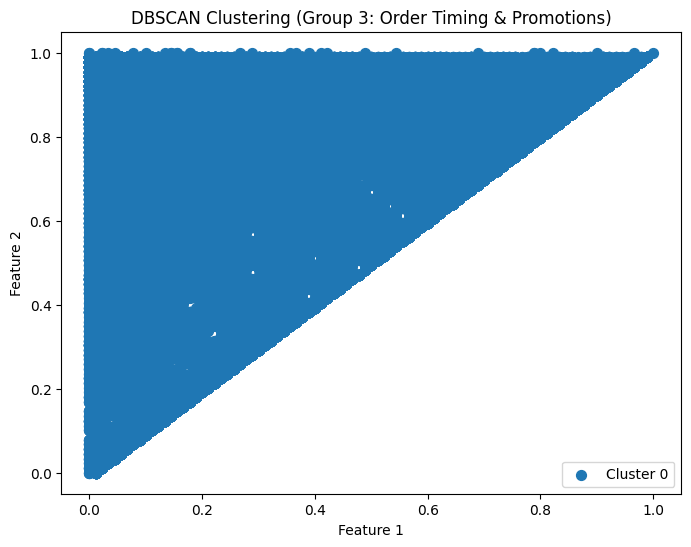

No meaningful clustering identified.


In [101]:
# ======= DBSCAN Clustering =======
eps = 0.5
min_samples = 5
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
dbscan_labels = dbscan.fit_predict(group_3)
cluster_results_group_3['dbscan_cluster'] = dbscan_labels

n_clusters = len(np.unique(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
n_noise = list(dbscan_labels).count(-1)

print(f"Number of clusters identified by DBSCAN (Group 3): {n_clusters}")
print(f"Number of noise points: {n_noise}")

# Validate clustering and calculate silhouette and Davies-Bouldin scores if applicable
if n_clusters > 1:
    dbscan_silhouette = silhouette_score(
        group_3[group_3['dbscan_cluster'] != -1],
        group_3[group_3['dbscan_cluster'] != -1]['dbscan_cluster']
    )
    dbscan_davies_bouldin = davies_bouldin_score(
        group_3[group_3['dbscan_cluster'] != -1],
        group_3[group_3['dbscan_cluster'] != -1]['dbscan_cluster']
    )
    print(f"DBSCAN Silhouette Score (Group 3): {dbscan_silhouette:.4f}")
    print(f"DBSCAN Davies-Bouldin Score (Group 3): {dbscan_davies_bouldin:.4f}")
else:
    print("DBSCAN clustering resulted in a single cluster or only noise; silhouette and Davies-Bouldin scores cannot be calculated.")

# Plot the DBSCAN clusters
plt.figure(figsize=(8, 6))
for cluster in np.unique(dbscan_labels):
    if cluster == -1:
        cluster_points = group_3[dbscan_labels == cluster]
        plt.scatter(cluster_points.iloc[:, 0], cluster_points.iloc[:, 1], color='gray', s=10, label='Noise')
    else:
        cluster_points = group_3[dbscan_labels == cluster]
        plt.scatter(cluster_points.iloc[:, 0], cluster_points.iloc[:, 1], s=50, label=f'Cluster {cluster}')
plt.title("DBSCAN Clustering (Group 3: Order Timing & Promotions)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

# Display cluster summary if applicable
if n_clusters > 1:
    dbscan_summary = group_3[group_3['dbscan_cluster'] != -1].groupby('dbscan_cluster').mean()
    print("Cluster Summary (DBSCAN):")
    print(dbscan_summary)
else:
    print("No meaningful clustering identified.")


## Analysis

In [102]:
# Define the features to summarize for Group 3
features_to_summarize = ['first_order', 'last_order', 'order_activity_duration']

# K-Means
group3_clusters_kmeans = reverse_scaling(cluster_results_group_3, data_normal, features_to_summarize, 'kmeans_cluster')
cluster_summary_kmeans = summarize_cluster_dataframe(group3_clusters_kmeans, 'kmeans_cluster', features_to_summarize)
cluster_summary_kmeans

first_order                          last_order         \
                      mean median        std  count       mean median   
kmeans_cluster                                                          
0                13.418343   10.0  11.383301  14469  77.280600   81.0   
1                19.164602   18.0  12.451176   8153  30.804366   33.0   
2                60.573084   60.0  14.446376   9147  72.180606   74.0   

                                 order_activity_duration                    \
                      std  count                    mean median        std   
kmeans_cluster                                                               
0               10.474553  14469               63.862257   64.0  14.313120   
1               14.523504   8153               11.639765    6.0  13.330704   
2               11.974076   9147               11.607522    6.0  13.116699   

                       
                count  
kmeans_cluster         
0               14469  
1                8153  
2                9147

In [103]:
# SOM + K-Means
group3_clusters_som_kmeans = reverse_scaling(cluster_results_group_3, data_normal, features_to_summarize, 'som_kmeans_cluster')
cluster_summary_som_kmeans = summarize_cluster_dataframe(group3_clusters_som_kmeans, 'som_kmeans_cluster', features_to_summarize)
cluster_summary_som_kmeans


first_order                          last_order         \
                          mean median        std  count       mean median   
som_kmeans_cluster                                                          
0                    49.415924   47.0  18.868384  14695  66.358693   69.0   
1                    10.089896    7.0   8.836773  11580  78.901813   82.0   
2                    11.185475   10.0   7.658728   5494  25.615763   25.0   

                                     order_activity_duration         \
                          std  count                    mean median   
som_kmeans_cluster                                                    
0                   16.268442  14695               16.942770   12.0   
1                    9.521388  11580               68.811917   69.0   
2                   14.022101   5494               14.430288    8.0   

                                      
                          std  count  
som_kmeans_cluster                    
0                   17.159876  14695  
1                   11.338469  11580  
2                   15.521980   5494

In [104]:
# Hierarchical Clustering
group3_clusters_hierarchical = reverse_scaling(cluster_results_group_3, data_normal, features_to_summarize, 'hierarchical_cluster_group_3')
cluster_summary_hierarchical = summarize_cluster_dataframe(group3_clusters_hierarchical, 'hierarchical_cluster_group_3', features_to_summarize)
cluster_summary_hierarchical

first_order                          last_order  \
                                    mean median        std  count       mean   
hierarchical_cluster_group_3                                                   
0                              16.146119   13.0  13.607606  17739  74.090930   
1                              61.571095   61.0  14.311399   8559  68.571445   
2                              16.643758   16.0  10.329690   5471  23.460976   

                                                      order_activity_duration  \
                             median        std  count                    mean   
hierarchical_cluster_group_3                                                    
0                              78.0  13.443707  17739               57.944811   
1                              71.0  14.773273   8559                7.000351   
2                              25.0  11.445934   5471                6.817218   

                                                       
                             median        std  count  
hierarchical_cluster_group_3                           
0                              59.0  18.165441  17739  
1                               0.0   9.524123   8559  
2                               0.0   9.266689   5471

In [105]:
# SOM + Hierarchical
group3_clusters_som_hierarchical = reverse_scaling(cluster_results_group_3, data_normal, features_to_summarize, 'som_hierarchical_cluster')
cluster_summary_som_hierarchical = summarize_cluster_dataframe(group3_clusters_som_hierarchical, 'som_hierarchical_cluster', features_to_summarize)
cluster_summary_som_hierarchical

first_order                          last_order  \
                                mean median        std  count       mean   
som_hierarchical_cluster                                                   
1                           8.416271    7.0   7.003441   9907  79.852831   
2                          37.557451   35.0  23.606937  21862  56.648751   

                                                  order_activity_duration  \
                         median        std  count                    mean   
som_hierarchical_cluster                                                    
1                          82.0   8.043199   9907                71.43656   
2                          60.0  23.868656  21862                19.09130   

                                                   
                         median        std  count  
som_hierarchical_cluster                           
1                          72.0   9.973106   9907  
2                          14.0  18.916625  21862

In [106]:
# MeanShift
group3_clusters_mean_shift = reverse_scaling(cluster_results_group_3, data_normal, features_to_summarize, 'mean_shift_cluster')
cluster_summary_mean_shift = summarize_cluster_dataframe(group3_clusters_mean_shift, 'mean_shift_cluster', features_to_summarize)
cluster_summary_mean_shift

first_order                          last_order         \
                          mean median        std  count       mean median   
mean_shift_cluster                                                          
0                    13.042768   10.0  11.371120  14380  77.164534   81.0   
1                    65.443324   65.0  12.731631   6943  76.830909   78.0   
2                    25.132395   25.0  15.295694  10446  36.999234   38.0   

                                     order_activity_duration         \
                          std  count                    mean median   
mean_shift_cluster                                                    
0                   10.977310  14380               64.121766   64.0   
1                    8.889714   6943               11.387585    6.0   
2                   17.597445  10446               11.866839    6.0   

                                      
                          std  count  
mean_shift_cluster                    
0                   14.030537  14380  
1                   13.132790   6943  
2                   13.161565  10446

In [107]:
# DBSCAN
group3_clusters_dbscan = reverse_scaling(cluster_results_group_3, data_normal, features_to_summarize, 'dbscan_cluster')
cluster_summary_dbscan = summarize_cluster_dataframe(group3_clusters_dbscan, 'dbscan_cluster', features_to_summarize)
cluster_summary_dbscan

first_order                          last_order         \
                      mean median        std  count       mean median   
dbscan_cluster                                                          
0                28.469924   22.0  24.104626  31769  63.884825   71.0   

                                 order_activity_duration                    \
                      std  count                    mean median        std   
dbscan_cluster                                                               
0               22.973185  31769               35.414901   34.0  29.415668   

                       
                count  
dbscan_cluster         
0               31769

## 3.7 t-SNE

[⬆️ Back to Top](#top)

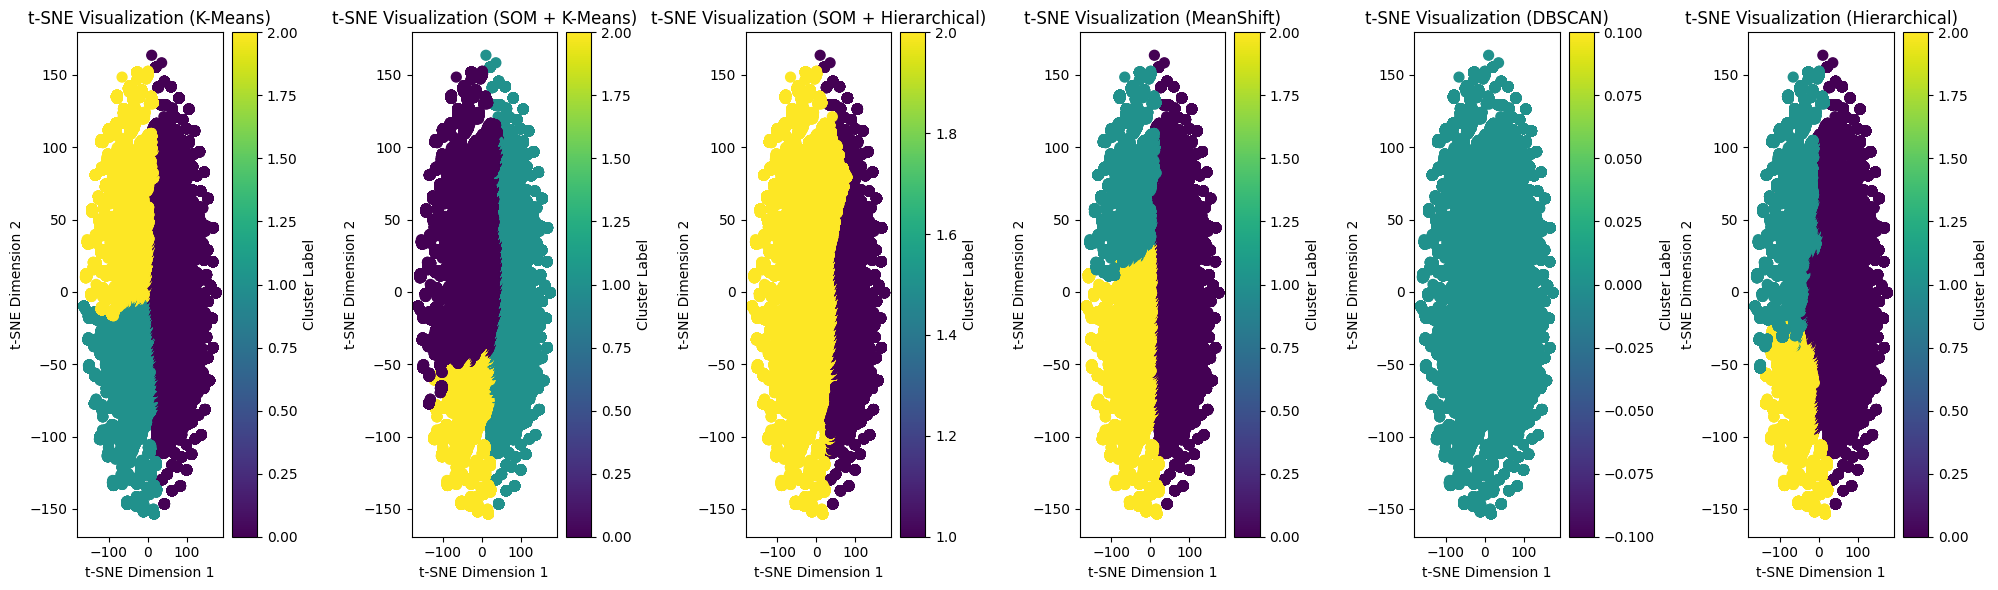

In [108]:
# Combine clustering labels into a dictionary for Group 3
cluster_results_group_3_dict = {
    'K-Means': cluster_results_group_3['kmeans_cluster'].values,
    'SOM + K-Means': cluster_results_group_3['som_kmeans_cluster'].values,
    'SOM + Hierarchical': cluster_results_group_3['som_hierarchical_cluster'].values,
    'MeanShift': cluster_results_group_3['mean_shift_cluster'].values,
    'DBSCAN': cluster_results_group_3['dbscan_cluster'].values,
    'Hierarchical': cluster_results_group_3['hierarchical_cluster_group_3'].values  # Add Hierarchical clustering
}

# Apply t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
group_3_tsne = tsne.fit_transform(cluster_results_group_3.drop(
    ['kmeans_cluster', 'som_kmeans_cluster', 'som_hierarchical_cluster', 'mean_shift_cluster', 'dbscan_cluster', 'hierarchical_cluster_group_3'], 
    axis=1))

# Visualize the t-SNE results for all clustering methods
fig, axes = plt.subplots(1, len(cluster_results_group_3_dict), figsize=(20, 6))
if len(cluster_results_group_3_dict) == 1:
    axes = [axes]

for i, (method, labels) in enumerate(cluster_results_group_3_dict.items()):
    scatter = axes[i].scatter(group_3_tsne[:, 0], group_3_tsne[:, 1], c=labels, cmap='viridis', s=50)
    axes[i].set_title(f't-SNE Visualization ({method})')
    axes[i].set_xlabel('t-SNE Dimension 1')
    axes[i].set_ylabel('t-SNE Dimension 2')
    plt.colorbar(scatter, ax=axes[i], label='Cluster Label')
plt.tight_layout()
plt.show()


# **Clustering Analysis for Group 3: Order Timing & Promotions**

## **Evaluation Table**

| **Clustering Method**          | **Number of Clusters** | **Silhouette Score** | **Davies-Bouldin Index** | **Visual Observations**                                                                                     |
|--------------------------------|------------------------|-----------------------|--------------------------|-----------------------------------------------------------------------------------------------------------|
| **K-Means**                    | 3                     | 0.5230               | 0.6910                   | Three distinct clusters with well-separated regions in feature space.                                     |
| **K-Means on SOM Weights**     | 3                     | 0.5475               | 0.6000                   | Clear separation with slightly improved silhouette and Davies-Bouldin scores compared to K-Means.         |
| **Hierarchical**               | 3                     | 0.4926               | 0.6365                   | Similar performance to K-Means; clusters show moderate separation.                                        |
| **Hierarchical on SOM Weights**| 2                     | 0.5119               | 0.7031                   | Two well-separated clusters, but loss of granularity compared to K-Means.                                |
| **MeanShift**                  | 3                     | 0.5004               | 0.7387                   | Moderate separation, but clusters are slightly less distinct.                                             |
| **DBSCAN**                     | 1                     | -                    | -                        | Failed to form meaningful clusters; all points grouped into a single cluster.                            |

---

## **t-SNE Visualization**

The t-SNE visualizations below illustrate the spatial distribution of clusters across different methods:

1. **K-Means**:
   - Three clusters identified with good separation.
   - Clear boundaries between clusters align with the silhouette score.

2. **K-Means on SOM Weights**:
   - Slightly better-defined cluster boundaries compared to standard K-Means.
   - SOM preprocessing helped refine separation.

3. **Hierarchical Clustering**:
   - Similar separation to K-Means, but with slightly lower performance metrics.

4. **Hierarchical on SOM Weights**:
   - Two clusters observed; lacks granularity compared to K-Means.

5. **MeanShift**:
   - Similar cluster separation to K-Means, but lower silhouette score suggests slight overlap.

6. **DBSCAN**:
   - No meaningful clusters; all data points grouped into a single cluster.

---

## **Key Observations**

- **Cluster Characteristics (K-Means on SOM Weights)**:
  - **Cluster 0**:
    - Average `first_order`: 49.42 days.
    - Average `last_order`: 66.36 days.
    - Total customers: 14,695.
  - **Cluster 1**:
    - Average `first_order`: 10.09 days.
    - Average `last_order`: 78.90 days.
    - Total customers: 11,580.
  - **Cluster 2**:
    - Average `first_order`: 11.19 days.
    - Average `last_order`: 25.62 days.
    - Total customers: 5,494.

- **Performance Summary**:
  - K-Means on SOM Weights performed the best with the highest silhouette score and lowest Davies-Bouldin index.
  - Hierarchical clustering offers similar performance but with slightly higher Davies-Bouldin index.
  - DBSCAN failed to identify meaningful clusters due to dataset characteristics.

---

## **Selected Clustering Method: K-Means on SOM Weights**

- **Silhouette Score**: 0.5475
- **Davies-Bouldin Index**: 0.6000
- **Cluster Characteristics**:
  - Provides well-separated and interpretable clusters.
  - Balances granularity with clear distinctions in customer behaviors.

---

# **4. Group 4: Cuisine Preferences & Diversity**

## 4.1 K-Means

[⬆️ Back to Top](#top)

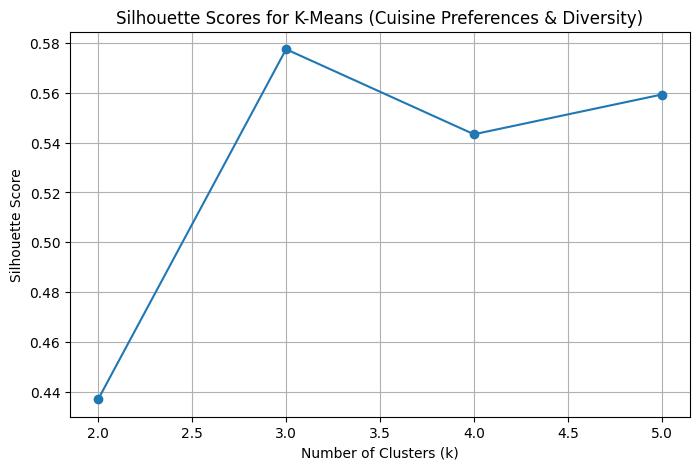

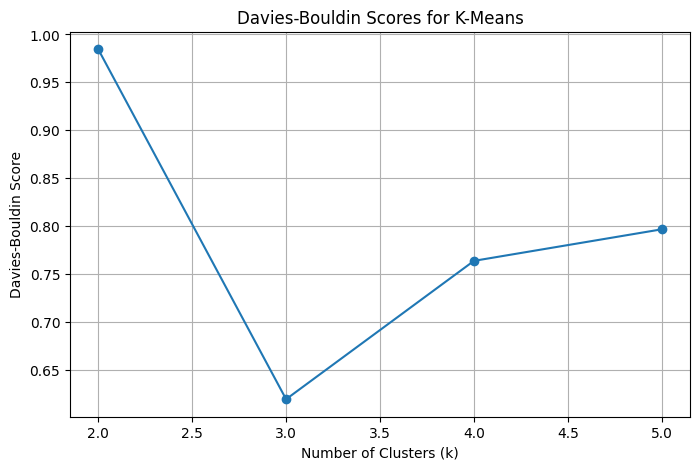

Optimal k (Silhouette Score): 3, Silhouette Score: 0.5774721615214616
Optimal k (Davies-Bouldin Index): 3, Davies-Bouldin Score: 0.6194315363909451
Final chosen k: 3
Consistent Silhouette Score for k=3: 0.5774721615214616


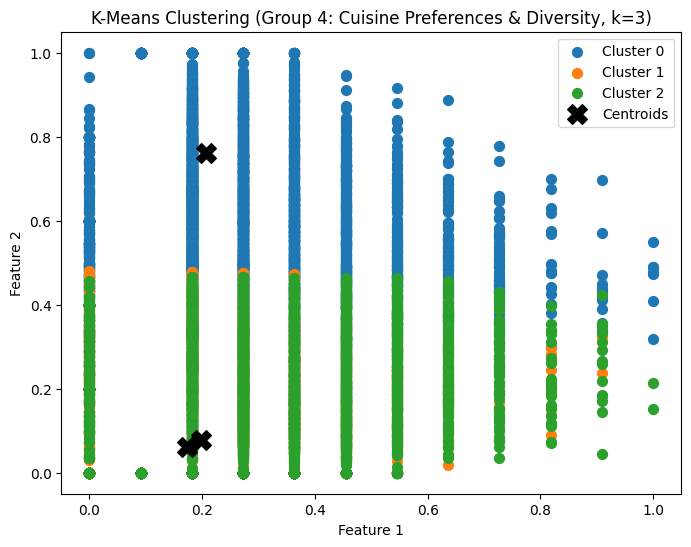

In [109]:
# Initialize a DataFrame to store clustering results for Group 4
cluster_results_group_4 = group_4.copy()

# ======= K-Means Clustering =======
k_values = range(2, 6)

# Initialize storage for metrics
silhouette_scores = []
davies_bouldin_scores = []
kmeans_labels_dict = {}

# Iterate through k values
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)  # Set n_init to 10 for stable results
    labels = kmeans.fit_predict(group_4)

    # Compute Silhouette Score
    silhouette_score_value = silhouette_score(group_4, labels)
    silhouette_scores.append(silhouette_score_value)

    # Compute Davies-Bouldin Index
    davies_bouldin_score_value = davies_bouldin_score(group_4, labels)
    davies_bouldin_scores.append(davies_bouldin_score_value)

    # Store labels for each k
    kmeans_labels_dict[k] = labels

# Plot Silhouette Scores
plt.figure(figsize=(8, 5))
plt.plot(k_values, silhouette_scores, marker='o')
plt.title("Silhouette Scores for K-Means (Cuisine Preferences & Diversity)")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()

# Plot Davies-Bouldin Scores
plt.figure(figsize=(8, 5))
plt.plot(k_values, davies_bouldin_scores, marker='o')
plt.title("Davies-Bouldin Scores for K-Means")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Davies-Bouldin Score")
plt.grid(True)
plt.show()

# Automatically determine Optimal k based on Silhouette Score and Davies-Bouldin Index
optimal_k_silhouette = k_values[silhouette_scores.index(max(silhouette_scores))]
optimal_k_davies_bouldin = k_values[davies_bouldin_scores.index(min(davies_bouldin_scores))]

# Decide final optimal_k (e.g., prioritize silhouette score but consider other metrics)
optimal_k = optimal_k_silhouette  # You can refine this logic as needed
print(f"Optimal k (Silhouette Score): {optimal_k_silhouette}, Silhouette Score: {max(silhouette_scores)}")
print(f"Optimal k (Davies-Bouldin Index): {optimal_k_davies_bouldin}, Davies-Bouldin Score: {min(davies_bouldin_scores)}")
print(f"Final chosen k: {optimal_k}")

# Reuse labels from the loop to ensure consistency
optimal_labels = kmeans_labels_dict[optimal_k]
consistent_silhouette_score = silhouette_score(group_4, optimal_labels)
print(f"Consistent Silhouette Score for k={optimal_k}: {consistent_silhouette_score}")

# Perform final clustering with the optimal k
final_kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_results_group_4['kmeans_cluster'] = final_kmeans.fit_predict(group_4)

# Plot the final clusters
plt.figure(figsize=(8, 6))
for cluster in np.unique(cluster_results_group_4['kmeans_cluster']):
    cluster_points = group_4[cluster_results_group_4['kmeans_cluster'] == cluster]
    plt.scatter(
        cluster_points.iloc[:, 0], cluster_points.iloc[:, 1], 
        label=f"Cluster {cluster}", s=50
    )
plt.scatter(final_kmeans.cluster_centers_[:, 0], final_kmeans.cluster_centers_[:, 1], 
            s=200, c='black', marker='X', label='Centroids')  # Mark centroids
plt.title(f"K-Means Clustering (Group 4: Cuisine Preferences & Diversity, k={optimal_k})")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


## 4.2 SOM with K-Means

[⬆️ Back to Top](#top)

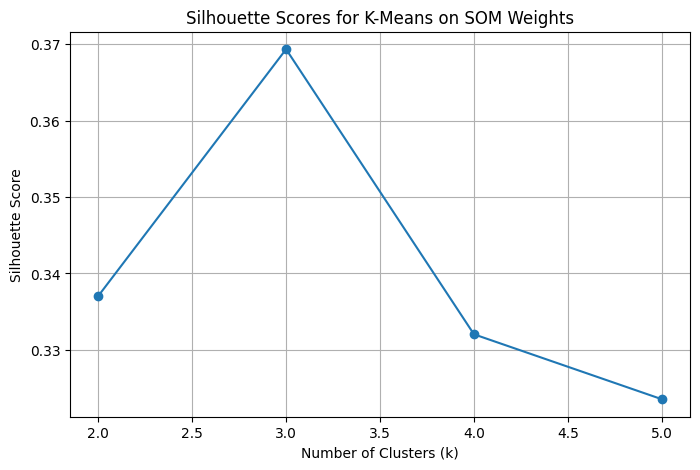

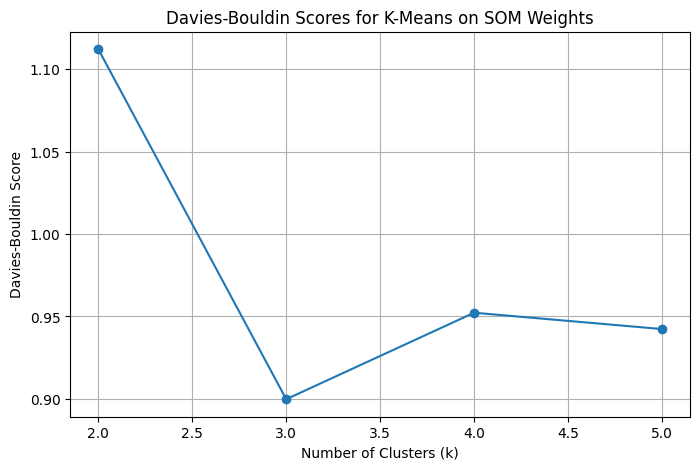

Optimal k (Silhouette Score): 3, Silhouette Score: 0.3694
Optimal k (Davies-Bouldin Index): 3, Davies-Bouldin Score: 0.8998
Final chosen k: 3
Consistent Silhouette Score for k=3: 0.3694


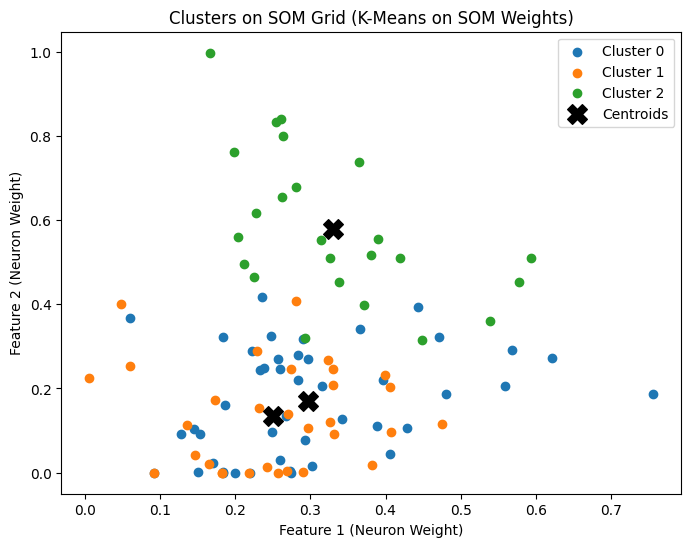

Cluster Summary:
                    cuisine_diversity  Others_Cuisines_Ratio  \
som_kmeans_cluster                                             
0                            0.191706               0.074921   
1                            0.171634               0.065960   
2                            0.219600               0.757484   

                    Asian_Cuisines_Ratio  Western_Cuisines_Ratio  
som_kmeans_cluster                                                
0                               0.842439                0.082640  
1                               0.122433                0.811607  
2                               0.145146                0.097369  


In [110]:
som_grid_x = 10
som_grid_y = 10
learning_rate = 0.5
sigma = 1.0

# Train the SOM
som = MiniSom(x=som_grid_x, y=som_grid_y, input_len=group_4.shape[1], sigma=sigma, learning_rate=learning_rate)
som.random_weights_init(group_4.values)
som.train_random(data=group_4.values, num_iteration=1000)

# Extract SOM weights
som_weights = som.get_weights().reshape(som_grid_x * som_grid_y, group_4.shape[1])

# Initialize storage for metrics
silhouette_scores = []
davies_bouldin_scores = []
k_values = range(2, 6)
kmeans_labels_dict = {}

# Iterate through k values
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(som_weights)

    # Compute Silhouette Score
    silhouette_score_value = silhouette_score(som_weights, labels)
    silhouette_scores.append(silhouette_score_value)

    # Compute Davies-Bouldin Index
    davies_bouldin_score_value = davies_bouldin_score(som_weights, labels)
    davies_bouldin_scores.append(davies_bouldin_score_value)

    # Store labels for each k
    kmeans_labels_dict[k] = labels

# Plot Silhouette Scores
plt.figure(figsize=(8, 5))
plt.plot(k_values, silhouette_scores, marker='o')
plt.title("Silhouette Scores for K-Means on SOM Weights")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()

# Plot Davies-Bouldin Scores
plt.figure(figsize=(8, 5))
plt.plot(k_values, davies_bouldin_scores, marker='o')
plt.title("Davies-Bouldin Scores for K-Means on SOM Weights")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Davies-Bouldin Score")
plt.grid(True)
plt.show()

# Automatically determine Optimal k based on Silhouette Score and Davies-Bouldin Index
optimal_k_silhouette = k_values[silhouette_scores.index(max(silhouette_scores))]
optimal_k_davies_bouldin = k_values[davies_bouldin_scores.index(min(davies_bouldin_scores))]

# Decide final optimal_k (e.g., prioritize silhouette score but consider other metrics)
optimal_k = optimal_k_silhouette  # You can refine this logic as needed
print(f"Optimal k (Silhouette Score): {optimal_k_silhouette}, Silhouette Score: {max(silhouette_scores):.4f}")
print(f"Optimal k (Davies-Bouldin Index): {optimal_k_davies_bouldin}, Davies-Bouldin Score: {min(davies_bouldin_scores):.4f}")
print(f"Final chosen k: {optimal_k}")

# Reuse labels from the loop to ensure consistency
optimal_labels = kmeans_labels_dict[optimal_k]
consistent_silhouette_score = silhouette_score(som_weights, optimal_labels)
print(f"Consistent Silhouette Score for k={optimal_k}: {consistent_silhouette_score:.4f}")

# Perform final clustering with the optimal k
final_kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
som_cluster_labels = final_kmeans.fit_predict(som_weights)

data_som_clusters = []
for row in group_4.values:
    winner_coords = som.winner(row)
    winner_index = winner_coords[0] * som_grid_y + winner_coords[1]
    cluster_label = final_kmeans.labels_[winner_index]
    data_som_clusters.append(cluster_label)

# Add SOM-based K-Means results to cluster_results_group_4
cluster_results_group_4['som_kmeans_cluster'] = data_som_clusters

# Plot the final clusters on the SOM grid
plt.figure(figsize=(8, 6))
for i in range(optimal_k):
    plt.scatter(
        som_weights[som_cluster_labels == i, 0],
        som_weights[som_cluster_labels == i, 1],
        label=f'Cluster {i}'
    )
plt.scatter(final_kmeans.cluster_centers_[:, 0], final_kmeans.cluster_centers_[:, 1], 
            s=200, c='black', marker='X', label='Centroids')
plt.title("Clusters on SOM Grid (K-Means on SOM Weights)")
plt.xlabel("Feature 1 (Neuron Weight)")
plt.ylabel("Feature 2 (Neuron Weight)")
plt.legend()
plt.show()

# Display cluster summary
cluster_summary = group_4.groupby(cluster_results_group_4['som_kmeans_cluster']).mean()
print("Cluster Summary:")
print(cluster_summary)


## 4.3 Hierarchical

Optimal k (Silhouette Score): 4, Silhouette Score: 0.5114
Optimal k (Davies-Bouldin Score): 3, Davies-Bouldin Score: 0.6582
Hierarchical Clustering Silhouette Score (Group 4): 0.5114
Hierarchical Clustering Davies-Bouldin Score (Group 4): 0.8200


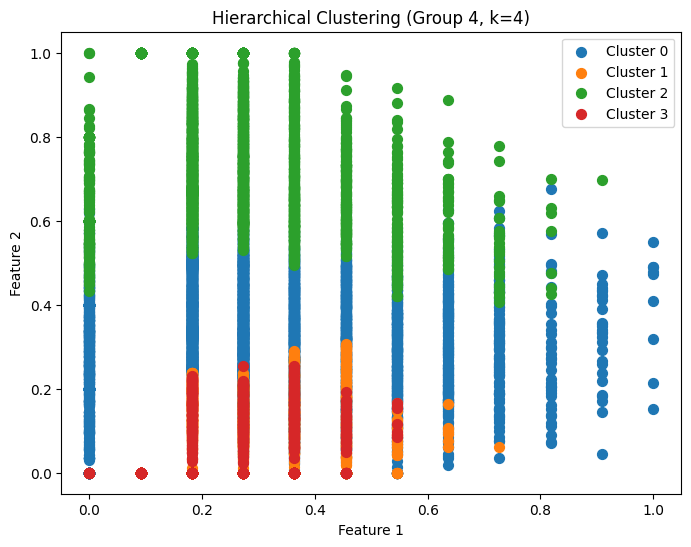

In [111]:
# ======= Hierarchical Clustering for Group 4 =======

possible_k = range(2, 6)
hierarchical_silhouette_scores = {}
hierarchical_davies_bouldin_scores = {}

for k in possible_k:
    hierarchical = AgglomerativeClustering(n_clusters=k, metric='euclidean', linkage='ward')
    hierarchical_labels = hierarchical.fit_predict(group_4)

    if len(np.unique(hierarchical_labels)) > 1:
        silhouette = silhouette_score(group_4, hierarchical_labels)
        davies_bouldin = davies_bouldin_score(group_4, hierarchical_labels)
        hierarchical_silhouette_scores[k] = silhouette
        hierarchical_davies_bouldin_scores[k] = davies_bouldin

if hierarchical_silhouette_scores:
    optimal_k_silhouette = max(hierarchical_silhouette_scores, key=hierarchical_silhouette_scores.get)
    optimal_k_davies_bouldin = min(hierarchical_davies_bouldin_scores, key=hierarchical_davies_bouldin_scores.get)
    optimal_k = optimal_k_silhouette
    print(f"Optimal k (Silhouette Score): {optimal_k_silhouette}, Silhouette Score: {hierarchical_silhouette_scores[optimal_k_silhouette]:.4f}")
    print(f"Optimal k (Davies-Bouldin Score): {optimal_k_davies_bouldin}, Davies-Bouldin Score: {hierarchical_davies_bouldin_scores[optimal_k_davies_bouldin]:.4f}")
else:
    print("No valid clustering with multiple clusters found.")
    optimal_k = None

if optimal_k:
    hierarchical = AgglomerativeClustering(n_clusters=optimal_k, metric='euclidean', linkage='ward')
    hierarchical_labels = hierarchical.fit_predict(group_4)

    cluster_results_group_4['hierarchical_cluster_group_4'] = hierarchical_labels

    silhouette_score_hierarchical = silhouette_score(group_4, hierarchical_labels)
    davies_bouldin_score_hierarchical = davies_bouldin_score(group_4, hierarchical_labels)
    print(f"Hierarchical Clustering Silhouette Score (Group 4): {silhouette_score_hierarchical:.4f}")
    print(f"Hierarchical Clustering Davies-Bouldin Score (Group 4): {davies_bouldin_score_hierarchical:.4f}")

    plt.figure(figsize=(8, 6))
    for cluster in np.unique(hierarchical_labels):
        cluster_points = group_4[hierarchical_labels == cluster]
        plt.scatter(cluster_points.iloc[:, 0], cluster_points.iloc[:, 1], label=f'Cluster {cluster}', s=50)
    plt.title(f"Hierarchical Clustering (Group 4, k={optimal_k})")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend()
    plt.show()


## 4.4 Hierarchical Clustering + SOM

[⬆️ Back to Top](#top)

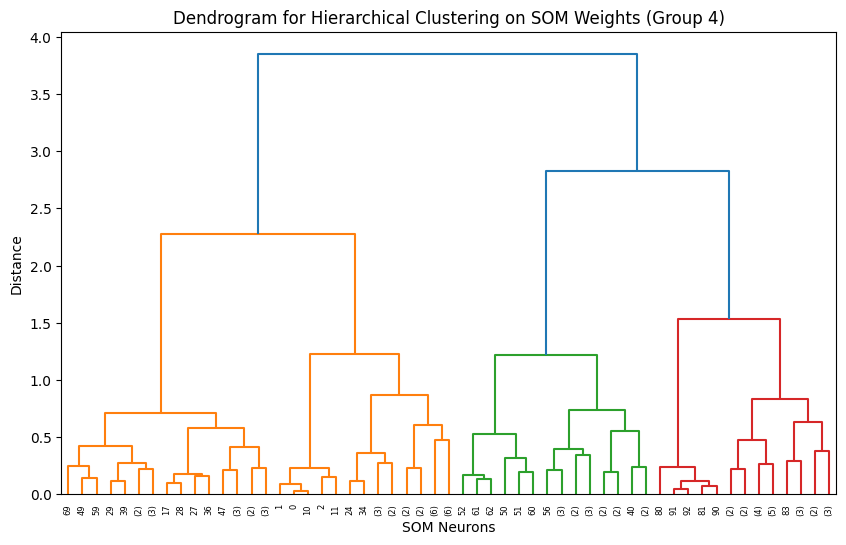

Optimal k (Silhouette Score): 5, Silhouette Score: 0.3559
Optimal k (Davies-Bouldin Score): 5, Davies-Bouldin Score: 0.8502


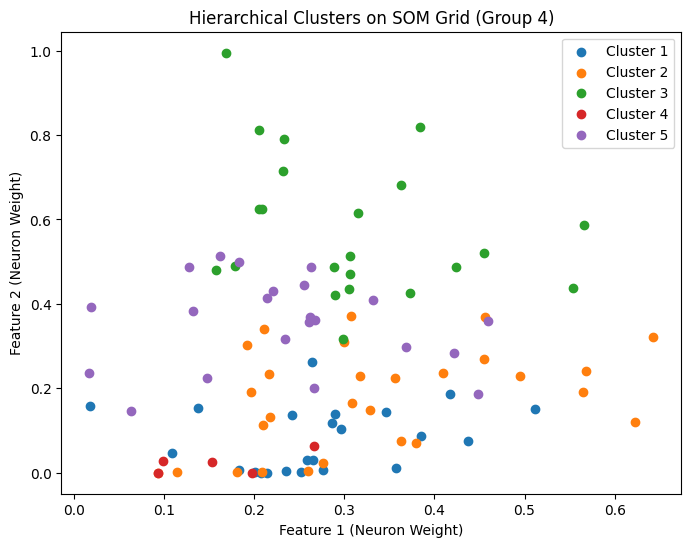

Cluster Summary (SOM + Hierarchical Clustering):
                          cuisine_diversity  Others_Cuisines_Ratio  \
som_hierarchical_cluster                                             
1                                  0.240176               0.041612   
2                                  0.193149               0.077004   
3                                  0.207476               0.771144   
4                                  0.122992               0.003785   
5                                  0.212308               0.353122   

                          Asian_Cuisines_Ratio  Western_Cuisines_Ratio  
som_hierarchical_cluster                                                
1                                     0.452656                0.505732  
2                                     0.882165                0.040830  
3                                     0.156373                0.072483  
4                                     0.008899                0.987316  
5                     

In [112]:
som_grid_x = 10
som_grid_y = 10
learning_rate = 0.5
sigma = 1.0

# Train the SOM
som = MiniSom(x=som_grid_x, y=som_grid_y, input_len=group_4.shape[1], sigma=sigma, learning_rate=learning_rate)
som.random_weights_init(group_4.values)
som.train_random(group_4.values, 1000)

# Extract SOM weights
som_weights = som.get_weights().reshape(som_grid_x * som_grid_y, group_4.shape[1])

# Perform hierarchical clustering on SOM weights
linkage_matrix = linkage(som_weights, method='ward')

# Visualize dendrogram
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix, truncate_mode="level", p=5)
plt.title("Dendrogram for Hierarchical Clustering on SOM Weights (Group 4)")
plt.xlabel("SOM Neurons")
plt.ylabel("Distance")
plt.show()

# Automatically determine optimal_k using silhouette score and Davies-Bouldin score
possible_k = range(2, 6)
hierarchical_silhouette_scores = {}
hierarchical_davies_bouldin_scores = {}

for k in possible_k:
    hierarchical_labels = fcluster(linkage_matrix, k, criterion='maxclust')

    # Only calculate scores if more than one cluster
    if len(np.unique(hierarchical_labels)) > 1:
        silhouette = silhouette_score(som_weights, hierarchical_labels)
        davies_bouldin = davies_bouldin_score(som_weights, hierarchical_labels)
        hierarchical_silhouette_scores[k] = silhouette
        hierarchical_davies_bouldin_scores[k] = davies_bouldin

# Determine optimal_k based on silhouette scores and Davies-Bouldin scores
if hierarchical_silhouette_scores:
    optimal_k_silhouette = max(hierarchical_silhouette_scores, key=hierarchical_silhouette_scores.get)
    optimal_k_davies_bouldin = min(hierarchical_davies_bouldin_scores, key=hierarchical_davies_bouldin_scores.get)
    optimal_k = optimal_k_silhouette  # Defaulting to silhouette-based selection, refine logic if needed

    print(f"Optimal k (Silhouette Score): {optimal_k_silhouette}, Silhouette Score: {hierarchical_silhouette_scores[optimal_k_silhouette]:.4f}")
    print(f"Optimal k (Davies-Bouldin Score): {optimal_k_davies_bouldin}, Davies-Bouldin Score: {hierarchical_davies_bouldin_scores[optimal_k_davies_bouldin]:.4f}")
else:
    print("No valid clustering with multiple clusters found.")
    optimal_k = None

if optimal_k:
    hierarchical_labels = fcluster(linkage_matrix, optimal_k, criterion='maxclust')

    # Map hierarchical clusters back to group_4
    data_hierarchical_clusters = []
    for row in group_4.values:
        winner_coords = som.winner(row)
        winner_index = winner_coords[0] * som_grid_y + winner_coords[1]
        data_hierarchical_clusters.append(hierarchical_labels[winner_index])

    # Add Hierarchical results to cluster_results_group_4
    cluster_results_group_4['som_hierarchical_cluster'] = data_hierarchical_clusters

    # Plot clusters on SOM grid
    plt.figure(figsize=(8, 6))
    for cluster in np.unique(hierarchical_labels):
        plt.scatter(
            som_weights[hierarchical_labels == cluster, 0],
            som_weights[hierarchical_labels == cluster, 1],
            label=f'Cluster {cluster}'
        )
    plt.title("Hierarchical Clusters on SOM Grid (Group 4)")
    plt.xlabel("Feature 1 (Neuron Weight)")
    plt.ylabel("Feature 2 (Neuron Weight)")
    plt.legend()
    plt.show()

    # Display cluster summary
    cluster_summary = group_4.groupby(cluster_results_group_4['som_hierarchical_cluster']).mean()
    print("Cluster Summary (SOM + Hierarchical Clustering):")
    print(cluster_summary)


## 4.5 Meanshift

[⬆️ Back to Top](#top)

Number of clusters identified by MeanShift (Group 4): 6
MeanShift Silhouette Score (Group 4): 0.5843
MeanShift Davies-Bouldin Score (Group 4): 0.7396


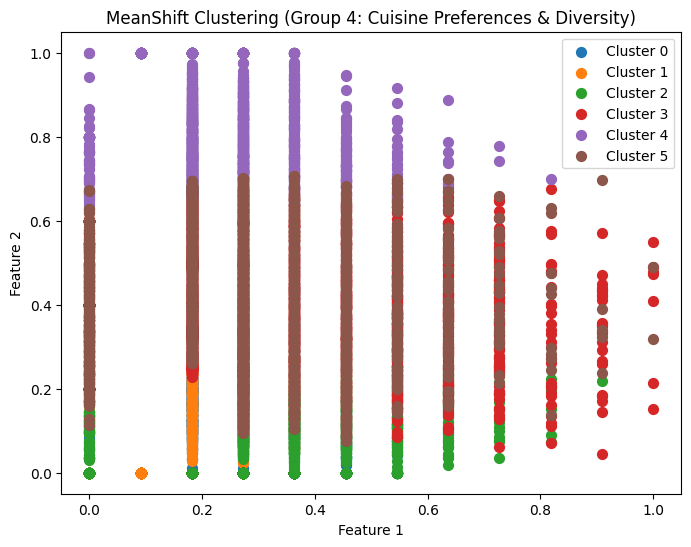

Cluster Summary (MeanShift):
   cuisine_diversity  Others_Cuisines_Ratio  Asian_Cuisines_Ratio  \
0           0.140152               0.013774              0.966982   
1           0.137912               0.012892              0.034711   
2           0.250457               0.038357              0.525620   
3           0.310406               0.396466              0.543211   
4           0.157494               0.922213              0.049751   
5           0.253485               0.423873              0.107503   

   Western_Cuisines_Ratio  
0                0.019244  
1                0.952397  
2                0.436024  
3                0.060323  
4                0.028036  
5                0.468624  


In [113]:
# ======= MeanShift Clustering =======
bandwidth = estimate_bandwidth(group_4, quantile=0.2, n_samples=1000)
mean_shift = MeanShift(bandwidth=bandwidth, bin_seeding=True)
mean_shift_labels = mean_shift.fit_predict(group_4)
cluster_results_group_4['mean_shift_cluster'] = mean_shift_labels

n_clusters = len(np.unique(mean_shift_labels))
print(f"Number of clusters identified by MeanShift (Group 4): {n_clusters}")

# Validate clustering and calculate silhouette and Davies-Bouldin scores if applicable
if n_clusters > 1:
    mean_shift_silhouette = silhouette_score(group_4, mean_shift_labels)
    mean_shift_davies_bouldin = davies_bouldin_score(group_4, mean_shift_labels)
    print(f"MeanShift Silhouette Score (Group 4): {mean_shift_silhouette:.4f}")
    print(f"MeanShift Davies-Bouldin Score (Group 4): {mean_shift_davies_bouldin:.4f}")
else:
    print("MeanShift clustering resulted in a single cluster; silhouette and Davies-Bouldin scores cannot be calculated.")

# Plot the MeanShift clusters
plt.figure(figsize=(8, 6))
for cluster in np.unique(mean_shift_labels):
    cluster_points = group_4[mean_shift_labels == cluster]
    plt.scatter(cluster_points.iloc[:, 0], cluster_points.iloc[:, 1], s=50, label=f'Cluster {cluster}')
plt.title("MeanShift Clustering (Group 4: Cuisine Preferences & Diversity)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

# Display cluster summary if applicable
if n_clusters > 1:
    mean_shift_summary = group_4.groupby(mean_shift_labels).mean()
    print("Cluster Summary (MeanShift):")
    print(mean_shift_summary)
else:
    print("No meaningful clustering identified.")


## 4.6 DBSCAN

[⬆️ Back to Top](#top)

Number of clusters identified by DBSCAN (Group 4): 1
Number of noise points: 0
DBSCAN clustering resulted in a single cluster or only noise; silhouette and Davies-Bouldin scores cannot be calculated.


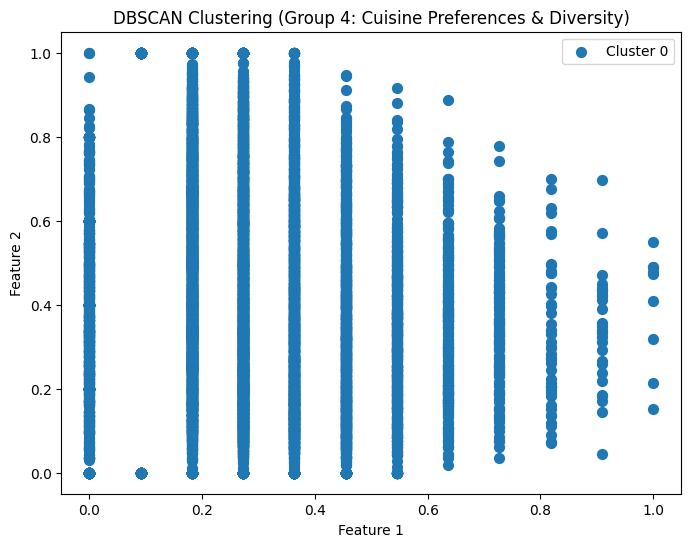

No meaningful clustering identified.


In [114]:
# ======= DBSCAN Clustering =======
eps = 0.5
min_samples = 5
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
dbscan_labels = dbscan.fit_predict(group_4)
cluster_results_group_4['dbscan_cluster'] = dbscan_labels

n_clusters = len(np.unique(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
n_noise = list(dbscan_labels).count(-1)

print(f"Number of clusters identified by DBSCAN (Group 4): {n_clusters}")
print(f"Number of noise points: {n_noise}")

# Validate clustering and calculate silhouette and Davies-Bouldin scores if applicable
if n_clusters > 1:
    dbscan_silhouette = silhouette_score(
        group_4[group_4['dbscan_cluster'] != -1],
        group_4[group_4['dbscan_cluster'] != -1]['dbscan_cluster']
    )
    dbscan_davies_bouldin = davies_bouldin_score(
        group_4[group_4['dbscan_cluster'] != -1],
        group_4[group_4['dbscan_cluster'] != -1]['dbscan_cluster']
    )
    print(f"DBSCAN Silhouette Score (Group 4): {dbscan_silhouette:.4f}")
    print(f"DBSCAN Davies-Bouldin Score (Group 4): {dbscan_davies_bouldin:.4f}")
else:
    print("DBSCAN clustering resulted in a single cluster or only noise; silhouette and Davies-Bouldin scores cannot be calculated.")

# Plot the DBSCAN clusters
plt.figure(figsize=(8, 6))
for cluster in np.unique(dbscan_labels):
    if cluster == -1:
        cluster_points = group_4[dbscan_labels == cluster]
        plt.scatter(cluster_points.iloc[:, 0], cluster_points.iloc[:, 1], color='gray', s=10, label='Noise')
    else:
        cluster_points = group_4[dbscan_labels == cluster]
        plt.scatter(cluster_points.iloc[:, 0], cluster_points.iloc[:, 1], s=50, label=f'Cluster {cluster}')
plt.title("DBSCAN Clustering (Group 4: Cuisine Preferences & Diversity)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

# Display cluster summary if applicable
if n_clusters > 1:
    dbscan_summary = group_4[group_4['dbscan_cluster'] != -1].groupby('dbscan_cluster').mean()
    print("Cluster Summary (DBSCAN):")
    print(dbscan_summary)
else:
    print("No meaningful clustering identified.")


## Analysis

In [115]:
# Define the features to summarize for Group 4
features_to_summarize = ['cuisine_diversity', 'Others_Cuisines_Ratio', 'Asian_Cuisines_Ratio', 'Western_Cuisines_Ratio']

# K-Means
group4_clusters_kmeans = reverse_scaling(cluster_results_group_4, data_normal, features_to_summarize, 'kmeans_cluster')
cluster_summary_kmeans = summarize_cluster_dataframe(group4_clusters_kmeans, 'kmeans_cluster', features_to_summarize)
cluster_summary_kmeans

cuisine_diversity                          \
                            mean median       std  count   
kmeans_cluster                                             
0                       2.278602    2.0  1.597908   8295   
1                       1.909064    2.0  1.187883  10117   
2                       2.171970    2.0  1.438257  13357   

               Others_Cuisines_Ratio                             \
                                mean    median       std  count   
kmeans_cluster                                                    
0                           0.761093  0.751024  0.220944   8295   
1                           0.061586  0.000000  0.120110  10117   
2                           0.076907  0.000000  0.129487  13357   

               Asian_Cuisines_Ratio                             \
                               mean    median       std  count   
kmeans_cluster                                                   
0                          0.139881  0.000000  0.174271   8295   
1                          0.110988  0.000000  0.162517  10117   
2                          0.832207  0.904054  0.185892  13357   

               Western_Cuisines_Ratio                          
                                 mean median       std  count  
kmeans_cluster                                                 
0                            0.099025    0.0  0.148689   8295  
1                            0.827425    1.0  0.199339  10117  
2                            0.090886    0.0  0.142772  13357

In [116]:
# SOM + K-Means
group4_clusters_som_kmeans = reverse_scaling(cluster_results_group_4, data_normal, features_to_summarize, 'som_kmeans_cluster')
cluster_summary_som_kmeans = summarize_cluster_dataframe(group4_clusters_som_kmeans, 'som_kmeans_cluster', features_to_summarize)
cluster_summary_som_kmeans

cuisine_diversity                          \
                                mean median       std  count   
som_kmeans_cluster                                             
0                           2.108768    2.0  1.415766  12945   
1                           1.887969    2.0  1.191559  10506   
2                           2.415605    2.0  1.612304   8318   

                   Others_Cuisines_Ratio                             \
                                    mean    median       std  count   
som_kmeans_cluster                                                    
0                               0.074921  0.000000  0.129039  12945   
1                               0.065960  0.000000  0.125876  10506   
2                               0.757484  0.749575  0.225801   8318   

                   Asian_Cuisines_Ratio                             \
                                   mean    median       std  count   
som_kmeans_cluster                                                   
0                              0.842439  0.946964  0.179564  12945   
1                              0.122433  0.000000  0.171983  10506   
2                              0.145146  0.000000  0.180267   8318   

                   Western_Cuisines_Ratio                             
                                     mean    median       std  count  
som_kmeans_cluster                                                    
0                                0.082640  0.000000  0.134153  12945  
1                                0.811607  0.921625  0.212034  10506  
2                                0.097369  0.000000  0.148259   8318

In [117]:
# Hierarchical Clustering
group4_clusters_hierarchical = reverse_scaling(cluster_results_group_4, data_normal, features_to_summarize, 'hierarchical_cluster_group_4')
cluster_summary_hierarchical = summarize_cluster_dataframe(group4_clusters_hierarchical, 'hierarchical_cluster_group_4', features_to_summarize)
cluster_summary_hierarchical

cuisine_diversity                         \
                                          mean median       std count   
hierarchical_cluster_group_4                                            
0                                     2.956463    3.0  1.735614  8912   
1                                     1.777490    1.0  1.031493  9658   
2                                     2.048272    2.0  1.388039  6422   
3                                     1.557769    1.0  0.836522  6777   

                             Others_Cuisines_Ratio                           \
                                              mean   median       std count   
hierarchical_cluster_group_4                                                  
0                                         0.253146  0.28075  0.181335  8912   
1                                         0.020588  0.00000  0.055996  9658   
2                                         0.845851  1.00000  0.172794  6422   
3                                         0.011311  0.00000  0.040903  6777   

                             Asian_Cuisines_Ratio                            \
                                             mean    median       std count   
hierarchical_cluster_group_4                                                  
0                                        0.411925  0.453295  0.209880  8912   
1                                        0.924898  1.000000  0.117891  9658   
2                                        0.084080  0.000000  0.132894  6422   
3                                        0.037667  0.000000  0.085040  6777   

                             Western_Cuisines_Ratio                            
                                               mean    median       std count  
hierarchical_cluster_group_4                                                   
0                                          0.334929  0.393417  0.241505  8912  
1                                          0.054514  0.000000  0.104252  9658  
2                                          0.070070  0.000000  0.124480  6422  
3                                          0.951022  1.000000  0.095766  6777

In [118]:
# SOM + Hierarchical
group4_clusters_som_hierarchical = reverse_scaling(cluster_results_group_4, data_normal, features_to_summarize, 'som_hierarchical_cluster')
cluster_summary_som_hierarchical = summarize_cluster_dataframe(group4_clusters_som_hierarchical, 'som_hierarchical_cluster', features_to_summarize)
cluster_summary_som_hierarchical

cuisine_diversity                          \
                                      mean median       std  count   
som_hierarchical_cluster                                             
1                                 2.641936    2.0  1.202661   4731   
2                                 2.124640    2.0  1.551330  11120   
3                                 2.282240    2.0  1.493988   7894   
4                                 1.352911    1.0  0.635285   5755   
5                                 2.335390    2.0  1.520838   2269   

                         Others_Cuisines_Ratio                             \
                                          mean    median       std  count   
som_hierarchical_cluster                                                    
1                                     0.041612  0.000000  0.080024   4731   
2                                     0.077004  0.000000  0.128953  11120   
3                                     0.771144  0.777594  0.222552   7894   
4                                     0.003785  0.000000  0.021292   5755   
5                                     0.353122  0.349811  0.127686   2269   

                         Asian_Cuisines_Ratio                             \
                                         mean    median       std  count   
som_hierarchical_cluster                                                   
1                                    0.452656  0.446581  0.143526   4731   
2                                    0.882165  1.000000  0.159215  11120   
3                                    0.156373  0.000000  0.189317   7894   
4                                    0.008899  0.000000  0.034669   5755   
5                                    0.071466  0.000000  0.095918   2269   

                         Western_Cuisines_Ratio                             
                                           mean    median       std  count  
som_hierarchical_cluster                                                    
1                                      0.505732  0.494067  0.144954   4731  
2                                      0.040830  0.000000  0.081375  11120  
3                                      0.072483  0.000000  0.120126   7894  
4                                      0.987316  1.000000  0.040799   5755  
5                                      0.575412  0.584363  0.145431   2269

In [119]:
# MeanShift
group4_clusters_mean_shift = reverse_scaling(cluster_results_group_4, data_normal, features_to_summarize, 'mean_shift_cluster')
cluster_summary_mean_shift = summarize_cluster_dataframe(group4_clusters_mean_shift, 'mean_shift_cluster', features_to_summarize)
cluster_summary_mean_shift

cuisine_diversity                         \
                                mean median       std count   
mean_shift_cluster                                            
0                           1.541667    1.0  0.843846  8160   
1                           1.517033    1.0  0.787558  6781   
2                           2.755023    2.0  1.309245  4380   
3                           3.414468    3.0  1.866100  4396   
4                           1.732435    1.0  1.061104  4896   
5                           2.788340    3.0  1.685645  3156   

                   Others_Cuisines_Ratio                            \
                                    mean    median       std count   
mean_shift_cluster                                                   
0                               0.013774  0.000000  0.044166  8160   
1                               0.012892  0.000000  0.046375  6781   
2                               0.038357  0.000000  0.071846  4380   
3                               0.396466  0.389675  0.133790  4396   
4                               0.922213  1.000000  0.117225  4896   
5                               0.423873  0.408274  0.145746  3156   

                   Asian_Cuisines_Ratio                            \
                                   mean    median       std count   
mean_shift_cluster                                                  
0                              0.966982  1.000000  0.067588  8160   
1                              0.034711  0.000000  0.081856  6781   
2                              0.525620  0.511041  0.128819  4380   
3                              0.543211  0.542805  0.133374  4396   
4                              0.049751  0.000000  0.098837  4896   
5                              0.107503  0.071317  0.116418  3156   

                   Western_Cuisines_Ratio                            
                                     mean    median       std count  
mean_shift_cluster                                                   
0                                0.019244  0.000000  0.053811  8160  
1                                0.952397  1.000000  0.092159  6781  
2                                0.436024  0.420195  0.128168  4380  
3                                0.060323  0.000000  0.085272  4396  
4                                0.028036  0.000000  0.069626  4896  
5                                0.468624  0.465959  0.146185  3156

In [120]:
# DBSCAN
group4_clusters_dbscan = reverse_scaling(cluster_results_group_4, data_normal, features_to_summarize, 'dbscan_cluster')
cluster_summary_dbscan = summarize_cluster_dataframe(group4_clusters_dbscan, 'dbscan_cluster', features_to_summarize)
cluster_summary_dbscan

cuisine_diversity                          \
                            mean median       std  count   
dbscan_cluster                                             
0                       2.116088    2.0  1.416858  31769   

               Others_Cuisines_Ratio                          \
                                mean median       std  count   
dbscan_cluster                                                 
0                           0.250671    0.0  0.341317  31769   

               Asian_Cuisines_Ratio                             \
                               mean    median       std  count   
dbscan_cluster                                                   
0                          0.421763  0.370093  0.391413  31769   

               Western_Cuisines_Ratio                             
                                 mean    median       std  count  
dbscan_cluster                                                    
0                            0.327566  0.167016  0.379154  31769

## 4.7 t-SNE

[⬆️ Back to Top](#top)

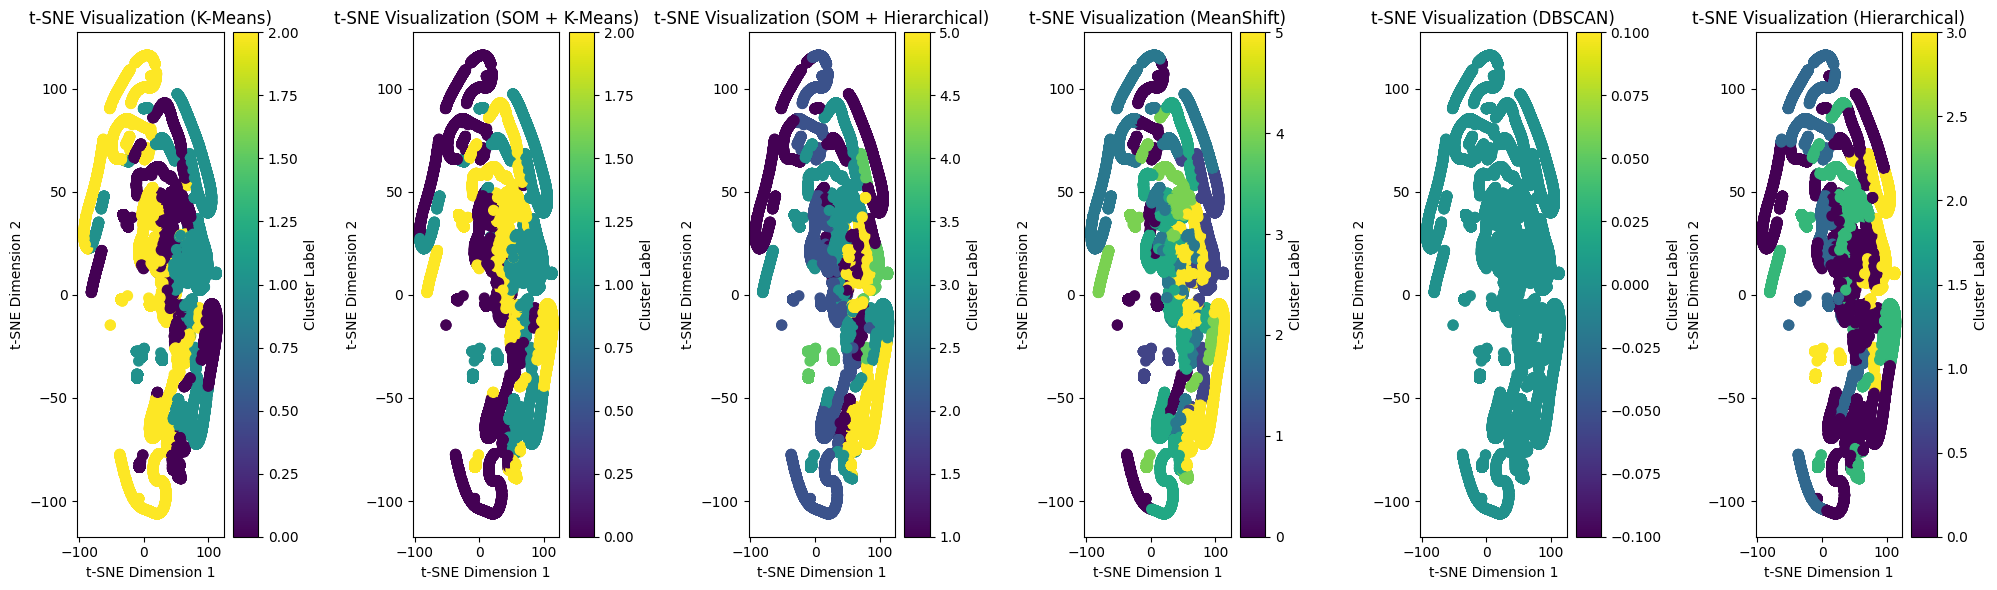

In [121]:
# Combine clustering labels into a dictionary for Group 4
cluster_results_group_4_dict = {
    'K-Means': cluster_results_group_4['kmeans_cluster'].values,
    'SOM + K-Means': cluster_results_group_4['som_kmeans_cluster'].values,
    'SOM + Hierarchical': cluster_results_group_4['som_hierarchical_cluster'].values,
    'MeanShift': cluster_results_group_4['mean_shift_cluster'].values,
    'DBSCAN': cluster_results_group_4['dbscan_cluster'].values,
    'Hierarchical': cluster_results_group_4['hierarchical_cluster_group_4'].values
}

# Apply t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
group_4_tsne = tsne.fit_transform(cluster_results_group_4.drop(
    ['kmeans_cluster', 'som_kmeans_cluster', 'som_hierarchical_cluster', 
     'mean_shift_cluster', 'dbscan_cluster', 'hierarchical_cluster_group_4'], axis=1))

# Visualize the t-SNE results for all clustering methods
fig, axes = plt.subplots(1, len(cluster_results_group_4_dict), figsize=(20, 6))
if len(cluster_results_group_4_dict) == 1:
    axes = [axes]

for i, (method, labels) in enumerate(cluster_results_group_4_dict.items()):
    scatter = axes[i].scatter(group_4_tsne[:, 0], group_4_tsne[:, 1], c=labels, cmap='viridis', s=50)
    axes[i].set_title(f't-SNE Visualization ({method})')
    axes[i].set_xlabel('t-SNE Dimension 1')
    axes[i].set_ylabel('t-SNE Dimension 2')
    plt.colorbar(scatter, ax=axes[i], label='Cluster Label')
plt.tight_layout()
plt.show()

# **Clustering Analysis for Group 4: Cuisine Preferences & Diversity**

## **Evaluation Table**

| **Clustering Method**          | **Number of Clusters** | **Silhouette Score** | **Davies-Bouldin Index** | **Visual Observations**                                                                                     |
|--------------------------------|------------------------|-----------------------|--------------------------|-----------------------------------------------------------------------------------------------------------|
| **K-Means**                    | 3                     | 0.5775               | 0.6194                   | Clear cluster separation, consistent structure.                                                           |
| **K-Means on SOM Weights**     | 3                     | 0.3694               | 0.8998                   | Less compact clusters; weaker separation than standard K-Means.                                           |
| **Hierarchical**               | 4                     | 0.5114               | 0.6582                   | Moderate separation; slightly worse compactness than K-Means.                                             |
| **Hierarchical on SOM Weights**| 5                     | 0.3559               | 0.8502                   | Overlapping clusters; highest Davies-Bouldin Index among methods.                                         |
| **MeanShift**                  | 6                     | 0.5843               | 0.7396                   | Fine-grained clustering but less compact compared to K-Means.                                             |
| **DBSCAN**                     | 1                     | -                    | -                        | No meaningful clustering identified; all data assigned to a single cluster.                               |

---

## **t-SNE Visualization**

The t-SNE visualizations below illustrate the spatial distribution of clusters across different methods:

1. **K-Means**:
   - Shows 3 distinct clusters with reasonable separation.
   - Compact and interpretable clusters.
2. **K-Means on SOM Weights**:
   - Clusters are less compact and overlap more than standard K-Means.
3. **Hierarchical Clustering**:
   - Moderate separation but with overlapping clusters.
4. **Hierarchical on SOM Weights**:
   - Poor separation with scattered clusters.
5. **MeanShift**:
   - Identified 6 clusters with finer granularity, but less compact clustering.
6. **DBSCAN**:
   - No meaningful clustering identified; all data points are in a single cluster.

---

## **Key Observations**

- **Cluster Characteristics (K-Means)**:
  - **Cluster 0**:
    - **Cuisine Diversity**: Mean = 2.2786.
    - **Western_Cuisines_Ratio**: Mean = 0.0990.
    - Total customers: 8,295.
  - **Cluster 1**:
    - **Cuisine Diversity**: Mean = 1.9091.
    - **Western_Cuisines_Ratio**: Mean = 0.8274.
    - Total customers: 10,117.
  - **Cluster 2**:
    - **Cuisine Diversity**: Mean = 2.1720.
    - **Asian_Cuisines_Ratio**: Mean = 0.8322.
    - Total customers: 13,357.

- **Performance Summary**:
  - **K-Means** achieves the best overall balance of Silhouette Score and Davies-Bouldin Index.
  - **MeanShift** provides finer granularity but introduces complexity without significant improvement.
  - **Hierarchical Methods** perform slightly worse than K-Means and show overlapping clusters.
  - **DBSCAN** failed to form meaningful clusters due to dataset characteristics.

---

## **Selected Clustering Method: K-Means**

- **Silhouette Score**: 0.5775
- **Davies-Bouldin Index**: 0.6194
- **Cluster Characteristics**:
  - K-Means provides clear and interpretable clusters, making it suitable for segmentation in this group.
  - It balances compactness and separation, aligning well with business requirements.

---

# **5. Clustering Conclusion: Final Method Selection and Integration**

[⬆️ Back to Top](#top)

After evaluating the clustering methods across all groups, the following methods were chosen as the most effective based on silhouette scores, Davies-Bouldin indices, visual clarity (t-SNE), and cluster interpretability:

| **Group**                          | **Selected Method**  | **Reason for Selection**                                                                                                     |
|------------------------------------|----------------------|-----------------------------------------------------------------------------------------------------------------------------|
| **Group 1: Customer Demographics** | K-Means              | Achieved a silhouette score of 0.4479 and a Davies-Bouldin index of 0.8373, providing clearly defined and interpretable clusters. |
| **Group 2: Spending Behavior**     | K-Means              | Delivered the best silhouette score of 0.5144 and a Davies-Bouldin index of 0.7344, effectively capturing distinct spending behaviors. |
| **Group 3: Order Timing & Promotions** | SOM + K-Means     | Achieved a silhouette score of 0.5475 and a Davies-Bouldin index of 0.6000, providing compact and well-separated clusters. |
| **Group 4: Cuisine Preferences & Diversity** | K-Means         | While MeanShift achieved a higher silhouette score (0.5843), K-Means was selected due to its better balance of simplicity, interpretability, and clustering quality (Silhouette Score: 0.5775, Davies-Bouldin Index: 0.6194). The 3 clusters also provide sufficient differentiation without overcomplicating the segmentation. |

---

## **Final Clustering Method Decision**

The selected methods ensure a tailored and optimal approach for each group's unique characteristics:

1. **Groups 1 and 2**:
   - **K-Means** provided the best combination of silhouette scores and Davies-Bouldin indices, effectively identifying clusters with clear separation and meaningful interpretations.

2. **Group 3**:
   - **SOM + K-Means** clustering excelled with its ability to integrate self-organizing maps with K-Means, capturing nuanced patterns in ordering behavior and achieving compact clusters.

3. **Group 4**:
   - **K-Means** was chosen over MeanShift due to its better balance between simplicity, interpretability, and clustering quality. The 3 clusters identified by K-Means offer meaningful distinctions in customer cuisine preferences without overcomplicating the segmentation.

This balanced approach prioritizes interpretability, clustering precision, and adaptability to group-specific nuances.

---

## **Integration of Clusters for Analysis**

To achieve a holistic understanding of customer behavior, clusters from all groups will be integrated. This process involves:

### 1. **Cluster Label Assignment**:
   - Each customer will receive cluster labels from all groups (e.g., Group 1 Cluster, Group 2 Cluster, etc.).

### 2. **Meta-Cluster Creation**:
   - Combine group-level cluster labels to create **meta-clusters**, representing customers based on multidimensional behaviors such as demographics, spending habits, ordering patterns, and cuisine preferences.

### 3. **Analysis Goals**:
   - **Identify Key Archetypes**: Uncover dominant customer archetypes by analyzing recurring patterns in meta-clusters.
   - **Correlate Behaviors**: Explore relationships between groups, such as how spending behavior aligns with ordering patterns or cuisine preferences.

### 4. **Actionable Insights**:
   - **Targeted Strategies**: Use meta-clusters to design highly targeted marketing campaigns and personalized customer experiences.
   - **Operational Optimization**: Leverage insights to improve menu offerings, promotions, and engagement strategies for each archetype.

---

## **Next Steps**

1. **Cluster Profiling**:
   - Analyze each group's cluster characteristics to understand defining customer behaviors and tendencies.

2. **Meta-Cluster Analysis**:
   - Integrate group clusters into meta-clusters to uncover cross-group dynamics and develop deeper behavioral insights.

3. **Visualization and Reporting**:
   - Create visual representations of meta-clusters and prepare detailed reports to effectively communicate findings to stakeholders.

By leveraging **K-Means** and **SOM + K-Means**, this integrated analysis will offer actionable insights, enabling enhanced customer segmentation, optimized business strategies, and long-term growth.

---

To determine the total number of clusters at the end, we sum up the clusters identified for each group based on the final methods chosen and their respective clustering results:

- **Group 1: Customer Demographics (K-Means)**  
  - **Number of Clusters**: 2  
  - **Silhouette Score**: 0.4479  
  - **Davies-Bouldin Index**: 0.8373  

- **Group 2: Spending Behavior (K-Means)**  
  - **Number of Clusters**: 5  
  - **Silhouette Score**: 0.5144  
  - **Davies-Bouldin Index**: 0.7344  

- **Group 3: Order Timing & Promotions (SOM + K-Means)**  
  - **Number of Clusters**: 3  
  - **Silhouette Score**: 0.5475  
  - **Davies-Bouldin Index**: 0.6000  

- **Group 4: Cuisine Preferences & Diversity (K-Means)**  
  - **Number of Clusters**: 3  
  - **Silhouette Score**: 0.5775  
  - **Davies-Bouldin Index**: 0.6194  

### **Total Number of Clusters**:  
**2 + 5 + 3 + 3 = 13 clusters**

This total represents the distinct clusters identified across all four groups. These clusters will be integrated and analyzed collectively to generate comprehensive insights into customer behaviors and patterns.


In [123]:
# Group 1: Customer Demographics
group1_sizes = cluster_results['kmeans_cluster'].value_counts()
print("Group 1 Cluster Sizes:\n", group1_sizes)

# Group 2: Spending Behavior
group2_sizes = cluster_results_group_2['kmeans_cluster'].value_counts()
print("Group 2 Cluster Sizes:\n", group2_sizes)

# Group 3: Order Timing & Patterns
group3_sizes = cluster_results_group_3['som_kmeans_cluster'].value_counts()
print("Group 3 Cluster Sizes:\n", group3_sizes)

# Group 4: Cuisine Preferences & Diversity
group4_sizes = cluster_results_group_4['kmeans_cluster'].value_counts()
print("Group 4 Cluster Sizes:\n", group4_sizes)

Group 1 Cluster Sizes:
 kmeans_cluster
1    21025
0    10744
Name: count, dtype: int64
Group 2 Cluster Sizes:
 kmeans_cluster
0    11436
3     7518
2     4881
4     4459
1     3475
Name: count, dtype: int64
Group 3 Cluster Sizes:
 som_kmeans_cluster
0    14695
1    11580
2     5494
Name: count, dtype: int64
Group 4 Cluster Sizes:
 kmeans_cluster
2    13357
1    10117
0     8295
Name: count, dtype: int64


## **Final Cluster Sizes**

[⬆️ Back to Top](#top)

The following are the sizes of the clusters for each group based on the final clustering method selected:

### **Group 1: Customer Demographics**
- **Cluster 0**: 10,744 customers  
- **Cluster 1**: 21,025 customers  
**Total Customers**: 31,769  

### **Group 2: Spending Behavior**
- **Cluster 0**: 11,436 customers  
- **Cluster 1**: 3,475 customers  
- **Cluster 2**: 4,881 customers  
- **Cluster 3**: 7,518 customers  
- **Cluster 4**: 4,459 customers  
**Total Customers**: 31,769  

### **Group 3: Order Timing & Promotions**
- **Cluster 0**: 14,695 customers  
- **Cluster 1**: 11,580 customers  
- **Cluster 2**: 5,494 customers  
**Total Customers**: 31,769  

### **Group 4: Cuisine Preferences & Diversity**
- **Cluster 0**: 8,295 customers  
- **Cluster 1**: 10,117 customers  
- **Cluster 2**: 13,357 customers  
**Total Customers**: 31,769  


# **Final Personas for Marketing Approach**

[⬆️ Back to Top](#top)

To develop actionable marketing strategies, the 13 clusters identified across the four groups were consolidated into **13 distinct personas**. Each persona reflects unique customer characteristics and behaviors, enabling precise targeting and tailored campaigns.

---

## **Final Cluster Personas**

| **Persona**                     | **Source Clusters**              | **Description**                                                                                       | **Suggested Promotions**                                                                                  |
|---------------------------------|----------------------------------|-------------------------------------------------------------------------------------------------------|----------------------------------------------------------------------------------------------------------|
| **Persona 1: Loyal Customers**   | Group 1, Cluster 0              | Customers with consistent loyalty but lower engagement with chain restaurants.                        | **Loyalty Programs**: Offer membership rewards, milestone discounts, or VIP perks for continued loyalty. |
| **Persona 2: Non-Chain Loyalists** | Group 1, Cluster 1            | Customers who show loyalty to non-chain restaurants with consistent engagement.                       | **Non-Chain Focus**: Highlight exclusive deals with local or independent restaurants.                   |
| **Persona 3: Budget-Conscious Shoppers** | Group 2, Cluster 0       | Customers with minimal weekend spending and moderate weekday spending, showing low overall activity.   | **Affordable Campaigns**: Promote bundle deals, discounts on weekday orders, or free delivery offers.   |
| **Persona 4: High-Value Spenders** | Group 2, Cluster 1            | Customers with high weekend and weekday spending, representing the most engaged and profitable group.  | **Premium Promotions**: Highlight premium offerings, meal upgrades, or exclusive experiences.           |
| **Persona 5: Moderate Spenders**  | Group 2, Cluster 2             | Customers with moderate weekend and weekday spending, balancing frequency and order value.             | **Moderate Promotions**: Offer mid-tier deals or discounts on frequently ordered categories.            |
| **Persona 6: Weekend Moderates**  | Group 2, Cluster 3             | Customers with moderate weekend spending but low weekday activity, indicating a weekend focus.         | **Weekend Offers**: Promote weekend-specific deals or time-limited discounts to drive weekend activity.  |
| **Persona 7: Balanced Shoppers**  | Group 2, Cluster 4             | Customers with high weekend spending and moderate weekday spending, maintaining balanced engagement.    | **Weekend Highlights**: Focus on weekend promotions and seasonal offerings.                             |
| **Persona 8: Late Engagers**      | Group 3, Cluster 0             | Customers who started ordering late in the analyzed period but continue to order consistently.         | **Engagement Campaigns**: Encourage continued activity with personalized incentives and deals.          |
| **Persona 9: Long-Time Loyalists** | Group 3, Cluster 1            | Customers who started ordering early and maintained consistent activity throughout the period.         | **Exclusive Loyalty Perks**: Offer long-term rewards, exclusive menus, or lifetime discounts.           |
| **Persona 10: Early Dropouts**    | Group 3, Cluster 2             | Customers who started ordering early but quickly became inactive, showing disengagement.              | **Reactivation Campaigns**: Target with personalized re-engagement offers, such as welcome-back deals.  |
| **Persona 11: Diverse Explorers** | Group 4, Cluster 0             | Customers who prefer exploring a wide variety of cuisines, showing a strong interest in diversity.     | **Global Cuisine Promotions**: Spotlight new cuisines and offer discounts on less popular categories.   |
| **Persona 12: Western Loyalists** | Group 4, Cluster 1             | Customers who prefer Western cuisines, showing strong loyalty to this food category.                  | **Western Cuisine Deals**: Promote Western dishes, combos, and chef-curated menus.                      |
| **Persona 13: Asian Cuisine Fans** | Group 4, Cluster 2            | Customers who consistently prefer Asian cuisines, demonstrating high interest in this category.        | **Asian Cuisine Promotions**: Highlight new Asian dishes, seasonal menus, or chef specials.             |

---

## **Marketing Implications**

### 1. **Targeted Campaigns**
- Each persona provides clear insights into customer preferences and behaviors, enabling tailored campaigns for higher engagement and customer retention.

### 2. **Reactivation and Retention**
- Personas like **Early Dropouts** can be targeted with reactivation strategies, while **Loyal Customers** and **Long-Time Loyalists** benefit from loyalty programs.

### 3. **Operational Insights**
- Understanding the focus areas of **Western Loyalists** and **Asian Cuisine Fans** helps optimize menu offerings and promotions.

### 4. **Seasonal and Time-Based Strategies**
- Personas like **Weekend Moderates** and **Balanced Shoppers** can be engaged with time-specific offers, maximizing impact during peak activity.

This approach ensures that marketing campaigns are not only precise but also actionable, fostering long-term customer engagement and driving business growth.

---